# Estimating the Probability of Confirmed COVID-19 Cases Taking into the Intensive Care Unit (ICU)

This project is carried out by *Eda AYDIN, Zilan EROL* under the supervision of *Engin Deniz ALPMAN* in the **[Data Science for the Public Good program](https://www.kodluyoruz.org/bootcamp/data-science-for-the-public-good-istanbul-ankara/)**

The dataset of this project is obtained from the [Kaggle - COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/Sírio-Libanes/covid19) 

Note:  The data sets to be used in the project comply with the health-ethical rules and are suitable for use as a license.


## A. BUSINESS UNDERSTANDING


> **Business Goal Declaration**

The COVID-19 pandemic has caused us to rethink the organization of the health system, as it affects the whole world about the inadequacy of the health system. 

Some of the sentences we hear every day due to the increasing cases are 

* **“The occupancy of the intensive care unit is increasing”**, 
* **“The intensive care units are full.”** 

pioneered this project.

Based on these sentences, in this project, it will be determined whether the COVID-19 patient needs to be treated in the intensive care unit to preserve the health services system capacity. 

We have two purposes here.

1. Our first purpose is to give the most accurate answer to tertiary hospitals based on the available data, based on the patient's need for intensive care support. In this way, intensive care resources can be organized or patient transfer can be planned. 
2. Our other purpose is to provide an accurate answer to local and temporary hospitals based on subsampling of widely available data and not needing intensive care support. Thus, physicians fighting on the front line can safely discharge patients and monitor them remotely. 

The data sets to be used in the project comply with the health-ethical rules and are suitable for use as a license.


> **Our Business Problem**

According to our declaraton of businness goal: our aim to predict admission to the ICU of confirmed COVID-19 cases.

## IMPORT LIBRARIES

In [ ]:
!pip install opendatasets --upgrade --quiet
!pip install catboost --quiet
!pip install lightgbm --quiet
!pip install xgboost --quiet
!pip install hyperopt --quiet
!pip install mlxtend --quiet

In [ ]:
import opendatasets as od
import warnings
warnings.filterwarnings("ignore")
import sys
import six
sys.modules['sklearn.externals.six'] = six 

# Preparatory Data Analysis
# Data Science Tools
import pandas as pd
pd.set_option('display.max_columns', None) #show all columns in the dataframe
import numpy as np

# Exploratory Data Analysis
# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Data Modelling
# Scikit-Learn Tools
import functools
from itertools import combinations
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.feature_selection import RFE

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost as xgb

plt.style.use("fivethirtyeight")
%matplotlib inline


## B. DATA UNDERSTANDING

### B.1. Data Preprocessing

In [ ]:
od.download("https://www.kaggle.com/Sírio-Libanes/covid19")
df = pd.read_excel("covid19/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
df

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Your Kaggle Key: 

  0%|          | 0.00/858k [00:00<?, ?B/s]

100%|██████████| 858k/858k [00:02<00:00, 412kB/s]


PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65 AGE_PERCENTIL  GENDER  \
0                            0            1          60th       0   
1                            0            1          60th       0   
2                            0            1          60th       0   
3                            0            1          60th       0   
4                            0            1          60th       0   
...                        ...          ...           ...     ...   
1920                       384            0          50th       1   
1921                       384            0          50th       1   
1922                       384            0          50th       1   
1923                       384            0          50th       1   
1924                       384            0          50th       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0                    0.0                 0.0                 0.0   
1                    0.0                 0.0                 0.0   
2                    0.0                 0.0                 0.0   
3                    0.0                 0.0                 0.0   
4                    0.0                 0.0                 0.0   
...                  ...                 ...                 ...   
1920                 0.0                 0.0                 0.0   
1921                 0.0                 0.0                 0.0   
1922                 0.0                 0.0                 0.0   
1923                 0.0                 0.0                 0.0   
1924                 0.0                 0.0                 1.0   

      DISEASE GROUPING 4  DISEASE GROUPING 5  DISEASE GROUPING 6  HTN  \
0                    0.0                 1.0                 1.0  0.0   
1                    0.0                 1.0                 1.0  0.0   
2                    0.0                 1.0                 1.0  0.0   
3                    0.0                 1.0                 1.0  0.0   
4                    0.0                 1.0                 1.0  0.0   
...                  ...                 ...                 ...  ...   
1920                 0.0                 0.0                 0.0  0.0   
1921                 0.0                 0.0                 0.0  0.0   
1922                 0.0                 0.0                 0.0  0.0   
1923                 0.0                 0.0                 0.0  0.0   
1924                 0.0                 0.0                 0.0  0.0   

      IMMUNOCOMPROMISED  OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  \
0                   0.0    1.0             NaN           NaN          NaN   
1                   0.0    1.0             NaN           NaN          NaN   
2                   0.0    1.0        0.605263      0.605263     0.605263   
3                   0.0    1.0             NaN           NaN          NaN   
4                   0.0    1.0        0.000000      0.000000     0.000000   
...                 ...    ...             ...           ...          ...   
1920                0.0    1.0             NaN           NaN          NaN   
1921                0.0    1.0        0.605263      0.605263     0.605263   
1922                0.0    1.0             NaN           NaN          NaN   
1923                0.0    1.0             NaN           NaN          NaN   
1924                0.0    1.0        0.605263      0.605263     0.605263   

      ALBUMIN_MAX  ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  \
0             NaN           NaN                 NaN               NaN   
1             NaN           NaN                 NaN               NaN   
2        0.605263          -1.0           -1.000000         -1.000000   
3             NaN           NaN                 NaN               NaN   
4        0.000000          -1.0           -0.871658         -0.871658   
...           ...           ...                 ...               ...   
1920          NaN           NaN                

In [ ]:
df.describe()

PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65       GENDER  DISEASE GROUPING 1  \
count               1925.000000  1925.000000  1925.000000         1920.000000   
mean                 192.000000     0.467532     0.368831            0.108333   
std                  111.168431     0.499074     0.482613            0.310882   
min                    0.000000     0.000000     0.000000            0.000000   
25%                   96.000000     0.000000     0.000000            0.000000   
50%                  192.000000     0.000000     0.000000            0.000000   
75%                  288.000000     1.000000     1.000000            0.000000   
max                  384.000000     1.000000     1.000000            1.000000   

       DISEASE GROUPING 2  DISEASE GROUPING 3  DISEASE GROUPING 4  \
count         1920.000000         1920.000000         1920.000000   
mean             0.028125            0.097917            0.019792   
std              0.165373            0.297279            0.139320   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       DISEASE GROUPING 5  DISEASE GROUPING 6          HTN  IMMUNOCOMPROMISED  \
count         1920.000000         1920.000000  1920.000000        1920.000000   
mean             0.128125            0.046875     0.213021           0.158333   
std              0.334316            0.211426     0.409549           0.365148   
min              0.000000            0.000000     0.000000           0.000000   
25%              0.000000            0.000000     0.000000           0.000000   
50%              0.000000            0.000000     0.000000           0.000000   
75%              0.000000            0.000000     0.000000           0.000000   
max              1.000000            1.000000     1.000000           1.000000   

             OTHER  ALBUMIN_MEDIAN  ALBUMIN_MEAN  ALBUMIN_MIN  ALBUMIN_MAX  \
count  1920.000000      821.000000    821.000000   821.000000   821.000000   
mean      0.809896        0.528527      0.528527     0.528527     0.528527   
std       0.392485        0.224100      0.224100     0.224100     0.224100   
min       0.000000       -1.000000     -1.000000    -1.000000    -1.000000   
25%       1.000000        0.605263      0.605263     0.605263     0.605263   
50%       1.000000        0.605263      0.605263     0.605263     0.605263   
75%       1.000000        0.605263      0.605263     0.605263     0.605263   
max       1.000000        1.000000      1.000000     1.000000     1.000000   

       ALBUMIN_DIFF  BE_ARTERIAL_MEDIAN  BE_ARTERIAL_MEAN  BE_ARTERIAL_MIN  \
count         821.0          821.000000        821.000000       821.000000   
mean           -1.0           -0.963433         -0.963433        -0.963433   
std             0.0            0.160870          0.160870         0.160870   
min            -1.0           -1.000000         -1.000000        -1.000000   
25%            -1.0           -1.000000         -1.000000        -1.000000   
50%            -1.0           -1.000000         -1.000000        -1.000000   
75%            -1.0           -1.000000         -1.000000        -1.000000   
max            -1.0            1.000000          1.000000         1.000000   

       BE_ARTERIAL_MAX  BE_ARTERIAL_DIFF  BE_VENOUS_MEDIAN  BE_VENOUS_MEAN  \
count       821.000000             821.0        821.000000      821.000000   
mean         -0.963433              -1.0         -0.931121       -0.931121   
std           0.160870               0.0          0.169509        0.169509   
min          -1.000000              -1.0         -1.000000       -1.000000   
25%          -1.000000              -1.0         -1.000000       -1.000000   
50%          -1.000000              -1.0         -1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


In [ ]:
df.shape

(1925, 231)

### B.2 Variable Type and Data Structure Consistency

#### B.2.1 Demystifying Variables Type (Numerical / Categorical)

In [ ]:
# A Code part from Notebook of Caglar Subası
def MissingUniqueStatistics(df):

    import io
    import pandas as pd
    import psutil
    import os
    import gc
    import time
    import seaborn as sns
    from IPython.display import display, HTML
    # pd.set_option('display.max_colwidth', -1)
    from io import BytesIO
    import base64

    print("MissingUniqueStatistics process has began:\n")
    proc = psutil.Process(os.getpid())
    gc.collect()
    mem_0 = proc.memory_info().rss
    start_time = time.time()

    variable_name_list = []
    total_entry_list = []
    data_type_list = []
    unique_values_list = []
    number_of_unique_values_list = []
    missing_value_number_list = []
    missing_value_ratio_list = []
    mean_list = []
    std_list = []
    min_list = []
    Q1_list = []
    Q2_list = []
    Q3_list = []
    max_list = []

    df_statistics = df.describe().copy()

    for col in df.columns:

        variable_name_list.append(col)
        total_entry_list.append(df.loc[:, col].shape[0])
        data_type_list.append(df.loc[:, col].dtype)
        unique_values_list.append(list(df.loc[:, col].unique()))
        number_of_unique_values_list.append(len(list(df.loc[:, col].unique())))
        missing_value_number_list.append(df.loc[:, col].isna().sum())
        missing_value_ratio_list.append(
            round((df.loc[:, col].isna().sum()/df.loc[:, col].shape[0]), 4))

        try:
            mean_list.append(df_statistics.loc[:, col][1])
            std_list.append(df_statistics.loc[:, col][2])
            min_list.append(df_statistics.loc[:, col][3])
            Q1_list.append(df_statistics.loc[:, col][4])
            Q2_list.append(df_statistics.loc[:, col][5])
            Q3_list.append(df_statistics.loc[:, col][6])
            max_list.append(df_statistics.loc[:, col][7])
        except:
            mean_list.append('NaN')
            std_list.append('NaN')
            min_list.append('NaN')
            Q1_list.append('NaN')
            Q2_list.append('NaN')
            Q3_list.append('NaN')
            max_list.append('NaN')

    data_info_df = pd.DataFrame({'Variable': variable_name_list,
                                '#_Total_Entry': total_entry_list,
                                 '#_Missing_Value': missing_value_number_list,
                                 '%_Missing_Value': missing_value_ratio_list,
                                 'Data_Type': data_type_list,
                                 'Unique_Values': unique_values_list,
                                 '#_Unique_Values': number_of_unique_values_list,
                                 'Mean': mean_list,
                                 'STD': std_list,
                                 'Min': min_list,
                                 'Q1': Q1_list,
                                 'Q2': Q2_list,
                                 'Q3': Q3_list,
                                 'Max': max_list
                                 })

    data_info_df = data_info_df.set_index("Variable", inplace=False)

    # data_info_df['pdf'] = np.nan
    # for col in data_info_df.index:
    #   data_info_df.loc[col,'pdf'] = mapping(col)

    print('MissingUniqueStatistics process has been completed!')
    print("--- in %s minutes ---" % ((time.time() - start_time)/60))

    # , HTML(df.to_html(escape=False, formatters=dict(col=mapping)))
    return data_info_df.sort_values(by='%_Missing_Value', ascending=False)


In [ ]:
data_info = MissingUniqueStatistics(df)
data_info

MissingUniqueStatistics process has began:

MissingUniqueStatistics process has been completed!
--- in 0.01216748555501302 minutes ---


#_Total_Entry  #_Missing_Value  %_Missing_Value  \
Variable                                                                    
P02_VENOUS_MIN                     1925             1104           0.5735   
LEUKOCYTES_MAX                     1925             1104           0.5735   
PC02_VENOUS_MEAN                   1925             1104           0.5735   
PC02_VENOUS_MIN                    1925             1104           0.5735   
PC02_VENOUS_MAX                    1925             1104           0.5735   
...                                 ...              ...              ...   
PATIENT_VISIT_IDENTIFIER           1925                0           0.0000   
AGE_ABOVE65                        1925                0           0.0000   
GENDER                             1925                0           0.0000   
AGE_PERCENTIL                      1925                0           0.0000   
ICU                                1925                0           0.0000   

                         Data_Type  \
Variable                             
P02_VENOUS_MIN             float64   
LEUKOCYTES_MAX             float64   
PC02_VENOUS_MEAN           float64   
PC02_VENOUS_MIN            float64   
PC02_VENOUS_MAX            float64   
...                            ...   
PATIENT_VISIT_IDENTIFIER     int64   
AGE_ABOVE65                  int64   
GENDER                       int64   
AGE_PERCENTIL               object   
ICU                          int64   

                                                              Unique_Values  \
Variable                                                                      
P02_VENOUS_MIN            [nan, -0.7041420118343196, -0.2307692307692308...   
LEUKOCYTES_MAX            [nan, -0.8358439551950559, -0.7628427964465043...   
PC02_VENOUS_MEAN          [nan, -0.7546012269938651, -0.8159509202453988...   
PC02_VENOUS_MIN           [nan, -0.7546012269938651, -0.8159509202453988...   
PC02_VENOUS_MAX           [nan, -0.7546012269938651, -0.8159509202453988...   
...                                                                     ...   
PATIENT_VISIT_IDENTIFIER  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
AGE_ABOVE65                                                          [1, 0]   
GENDER                                                               [0, 1]   
AGE_PERCENTIL             [60th, 90th, 10th, 40th, 70th, 20th, 50th, 80t...   
ICU                                                                  [0, 1]   

                          #_Unique_Values      Mean         STD  Min  \
Variable                                                               
P02_VENOUS_MIN                         75 -0.675342     0.15219 -1.0   
LEUKOCYTES_MAX                        527 -0.741266    0.149095 -1.0   
PC02_VENOUS_MEAN                       43 -0.755797    0.095193 -1.0   
PC02_VENOUS_MIN                        43 -0.755797    0.095193 -1.0   
PC02_VENOUS_MAX                        43 -0.755797    0.095193 -1.0   
...                                   ...       ...         ...  ...   
PATIENT_VISIT_IDENTIFIER              385     192.0  111.168431  0.0   
AGE_ABOVE65                             2  0.467532    0.499074  0.0   
GENDER                                  2  0.368831    0.482613  0.0   
AGE_PERCENTIL                          10       NaN         NaN  NaN   
ICU                                     2  0.267532    0.442787  0.0   

                                Q1        Q2        Q3    Max  
Variable                                                       
P02_VENOUS_MIN           -0.704142 -0.704142 -0.704142    1.0  
LEUKOCYTES_MAX           -0.832368 -0.773658 -0.702588    1.0  
PC02_VENOUS_MEAN         -0.754601 -0.754601 -0.754601    1.0  
PC02_VENOUS_MIN          -0.754601 -0.754601 -0.754601    1.0  
PC02_VENOUS_MAX          -0.754601 -0.754601 -0.754601    1.0  
...                            ...       ...       ...    ...  
PATIENT_VISIT_IDENTIFIER      96.0     192.0     288

In [ ]:
columns = df.columns

#### B.2.2 Data Structure Control

In [ ]:
integer_columns = df.select_dtypes(exclude= ["float","object"]).columns
float_columns = df.select_dtypes(exclude= ["integer","object"]).columns
string_columns = df.select_dtypes(exclude=["integer","float"]).columns

### B.3 Building Target Variable (Regression or Classification)

In [ ]:
target_columns = df.iloc[:,-1:]

# ID is a identificaion number for each patient.
print("Number of rows in the dataset: {}".format(len(df)))
print("Number of inpatients: {}".format(len(df.PATIENT_VISIT_IDENTIFIER.unique())))

Number of rows in the dataset: 1925
Number of inpatients: 385


This data is set up in a very specific way. For each patient, as defined in the PATIENT_VISIT_IDENTIFIER feature, the entries represent different stages of the patient since its admission into the hospital. Lets take a look at how many entries are there for each patient.

In [ ]:
#Compute number of entries per patient
df.groupby(by ="PATIENT_VISIT_IDENTIFIER").count()["ICU"]

PATIENT_VISIT_IDENTIFIER
0      5
1      5
2      5
3      5
4      5
      ..
380    5
381    5
382    5
383    5
384    5
Name: ICU, Length: 385, dtype: int64

As we can see, all patients in this dataset have the same amounf ot input. Hoever, data that patients have been transported to the intensive care unit as instructed will not be used. But we are not throwing away this data yet. The first thing we're going to do is extract two very important pieces of information from the data:

* Which patients were admitted to the UCI;
* At what point are these patients admitted to UCI?

In [ ]:
icu_personal = df.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).agg({"ICU":list, "WINDOW":list})
icu_personal.head(15)

PATIENT_VISIT_IDENTIFIER              ICU                           WINDOW
0                          0  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
1                          1  [1, 1, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
2                          2  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
3                          3  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
4                          4  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
5                          5  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
6                          6  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
7                          7  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
8                          8  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
9                          9  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
10                        10  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
11                        11  [0, 0, 0, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
12                        12  [0, 0, 0, 0, 0]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
13                        13  [0, 0, 0, 0, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]
14                        14  [0, 0, 1, 1, 1]  [0-2, 2-4, 4-6, 6-12, ABOVE_12]

0 stands for negative and 1 stands for positive.
* Patient with ID 1 experienced ICU admission in the first 2 hours from Hospital admission (0-2).
* Patient with ID 2 experienced ICU admission after 12 hours from Hospital admission (ABOVE_12).
* Patient with ID 11 experienced ICU admission between 6 and 12 hours from hospital admission (6 - 12)
* Patients with ID 12 did not experienced ICU admission.
* Patients with ID 14 experienced ICU admission between 4 and 6 hours from hospital admission (4 - 6)

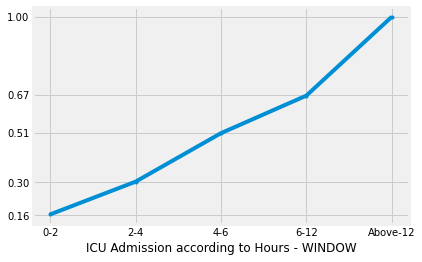

In [ ]:
aux = abs(df.groupby("PATIENT_VISIT_IDENTIFIER")["ICU"].sum() - 5)
aux = aux.value_counts().reset_index()
aux.sort_values(by="index", inplace=True)
aux.reset_index(drop=True, inplace=True)

total_icu_patients = aux.ICU[0:5].sum()
y = aux.ICU[0:5].cumsum() / total_icu_patients
plt.plot(y, marker=".")

plt.xlabel("ICU Admission according to Hours - WINDOW")
plt.yticks(round(y, 2))
plt.xticks([0, 1, 2, 3, 4], ["0-2", "2-4", "4-6", "6-12", "Above-12"])
plt.show()


In [ ]:
# What is the number of patients admitted to the intensive care unit during which hours?

class PatientICU_Relationship:

    def __init__(self):
        self.patient_zero_two_hours = []
        self.patient_two_four_hours = []
        self.patient_four_six_hours = []
        self.patient_six_twelve_hours = []
        self.patient_above_12 = []
        self.healthy_patient = []
        self.back_to_normal_stage = []
        self.new_data = []


    def patient_number(self, icu_personal):
        
        for i in range(len(icu_personal.PATIENT_VISIT_IDENTIFIER)):

            if icu_personal.ICU[i][0] == 1:
                self.patient_zero_two_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][1] == 0 or icu_personal.ICU[i][2] == 0 or icu_personal.ICU[i][3] == 0 or icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])

            elif icu_personal.ICU[i][1] == 1:
                self.patient_two_four_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][2] == 0 or icu_personal.ICU[i][3] == 0 or icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_personal.ICU[i][2] == 1:
                self.patient_four_six_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][3] == 0 or icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_personal.ICU[i][3] == 1:
                self.patient_six_twelve_hours.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
                if icu_personal.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_personal.ICU[i][4] == 1:
                self.patient_above_12.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])

            elif icu_personal.ICU[i][4] == 0:
                self.healthy_patient.append(icu_personal.PATIENT_VISIT_IDENTIFIER[i])
        
        print("Number of patients admitted to ICU between 0 - 2 hours : {}".format(len(self.patient_zero_two_hours)))
        print("Number of patients admitted to ICU between 2 - 4 hours: {}".format(len(self.patient_two_four_hours)))
        print("Number of patients admitted to ICU between 4 and 6 hours: {}".format(len(self.patient_four_six_hours)))
        print("Number of patients admitted to ICU between 6 and 12 hours: {}".format(len(self.patient_six_twelve_hours)))
        print("Number of patients admitted to ICU above 12 hours: {}".format(len(self.patient_above_12)))
        print("Number of patients who unexperienced ICU: {}".format(len(self.healthy_patient)))
        print("Number of patients who back to the normal stage: {}".format(len(self.back_to_normal_stage)))
    
        self.new_data = [len(self.patient_zero_two_hours),
                         len(self.patient_two_four_hours),
                         len(self.patient_four_six_hours),
                         len(self.patient_six_twelve_hours),
                         len(self.patient_above_12),
                         len(self.healthy_patient)]
        
        
        return self.new_data, self.patient_zero_two_hours, self.patient_two_four_hours, self.patient_four_six_hours, self.patient_six_twelve_hours, self.patient_above_12, self.healthy_patient

    
total_number = PatientICU_Relationship()
new_data = total_number.patient_number(icu_personal)

Number of patients admitted to ICU between 0 - 2 hours : 32
Number of patients admitted to ICU between 2 - 4 hours: 27
Number of patients admitted to ICU between 4 and 6 hours: 40
Number of patients admitted to ICU between 6 and 12 hours: 31
Number of patients admitted to ICU above 12 hours: 65
Number of patients who unexperienced ICU: 190
Number of patients who back to the normal stage: 0


In [ ]:
#Define function to compilate the ICU admission data
def ICU_admission(data):
    admission_data = data.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).max()[['PATIENT_VISIT_IDENTIFIER', 'ICU']]

    admission_time_data = data.groupby(by=['PATIENT_VISIT_IDENTIFIER', 'ICU'],
                                       as_index=False).first()[['PATIENT_VISIT_IDENTIFIER', 'ICU', 'WINDOW']]

    
    admission_data = admission_data.join(
        other=admission_time_data[admission_time_data['ICU'] == 1].set_index('PATIENT_VISIT_IDENTIFIER'),
        on='PATIENT_VISIT_IDENTIFIER',
        how='left',
        rsuffix='_R')

    # Label ICU
    ncount = len(admission_data)
    
    ### HISTOGRAM ACCORDING TO ICU
    ax = sns.countplot(admission_data['ICU'], palette='GnBu')
    sns.set(font_scale = 1)
    ax.set_xlabel("ICU")
    ax.set_ylabel("NUMBER OF PATIENT")
    fig = plt.gcf()
    fig.set_size_inches(10,6)
    
    for p in ax.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),ha='center', va='bottom')  # set the alignment of the text
    
    # Use a LinearLocator to ensure the correct number of ticks
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))
    
    plt.tight_layout()
    plt.title('Histogram of ICU Class', fontsize=14)
    plt.show()
    
    ### HISTOGRAM ACCORDING TO WINDOW
    ax2 = sns.countplot(admission_data['WINDOW'], palette='GnBu', order=["0-2","2-4","4-6","6-12","ABOVE_12"])
    sns.set(font_scale=1)
    ax2.set_xlabel("WINDOW INTERVALS")
    ax2.set_ylabel("NUMBER OF PATIENT ADMITTED TO THE ICU")
    fig = plt.gcf()
    fig.set_size_inches(10, 6)

    for p in ax2.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax2.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                    ha='center', va='bottom')  # set the alignment of the text

    # Use a LinearLocator to ensure the correct number of ticks
    ax2.yaxis.set_major_locator(ticker.LinearLocator(11))

    plt.tight_layout()
    plt.title('WINDOW x ICU Histogram', fontsize=14)
    plt.show()
    
    # count class
    class_1 = len(admission_data[admission_data['ICU'] == 1])
    class_0 = len(admission_data[admission_data['ICU'] == 0])
    print(len(admission_data['PATIENT_VISIT_IDENTIFIER']))
    
    # show
    print('\n')
    print('Number of patients who unexperienced ICU: {}'.format(class_0))
    print('Number of patients who experienced ICU: {}'.format(class_1))

    return admission_data.drop(columns='ICU_R')


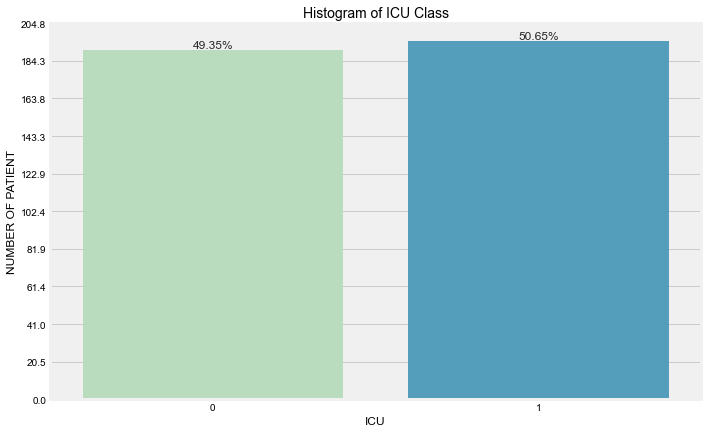

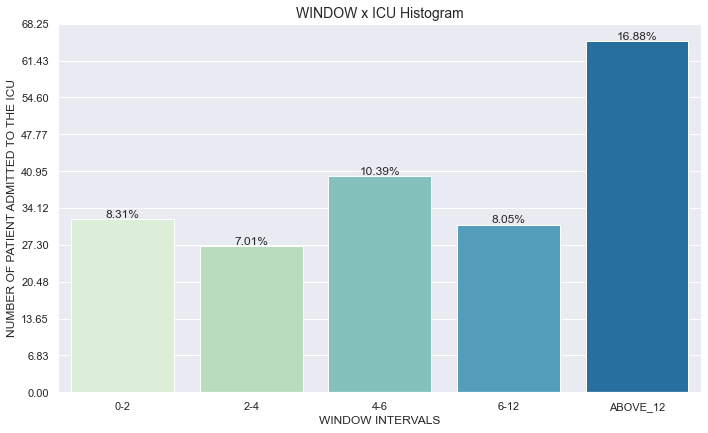

385


Number of patients who unexperienced ICU: 190
Number of patients who experienced ICU: 195


PATIENT_VISIT_IDENTIFIER  ICU    WINDOW
0                           0    1  ABOVE_12
1                           1    1       0-2
2                           2    1  ABOVE_12
3                           3    0       NaN
4                           4    0       NaN
..                        ...  ...       ...
380                       380    1  ABOVE_12
381                       381    0       NaN
382                       382    1  ABOVE_12
383                       383    0       NaN
384                       384    0       NaN

[385 rows x 3 columns]

In [ ]:
#Get admission compiled data
admission_data = ICU_admission(df)
admission_data

## C. DATA ANALYSIS

### C.1 Preparatory Data Analysis (PDA)

* **Data Dropping**
    * **Column Uniqueness:** Remove the duplicate columns
    * **Row Uniquness :** Change the all columns by patient number, Drop patient rows when ICU = 1 at Windows 0-2. (We cannot use in the modelling part.)
    * **Drop - Illogical rows:** There is no illogical columns
    * **Drop Null-Target rows:** Drop the 199 patient ID information
* **Data Splitting (Train / Test) :** 
* **Outlier Handling :** The data set scaled before. So we don't have to do anything.
* **Missing Data Handling :** Fill all NaN variales bu using ffill and bfill method.
* **Feature Engineering**  

#### C.1.2 Data Dropping

##### C.1.2.1 Column Uniqueness

According to the data we have and the explanation given, in total there are 54 features, expanded when pertinent to the mean, median, max, min, diff and relative diff. 

- diff = max - min
- relative diff = diff/median

That's why, we've combined these features under the different categories.
There are  4 groups of features:

* **Patient demographic information (3 features)**
    * Percentil Age
    * Above 65 years old
    * Gender


* **Patient previous grouped diseases (9 features)**
    * The features we created based on the historical ICD - 10 codes of each patient using the Charlson and Elixhauser range of comorbid conditions.


* **Vital signs(6 features)**
    * Diastolic blood pressure
    * Systolic blood pressure
    * Heart rate 
    * Respiratory rate
    * Temperature
    * Oxygen saturation


* **Blood results (36 features)**
    There are 36 laboratorys types.
    


The following features were created for each vital signs and time window:

* mean
* median
* min
* max
* diff = max - min
* relative_diff = diff / median

The following features were created for each blood results and time window:
* mean
* median
* min
* max
* diff = max - min

**Checking the correlation between columns**

<AxesSubplot:>

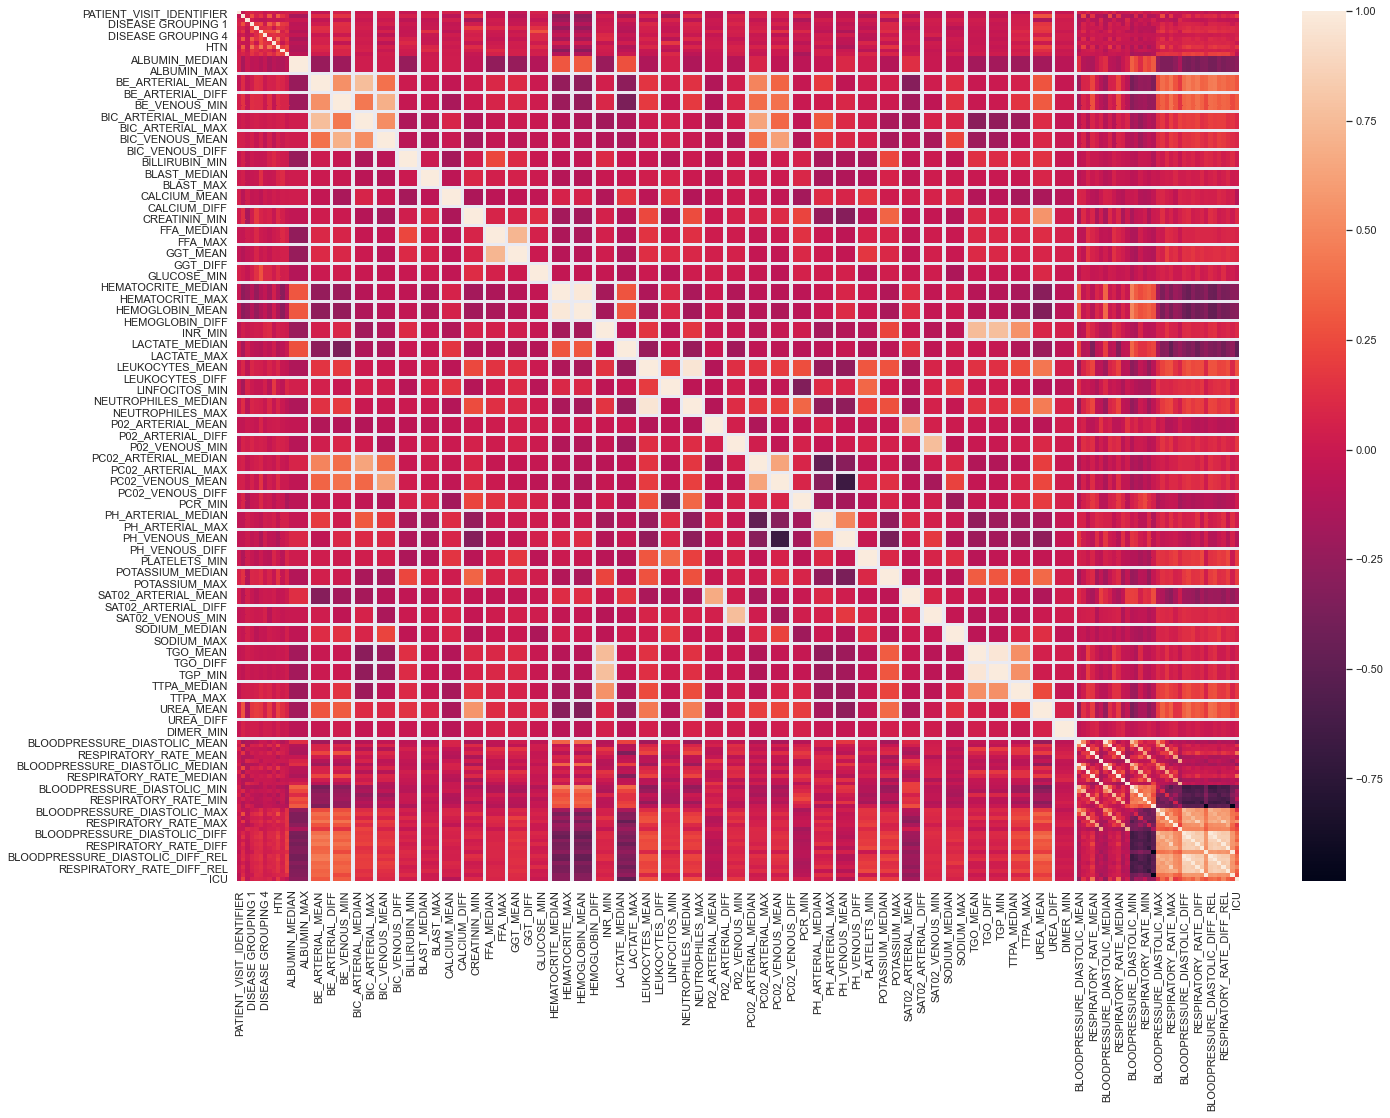

In [ ]:
#Compute Pearson correlation
df_corr = df.corr()

sns.set(rc={"figure.figsize": (20, 16)})
sns.heatmap(df_corr)


In [ ]:
# Show correlation values in stacked format
def rank_correlation_score (data):
    
    # Stacked correlation map into 3-columns format
    stacked_corr = data.corr().stack().reset_index().rename(
        columns = {"level_0":"Feature_1",
                   "level_1":"Feature_2",
                   0: "Pearson_Correlation"})
    
    # Remove redudant relationships
    stacked_corr = stacked_corr.query('Feature_1 != Feature_2')
    chained_feature_names = ['-'.join(np.sort(x)) for x in stacked_corr[['Feature_1', 'Feature_2']].values]
    stacked_corr.loc[:,'Duplicate_Key'] = chained_feature_names
    stacked_corr = stacked_corr.drop_duplicates(subset = 'Duplicate_Key').drop(columns = 'Duplicate_Key')

    #Remove correlations to the target
    stacked_corr = stacked_corr[stacked_corr['Feature_1'] != 'ICU']
    stacked_corr = stacked_corr[stacked_corr['Feature_2'] != 'ICU']
    
    # Order absolute correlation strenght
    stacked_corr['Pearson_Correlation'] = abs(stacked_corr['Pearson_Correlation'])
    return stacked_corr.sort_values(by='Pearson_Correlation', ascending=False)


stacked_df_corr = rank_correlation_score(df)
stacked_df_corr

Feature_1               Feature_2  Pearson_Correlation
27161          TGP_MEDIAN                TGP_MEAN             1.000000
23282    POTASSIUM_MEDIAN           POTASSIUM_MIN             1.000000
7955         CALCIUM_MEAN             CALCIUM_MIN             1.000000
7956         CALCIUM_MEAN             CALCIUM_MAX             1.000000
13195          INR_MEDIAN                 INR_MAX             1.000000
...                   ...                     ...                  ...
400                GENDER             ALBUMIN_MIN             0.000063
399                GENDER            ALBUMIN_MEAN             0.000063
398                GENDER          ALBUMIN_MEDIAN             0.000063
401                GENDER             ALBUMIN_MAX             0.000063
764    DISEASE GROUPING 1  OXYGEN_SATURATION_DIFF             0.000040

[18336 rows x 3 columns]

According to the Pearson correlation results, all columns above 0.99 indicate high similarity with each other. In this case, similar columns need to be extracted from regular columns.

In [ ]:
#Filter very strong correlations
stacked_df_corr[stacked_df_corr['Pearson_Correlation'] > 0.99]


Feature_1                        Feature_2  \
27161                   TGP_MEDIAN                         TGP_MEAN   
23282             POTASSIUM_MEDIAN                    POTASSIUM_MIN   
7955                  CALCIUM_MEAN                      CALCIUM_MIN   
7956                  CALCIUM_MEAN                      CALCIUM_MAX   
13195                   INR_MEDIAN                          INR_MAX   
...                            ...                              ...   
35896       OXYGEN_SATURATION_DIFF       OXYGEN_SATURATION_DIFF_REL   
35120  BLOODPRESSURE_SISTOLIC_DIFF  BLOODPRESSURE_SISTOLIC_DIFF_REL   
30658              HEART_RATE_MEAN                HEART_RATE_MEDIAN   
35508        RESPIRATORY_RATE_DIFF        RESPIRATORY_RATE_DIFF_REL   
30464  BLOODPRESSURE_SISTOLIC_MEAN    BLOODPRESSURE_SISTOLIC_MEDIAN   

       Pearson_Correlation  
27161             1.000000  
23282             1.000000  
7955              1.000000  
7956              1.000000  
13195             1.000000  
...                    ...  
35896             0.999831  
35120             0.991276  
30658             0.991238  
35508             0.991107  
30464             0.990993  

[222 rows x 3 columns]

In [ ]:
#Investigate MEAN/MEDIAN correlations
stacked_df_corr['MEASURE_FEATURE_1'] = [x.split('_')[0] for x in stacked_df_corr['Feature_1']]
stacked_df_corr['MEASURE_FEATURE_2'] = [x.split('_')[0] for x in stacked_df_corr['Feature_2']]
stacked_df_corr['TYPE_FEATURE_1'] = [x.split('_')[-1] for x in stacked_df_corr['Feature_1']]
stacked_df_corr['TYPE_FEATURE_2'] = [x.split('_')[-1] for x in stacked_df_corr['Feature_2']]

mean_median_corr = stacked_df_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
mean_median_corr = mean_median_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_1'].isin(['MEDIAN', 'MEAN'])]
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_2'].isin(['MEDIAN', 'MEAN'])]

relevant_cols = ['Feature_1', 'Feature_2', 'Pearson_Correlation']
mean_median_corr[relevant_cols]

Feature_1                       Feature_2  \
27161                    TGP_MEDIAN                        TGP_MEAN   
13193                    INR_MEDIAN                        INR_MEAN   
23281              POTASSIUM_MEDIAN                  POTASSIUM_MEAN   
4657            BIC_ARTERIAL_MEDIAN               BIC_ARTERIAL_MEAN   
8537               CREATININ_MEDIAN                  CREATININ_MEAN   
27937                   TTPA_MEDIAN                       TTPA_MEAN   
7761                 CALCIUM_MEDIAN                    CALCIUM_MEAN   
20177                    PCR_MEDIAN                        PCR_MEAN   
26385                    TGO_MEDIAN                        TGO_MEAN   
3105             BE_ARTERIAL_MEDIAN                BE_ARTERIAL_MEAN   
3881               BE_VENOUS_MEDIAN                  BE_VENOUS_MEAN   
15521             LINFOCITOS_MEDIAN                 LINFOCITOS_MEAN   
16297           NEUTROPHILES_MEDIAN               NEUTROPHILES_MEAN   
9313                     FFA_MEDIAN                        FFA_MEAN   
18625          PC02_ARTERIAL_MEDIAN              PC02_ARTERIAL_MEAN   
24833           SAT02_VENOUS_MEDIAN               SAT02_VENOUS_MEAN   
29489                  DIMER_MEDIAN                      DIMER_MEAN   
17073           P02_ARTERIAL_MEDIAN               P02_ARTERIAL_MEAN   
5433              BIC_VENOUS_MEDIAN                 BIC_VENOUS_MEAN   
14745             LEUKOCYTES_MEDIAN                 LEUKOCYTES_MEAN   
6209              BILLIRUBIN_MEDIAN                 BILLIRUBIN_MEAN   
28713                   UREA_MEDIAN                       UREA_MEAN   
2329                 ALBUMIN_MEDIAN                    ALBUMIN_MEAN   
24057         SAT02_ARTERIAL_MEDIAN             SAT02_ARTERIAL_MEAN   
25609                 SODIUM_MEDIAN                     SODIUM_MEAN   
6985                   BLAST_MEDIAN                      BLAST_MEAN   
13969                LACTATE_MEDIAN                    LACTATE_MEAN   
12417             HEMOGLOBIN_MEDIAN                 HEMOGLOBIN_MEAN   
10089                    GGT_MEDIAN                        GGT_MEAN   
11641            HEMATOCRITE_MEDIAN                HEMATOCRITE_MEAN   
10865                GLUCOSE_MEDIAN                    GLUCOSE_MEAN   
20953            PH_ARTERIAL_MEDIAN                PH_ARTERIAL_MEAN   
22505              PLATELETS_MEDIAN                  PLATELETS_MEAN   
21729              PH_VENOUS_MEDIAN                  PH_VENOUS_MEAN   
19401            PC02_VENOUS_MEDIAN                PC02_VENOUS_MEAN   
17849             P02_VENOUS_MEDIAN                 P02_VENOUS_MEAN   
30658               HEART_RATE_MEAN               HEART_RATE_MEDIAN   
30464   BLOODPRESSURE_SISTOLIC_MEAN   BLOODPRESSURE_SISTOLIC_MEDIAN   
31046              TEMPERATURE_MEAN              TEMPERATURE_MEDIAN   
30270  BLOODPRESSURE_DIASTOLIC_MEAN  BLOODPRESSURE_DIASTOLIC_MEDIAN   
30852         RESPIRATORY_RATE_MEAN         RESPIRATORY_RATE_MEDIAN   
31240        OXYGEN_SATURATION_MEAN        OXYGEN_SATURATION_MEDIAN   
18629          PC02_ARTERIAL_MEDIAN                PC02_VENOUS_MEAN   
18821            PC02_ARTERIAL_MEAN              PC02_VENOUS_MEDIAN   
3109             BE_ARTERIAL_MEDIAN                  BE_VENOUS_MEAN   
3301               BE_ARTERIAL_MEAN                BE_VENOUS_MEDIAN   
4661            BIC_ARTERIAL_MEDIAN                 BIC_VENOUS_MEAN   
4853              BIC_ARTERIAL_MEAN               BIC_VENOUS_MEDIAN   
30271  BLOODPRESSURE_DIASTOLIC_MEAN   BLOODPRESSURE_SISTOLIC_MEDIAN   
21149              PH_ARTERIAL_MEAN                PH_VENOUS_MEDIAN   
20957            PH_ARTERIAL_MEDIAN                  PH_VENOUS_MEAN   
30463   BLOODPRESSURE_SISTOLIC_MEAN  BLOODPRESSURE_DIASTOLIC_MEDIAN   
24253           SAT02_ARTERIAL_MEAN             SAT02_VENOUS_MEDIAN   
24061         SAT02_ARTERIAL_MEDIAN               SAT02_VENOUS_MEAN   
17077           P02_ARTERIAL_MEDIAN                 P02_VENOUS_MEAN   
17269             P02_ARTERIAL_MEAN               

Well, the table shows there are no exceptions to our previous assertion. Still, there are two smaller correlations values above. If you look closer, however, Feature_1 and Feature_2 are not part of the same measurement. They probably just slipped through our filters and don't matter for this specific step.

In the end, this means we do not need both MEAN and MEDIAN features for a given measurement type. So, we are going to stick with the MEAN attributes for now

In [ ]:
#Investigate DIFF/DIFF_REL correlations
diff_corr = stacked_df_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
diff_corr = diff_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_1'].isin(['DIFF', 'REL'])]
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_2'].isin(['DIFF', 'REL'])]

diff_corr[relevant_cols]

Feature_1                         Feature_2  \
35702              TEMPERATURE_DIFF              TEMPERATURE_DIFF_REL   
35896        OXYGEN_SATURATION_DIFF        OXYGEN_SATURATION_DIFF_REL   
35120   BLOODPRESSURE_SISTOLIC_DIFF   BLOODPRESSURE_SISTOLIC_DIFF_REL   
35508         RESPIRATORY_RATE_DIFF         RESPIRATORY_RATE_DIFF_REL   
34926  BLOODPRESSURE_DIASTOLIC_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL   
35314               HEART_RATE_DIFF               HEART_RATE_DIFF_REL   
35119   BLOODPRESSURE_SISTOLIC_DIFF  BLOODPRESSURE_DIASTOLIC_DIFF_REL   
34927  BLOODPRESSURE_DIASTOLIC_DIFF   BLOODPRESSURE_SISTOLIC_DIFF_REL   

       Pearson_Correlation  
35702             0.999898  
35896             0.999831  
35120             0.991276  
35508             0.991107  
34926             0.988137  
35314             0.983785  
35119             0.923985  
34927             0.923707

Once again, no exceptions are found for the DIFF/DIFF_REL correlation behavior. As in the previous table, the second and third records are to be neglected, since they are not actually comparing the same measurement type. For this duo, we choose the DIFF_REL features to remove.

Now that we have already evaluated the most extreme correlation cases between features, let's see how these attributes relate to the target column.

**Checking If the Two or More Columns are One To One**

We need to extract the high correlation status for all columns and then keep the other columns as identical_column for each patient.

In [ ]:
def check_one_to_one(df, columns):

    # Check for one column
    if len(columns) == 1:
        return True

    # Check for 2 or more columns
    result = df.groupby(columns).count()
    uniqueness = [result.index.get_level_values(
        i).is_unique for i in range(result.index.nlevels)]

    return all(uniqueness)


# Getting combinations of all the columns
combinations = list(combinations(df.columns, 2))

# Running to see if any of them are identical
identical_columns = []

for column in np.arange(0, len(combinations), 1):
    x = [combinations[column][0], combinations[column][1]]
    if check_one_to_one(df, x) == True:
        identical_columns.append(combinations[column][0])

In [ ]:
df_new = df.copy()  # Copy the dataset
all_columns = [x for x in df_new.columns if x not in identical_columns]
df_new = df_new.loc[:, all_columns]

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 88 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   PATIENT_VISIT_IDENTIFIER          1925 non-null   int64  
 1   AGE_ABOVE65                       1925 non-null   int64  
 2   AGE_PERCENTIL                     1925 non-null   object 
 3   GENDER                            1925 non-null   int64  
 4   DISEASE GROUPING 1                1920 non-null   float64
 5   DISEASE GROUPING 2                1920 non-null   float64
 6   DISEASE GROUPING 3                1920 non-null   float64
 7   DISEASE GROUPING 4                1920 non-null   float64
 8   DISEASE GROUPING 5                1920 non-null   float64
 9   DISEASE GROUPING 6                1920 non-null   float64
 10  HTN                               1920 non-null   float64
 11  IMMUNOCOMPROMISED                 1920 non-null   float64
 12  OTHER 

By looking at the Pearson correlation results of different columns with each other and their one-to-one unity, we reduced the number of 321 columns to 87 columns in line with the information given.

##### C.1.2.2 Row Uniqueness

When we examine the whole data set, we observe that the first 5 rows belong to a patient. We observe that the next 5 lines belong to another patient. In this way, we see that the patient's data is repeated hourly. We increased the number of columns by converting all the rows one below the other into a column, and summing the values of each patient at different times in a single row.

Finally, the available data were limited to the number of patients.

In [ ]:
#Define function to rearrange the data
admission_window_order = {
    '0-2': 1,
    '2-4': 2, ''
    '4-6': 3,
    '6-12': 4,
    'ABOVE_12': 5}


def to_timeseries_format(data, position_dict):

    #Order dictionary
    position_dict = sorted(position_dict.items())

    #Split data
    df_list = []
    for position in position_dict:
        value, pos = position
        suffix = '_' + str(pos)
        df_list.append(data[data['WINDOW'] == value].add_suffix(
            suffix).reset_index(drop=True))

    #Reassemble data
    output_data = pd.concat(df_list, axis=1)
    return output_data


In [ ]:
#Rearrange data into time series format
df_new = to_timeseries_format(df_new, admission_window_order)

# Drop PATIENT_VISIT_IDENTIFIER column
df_new = df_new.drop(columns=['PATIENT_VISIT_IDENTIFIER_2', 'PATIENT_VISIT_IDENTIFIER_3','PATIENT_VISIT_IDENTIFIER_4', 'PATIENT_VISIT_IDENTIFIER_5'])

df_new.head()

PATIENT_VISIT_IDENTIFIER_1  AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  \
0                           0              1            60th         0   
1                           1              1            90th         1   
2                           2              0            10th         0   
3                           3              0            40th         1   
4                           4              0            10th         0   

   DISEASE GROUPING 1_1  DISEASE GROUPING 2_1  DISEASE GROUPING 3_1  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   DISEASE GROUPING 4_1  DISEASE GROUPING 5_1  DISEASE GROUPING 6_1  HTN_1  \
0                   0.0                   1.0                   1.0    0.0   
1                   0.0                   0.0                   0.0    1.0   
2                   0.0                   0.0                   0.0    0.0   
3                   0.0                   0.0                   0.0    0.0   
4                   0.0                   0.0                   0.0    0.0   

   IMMUNOCOMPROMISED_1  OTHER_1  ALBUMIN_MAX_1  BE_ARTERIAL_MAX_1  \
0                  0.0      1.0            NaN                NaN   
1                  1.0      1.0            NaN                NaN   
2                  0.0      1.0       0.605263               -1.0   
3                  1.0      1.0            NaN                NaN   
4                  0.0      1.0       0.605263               -1.0   

   BE_VENOUS_MAX_1  BIC_ARTERIAL_MAX_1  BIC_VENOUS_MAX_1  BILLIRUBIN_MAX_1  \
0              NaN                 NaN               NaN               NaN   
1              NaN                 NaN               NaN               NaN   
2             -1.0           -0.317073         -0.317073         -0.938950   
3              NaN                 NaN               NaN               NaN   
4             -1.0           -0.317073         -0.317073         -0.935113   

   BLAST_MAX_1  CALCIUM_MAX_1  CREATININ_MAX_1  FFA_MAX_1  GGT_MAX_1  \
0          NaN            NaN              NaN        NaN        NaN   
1          NaN            NaN              NaN        NaN        NaN   
2         -1.0       0.357143        -0.912243  -0.742004  -0.958528   
3          NaN            NaN              NaN        NaN        NaN   
4         -1.0       0.357143        -0.913659  -0.829424  -0.938084   

   GLUCOSE_MAX_1  HEMATOCRITE_MAX_1  HEMOGLOBIN_MAX_1  INR_MAX_1  \
0            NaN                NaN               NaN        NaN   
1            NaN                NaN               NaN        NaN   
2      -0.780261           0.144654          0.158537  -0.959849   
3            NaN                NaN               NaN        NaN   
4      -0.851024           0.358491          0.304878  -0.959849   

   LACTATE_MAX_1  LEUKOCYTES_MAX_1  LINFOCITOS_MAX_1  NEUTROPHILES_MAX_1  \
0            NaN               NaN               NaN                 NaN   
1            NaN               NaN               NaN                 NaN   
2            1.0         -0.382773         -0.908714           -0.412965   
3            NaN               NaN               NaN                 NaN   
4            1.0         -0.702202         -0.641079           -0.812725   

   P02_ARTERIAL_MAX_1  P02_VENOUS_MAX_1  PC02_ARTERIAL_MAX_1  \
0                 NaN               NaN                  NaN   
1                 NaN               NaN                  NaN   
2           -0.170732         -0.704142             -0.77931   
3                 NaN               NaN                  NaN   
4           -0.170732         -0.704142             -0.77931   

   PC02_VENOUS_MAX_1  PCR_MAX_1  PH_ARTERIAL_MAX_1  PH_VENOUS_MAX_1  \
0                NaN   

We are on step closer to finishing the data preprocessing. In order to reduce our dataset, we are now going to remove the redudant variables. We are talking about features that will not change for a given patient, such as *AGE_PERCENTIL* and *GENDER*.

In [ ]:
#Define function to remove redudant columns
def remove_redudant_cols(data, cols, range_begin, range_end):
    for n in range(range_begin, range_end+1):
        rm_cols = [x + '_'  + str(n) for x in cols]
        data = data.drop(columns = rm_cols)
        
    return data

In [ ]:
#Remove redudant columns
redudant_cols = ['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'HTN', 'WINDOW']
df_new = remove_redudant_cols(df_new, redudant_cols, 2, 5).drop(columns = 'WINDOW_1')

df_new


PATIENT_VISIT_IDENTIFIER_1  AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  \
0                             0              1            60th         0   
1                             1              1            90th         1   
2                             2              0            10th         0   
3                             3              0            40th         1   
4                             4              0            10th         0   
..                          ...            ...             ...       ...   
380                         380              0            40th         1   
381                         381              1      Above 90th         0   
382                         382              0            50th         0   
383                         383              0            40th         1   
384                         384              0            50th         1   

     DISEASE GROUPING 1_1  DISEASE GROUPING 2_1  DISEASE GROUPING 3_1  \
0                     0.0                   0.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   
..                    ...                   ...                   ...   
380                   0.0                   0.0                   0.0   
381                   0.0                   0.0                   0.0   
382                   0.0                   0.0                   0.0   
383                   0.0                   0.0                   0.0   
384                   0.0                   0.0                   0.0   

     DISEASE GROUPING 4_1  DISEASE GROUPING 5_1  DISEASE GROUPING 6_1  HTN_1  \
0                     0.0                   1.0                   1.0    0.0   
1                     0.0                   0.0                   0.0    1.0   
2                     0.0                   0.0                   0.0    0.0   
3                     0.0                   0.0                   0.0    0.0   
4                     0.0                   0.0                   0.0    0.0   
..                    ...                   ...                   ...    ...   
380                   0.0                   0.0                   0.0    0.0   
381                   0.0                   0.0                   0.0    0.0   
382                   0.0                   0.0                   0.0    0.0   
383                   0.0                   0.0                   0.0    0.0   
384                   0.0                   0.0                   0.0    0.0   

     IMMUNOCOMPROMISED_1  OTHER_1  ALBUMIN_MAX_1  BE_ARTERIAL_MAX_1  \
0                    0.0      1.0            NaN                NaN   
1                    1.0      1.0            NaN                NaN   
2                    0.0      1.0       0.605263               -1.0   
3                    1.0      1.0            NaN                NaN   
4                    0.0      1.0       0.605263               -1.0   
..                   ...      ...            ...                ...   
380                  1.0      1.0            NaN                NaN   
381                  1.0      1.0            NaN                NaN   
382                  0.0      0.0       0.605263               -1.0   
383                  0.0      0.0            NaN                NaN   
384                  0.0      1.0            NaN                NaN   

     BE_VENOUS_MAX_1  BIC_ARTERIAL_MAX_1  BIC_VENOUS_MAX_1  BILLIRUBIN_MAX_1  \
0                NaN                 NaN               NaN               NaN   
1                NaN                 NaN               NaN               NaN   
2               -1.0           -0.317073         -0.317073         -0.938950   
3                NaN                 NaN               NaN               NaN   
4

##### C.1.2.3 Missing Values - Dropping Columns

In [ ]:
# Identify features with missing values as a percentage of the total number of records
null_values = df_new.isnull().sum()
null_values = 100 * null_values[null_values > 0] / len(df_new)

null_values.sort_values(ascending = False)

TGP_MAX_3                       89.090909
ALBUMIN_MAX_3                   89.090909
LINFOCITOS_MAX_3                89.090909
LEUKOCYTES_MAX_3                89.090909
LACTATE_MAX_3                   89.090909
                                  ...    
DISEASE GROUPING 1_4             0.259740
DISEASE GROUPING 2_1             0.259740
OTHER_3                          0.259740
IMMUNOCOMPROMISED_3              0.259740
OXYGEN_SATURATION_DIFF_REL_5     0.259740
Length: 406, dtype: float64

In [ ]:
over_50pct_nulls = null_values[null_values > 50]
print(over_50pct_nulls.sort_index())

ALBUMIN_MAX_1        55.324675
ALBUMIN_MAX_2        54.025974
ALBUMIN_MAX_3        89.090909
ALBUMIN_MAX_4        85.454545
BE_ARTERIAL_MAX_1    55.324675
                       ...    
TTPA_MAX_4           85.454545
UREA_MAX_1           55.324675
UREA_MAX_2           54.025974
UREA_MAX_3           89.090909
UREA_MAX_4           85.454545
Length: 220, dtype: float64


In [ ]:
#Identifying which feature groups are mostly composed of missing values
over_50pct_nulls = over_50pct_nulls.reset_index(level = 0).rename(columns = {'index': 'Feature', 0: 'Null_Pct'})
over_50pct_nulls['Feature_Group'] = [x[:-2] for x in over_50pct_nulls['Feature']]

null_aggregate = over_50pct_nulls.groupby(by = 'Feature_Group').agg({'Null_Pct': ['count', 'min', 'max']})
print(null_aggregate)

                 Null_Pct                      
                    count        min        max
Feature_Group                                  
ALBUMIN_MAX             4  54.025974  89.090909
BE_ARTERIAL_MAX         4  54.025974  89.090909
BE_VENOUS_MAX           4  54.025974  89.090909
BIC_ARTERIAL_MAX        4  54.025974  89.090909
BIC_VENOUS_MAX          4  54.025974  89.090909
...                   ...        ...        ...
TEMPERATURE_MIN         2  55.844156  68.311688
TGO_MAX                 4  54.025974  89.090909
TGP_MAX                 4  54.025974  89.090909
TTPA_MAX                4  54.025974  89.090909
UREA_MAX                4  54.025974  89.090909

[73 rows x 3 columns]


In [ ]:
null_aggregate.columns = ['_'.join(col).strip() for col in null_aggregate.columns.values]
null_aggregate.query('Null_Pct_count == 4 & Null_Pct_min > 50')

Null_Pct_count  Null_Pct_min  Null_Pct_max
Feature_Group                                                 
ALBUMIN_MAX                      4     54.025974     89.090909
BE_ARTERIAL_MAX                  4     54.025974     89.090909
BE_VENOUS_MAX                    4     54.025974     89.090909
BIC_ARTERIAL_MAX                 4     54.025974     89.090909
BIC_VENOUS_MAX                   4     54.025974     89.090909
BILLIRUBIN_MAX                   4     54.025974     89.090909
BLAST_MAX                        4     54.025974     89.090909
CALCIUM_MAX                      4     54.025974     89.090909
CREATININ_MAX                    4     54.025974     89.090909
DIMER_DIFF                       4     54.025974     89.090909
DIMER_MAX                        4     54.025974     89.090909
FFA_MAX                          4     54.025974     89.090909
GGT_MAX                          4     54.025974     89.090909
GLUCOSE_MAX                      4     54.025974     89.090909
HEMATOCRITE_MAX                  4     54.025974     89.090909
HEMOGLOBIN_MAX                   4     54.025974     89.090909
INR_MAX                          4     54.025974     89.090909
LACTATE_MAX                      4     54.025974     89.090909
LEUKOCYTES_MAX                   4     54.025974     89.090909
LINFOCITOS_MAX                   4     54.025974     89.090909
NEUTROPHILES_MAX                 4     54.025974     89.090909
P02_ARTERIAL_MAX                 4     54.025974     89.090909
P02_VENOUS_MAX                   4     54.025974     89.090909
PC02_ARTERIAL_MAX                4     54.025974     89.090909
PC02_VENOUS_MAX                  4     54.025974     89.090909
PCR_MAX                          4     54.025974     89.090909
PH_ARTERIAL_MAX                  4     54.025974     89.090909
PH_VENOUS_MAX                    4     54.025974     89.090909
PLATELETS_MAX                    4     54.025974     89.090909
POTASSIUM_MAX                    4     54.025974     89.090909
SAT02_ARTERIAL_MAX               4     54.025974     89.090909
SAT02_VENOUS_MAX                 4     54.025974     89.090909
SODIUM_MAX                       4     54.025974     89.090909
TGO_MAX                          4     54.025974     89.090909
TGP_MAX                          4     54.025974     89.090909
TTPA_MAX                         4     54.025974     89.090909
UREA_MAX                         4     54.025974     89.090909

In [ ]:
#Remove columns with overrepresentation of null values
over_50pct_nulls = null_aggregate.query('Null_Pct_count == 4 & Null_Pct_min > 50').index

for n in range(1, 6):
    remove_cols = [x + '_' + str(n) for x in over_50pct_nulls]
    df_new = df_new.drop(columns=remove_cols)

df_new.head()


PATIENT_VISIT_IDENTIFIER_1  AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  \
0                           0              1            60th         0   
1                           1              1            90th         1   
2                           2              0            10th         0   
3                           3              0            40th         1   
4                           4              0            10th         0   

   DISEASE GROUPING 1_1  DISEASE GROUPING 2_1  DISEASE GROUPING 3_1  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   DISEASE GROUPING 4_1  DISEASE GROUPING 5_1  DISEASE GROUPING 6_1  HTN_1  \
0                   0.0                   1.0                   1.0    0.0   
1                   0.0                   0.0                   0.0    1.0   
2                   0.0                   0.0                   0.0    0.0   
3                   0.0                   0.0                   0.0    0.0   
4                   0.0                   0.0                   0.0    0.0   

   IMMUNOCOMPROMISED_1  OTHER_1  BLOODPRESSURE_DIASTOLIC_MEAN_1  \
0                  0.0      1.0                        0.086420   
1                  1.0      1.0                       -0.283951   
2                  0.0      1.0                             NaN   
3                  1.0      1.0                             NaN   
4                  0.0      1.0                             NaN   

   BLOODPRESSURE_SISTOLIC_MEAN_1  HEART_RATE_MEAN_1  RESPIRATORY_RATE_MEAN_1  \
0                      -0.230769          -0.283019                -0.593220   
1                      -0.046154           0.188679                 0.830508   
2                            NaN                NaN                      NaN   
3                            NaN                NaN                      NaN   
4                            NaN                NaN                      NaN   

   TEMPERATURE_MEAN_1  OXYGEN_SATURATION_MEAN_1  \
0           -0.285714                  0.736842   
1           -0.107143                  1.000000   
2                 NaN                       NaN   
3                 NaN                       NaN   
4                 NaN                       NaN   

   BLOODPRESSURE_DIASTOLIC_MEDIAN_1  BLOODPRESSURE_SISTOLIC_MEDIAN_1  \
0                          0.086420                        -0.230769   
1                         -0.283951                        -0.046154   
2                               NaN                              NaN   
3                               NaN                              NaN   
4                               NaN                              NaN   

   HEART_RATE_MEDIAN_1  RESPIRATORY_RATE_MEDIAN_1  TEMPERATURE_MEDIAN_1  \
0            -0.283019                  -0.586207             -0.285714   
1             0.188679                   0.862069             -0.107143   
2                  NaN                        NaN                   NaN   
3                  NaN                        NaN                   NaN   
4                  NaN                        NaN                   NaN   

   OXYGEN_SATURATION_MEDIAN_1  BLOODPRESSURE_DIASTOLIC_MIN_1  \
0                    0.736842                       0.237113   
1                    1.000000                      -0.072165   
2                         NaN                            NaN   
3                         NaN                            NaN   
4                         NaN                            NaN   

   BLOODPRESSURE_SISTOLIC_MIN_1  HEART_RATE_MIN_1  RESPIRATORY_RATE_MIN_1  \
0                          0.00         -0.162393                    -0.5   
1                          0.15          0.26495

In [ ]:
null_values = df_new.isnull().sum()
null_values = 100 * null_values[null_values > 0] / len(df_new)

null_values.sort_index()

BLOODPRESSURE_DIASTOLIC_DIFF_1    64.415584
BLOODPRESSURE_DIASTOLIC_DIFF_2    54.025974
BLOODPRESSURE_DIASTOLIC_DIFF_3    43.636364
BLOODPRESSURE_DIASTOLIC_DIFF_4    15.584416
BLOODPRESSURE_DIASTOLIC_DIFF_5     0.259740
                                    ...    
TEMPERATURE_MIN_1                 68.311688
TEMPERATURE_MIN_2                 55.844156
TEMPERATURE_MIN_3                 43.896104
TEMPERATURE_MIN_4                 11.948052
TEMPERATURE_MIN_5                  0.259740
Length: 221, dtype: float64

#### C.1.3 Missing Data Handling

A very interesting pattern seems to arise from the missing value percentage computed data. It appears there are missing values on the early stages of admission to the hospital which gradually reduce to nearly zero at the last measurement window. This probably due to the fact that, not all measurements are taken early in the admission.

This leads us to the first approach we are going to take on filling the missing values. Basically, the assumption is measurements start to be taken when the patient has just started to present some change on his or hers clinical condition. Therefore, we assume the previous null values could be filled with the first non null value for a given patient.

In [ ]:
#Split columns into time variant or patient constant
col_groups = np.unique([x[:-2] for x in df_new.columns.values], return_counts = True)
time_cols = [col_groups[0][x] for x in range(len(col_groups[0])) if col_groups[1][x] > 1]
constant_cols = [x + '_1' for x in col_groups[0] if x not in time_cols]

In [ ]:
#Define function to fill the missing values on the time variant features
def fill_missing_values(data, time_group, const_group):
    
    group_df = [data[const_group]]
    for group in time_group:
        col_names = [group + '_' + str(x) for x in range(1, 6)]
        group_df.append(data[col_names]\
                        .fillna(method = 'bfill', axis = 1).reset_index(drop = True)\
                        .fillna(method = "ffill", axis = 1).reset_index(drop = True))
    
    return pd.concat(group_df, axis = 1)

In [ ]:
# Fill missing values
df_new = fill_missing_values(df_new,time_cols, constant_cols)

null_values = df_new.isnull().sum()
null_values[null_values > 0].sort_values(ascending = False)

HTN_1                         1
OXYGEN_SATURATION_MEDIAN_2    1
OXYGEN_SATURATION_MAX_1       1
OXYGEN_SATURATION_MAX_2       1
OXYGEN_SATURATION_MAX_3       1
                             ..
DISEASE GROUPING 4_2          1
DISEASE GROUPING 4_3          1
DISEASE GROUPING 4_4          1
DISEASE GROUPING 4_5          1
TEMPERATURE_MIN_5             1
Length: 221, dtype: int64

After applying our approach for the missing values, there are still two null for most of the features. This is likely a single record with nearly no information. Let's confirm that.

In [ ]:
#Check which rows still have missing values
null_values = df_new.isnull().sum(axis=1)
null_rows = null_values[null_values > 0].index.values

print(null_rows)


[199]


This confirms our suspicion. Since we are talking about two records, let's just discard both of them.

In [ ]:
# remove remaining missing values
df_new = df_new.drop(index = null_rows)

In [ ]:
df_new

AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  HTN_1  \
0                1            60th         0    0.0   
1                1            90th         1    1.0   
2                0            10th         0    0.0   
3                0            40th         1    0.0   
4                0            10th         0    0.0   
..             ...             ...       ...    ...   
380              0            40th         1    0.0   
381              1      Above 90th         0    0.0   
382              0            50th         0    0.0   
383              0            40th         1    0.0   
384              0            50th         1    0.0   

     PATIENT_VISIT_IDENTIFIER_1  BLOODPRESSURE_DIASTOLIC_DIFF_1  \
0                             0                       -1.000000   
1                             1                       -1.000000   
2                             2                       -0.547826   
3                             3                       -1.000000   
4                             4                       -1.000000   
..                          ...                             ...   
380                         380                       -1.000000   
381                         381                       -1.000000   
382                         382                       -1.000000   
383                         383                       -1.000000   
384                         384                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_2  BLOODPRESSURE_DIASTOLIC_DIFF_3  \
0                         -1.000000                       -0.339130   
1                         -1.000000                       -1.000000   
2                         -0.547826                       -0.547826   
3                         -1.000000                       -1.000000   
4                         -1.000000                       -1.000000   
..                              ...                             ...   
380                       -1.000000                       -1.000000   
381                       -1.000000                       -1.000000   
382                       -1.000000                       -1.000000   
383                       -1.000000                       -1.000000   
384                       -1.000000                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_4  BLOODPRESSURE_DIASTOLIC_DIFF_5  \
0                         -0.339130                       -0.339130   
1                         -0.913043                        0.513043   
2                         -0.704348                       -0.547826   
3                         -1.000000                       -0.078261   
4                         -1.000000                       -0.478261   
..                              ...                             ...   
380                       -1.000000                       -0.530435   
381                       -1.000000                       -0.982609   
382                       -1.000000                       -0.408696   
383                       -1.000000                       -0.478261   
384                       -1.000000                       -0.652174   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_1  BLOODPRESSURE_DIASTOLIC_DIFF_REL_2  \
0                             -1.000000                           -1.000000   
1                             -1.000000                           -1.000000   
2                             -0.515528                           -0.515528   
3                             -1.000000                           -1.000000   
4                             -1.000000                           -1.000000   
..                                  ...                                 ...   
380                           -1.000000                           -1.000000   
381                           -1.000000                           -1.000000   
382                           -1.000000                           -1.000000   
383                           -1.000000    

In [ ]:
# How was the data filled?
columns = ["OXYGEN_SATURATION_MAX_1", "OXYGEN_SATURATION_MAX_2",
           "OXYGEN_SATURATION_MAX_3", "OXYGEN_SATURATION_MAX_4", "OXYGEN_SATURATION_MAX_5"]
df_new[columns]


OXYGEN_SATURATION_MAX_1  OXYGEN_SATURATION_MAX_2  \
0                   0.736842                 0.578947   
1                   1.000000                 0.894737   
2                   1.000000                 1.000000   
3                   0.684211                 0.684211   
4                   0.894737                 0.894737   
..                       ...                      ...   
380                 0.736842                 0.578947   
381                 0.526316                 0.526316   
382                 0.894737                 0.894737   
383                 0.736842                 0.736842   
384                 0.789474                 0.578947   

     OXYGEN_SATURATION_MAX_3  OXYGEN_SATURATION_MAX_4  OXYGEN_SATURATION_MAX_5  
0                   0.736842                 0.736842                 0.947368  
1                   1.000000                 1.000000                 1.000000  
2                   1.000000                 1.000000                 0.947368  
3                   0.684211                 0.578947                 1.000000  
4                   0.894737                 0.947368                 0.894737  
..                       ...                      ...                      ...  
380                 0.578947                 0.684211                 0.894737  
381                 0.526316                 0.526316                 0.789474  
382                 0.578947                 0.578947                 0.842105  
383                 0.736842                 0.684211                 0.894737  
384                 0.736842                 0.473684                 0.842105  

[384 rows x 5 columns]

#### C.1.4 Mask data of patients with ICU = 1 in the 0-2 Window Range

According to the information given in the data set we have, the data of patients with an ICU value of 1 in range 0-2 window cannot be used in the modeling part.

We want to explore the dataset, but before, there's a small matter we need to resolve. As we trying to create a model to predict whether or not a patient will require ICU care. Therefore, as instructed by the dataset providers, the data gathered after the ICU admission should not be taken into consideration. Since we are not going to use this data to model ICU admission, it does not make sense to explore this data. Let's them proceed to removing this data.

In [ ]:
# discard unreliable data
mask_unreliable = (df_new.ICU_1 == 1)
df_new = df_new.loc[~mask_unreliable]

In [ ]:
df_new

AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  HTN_1  \
0                1            60th         0    0.0   
2                0            10th         0    0.0   
3                0            40th         1    0.0   
4                0            10th         0    0.0   
5                0            10th         0    0.0   
..             ...             ...       ...    ...   
380              0            40th         1    0.0   
381              1      Above 90th         0    0.0   
382              0            50th         0    0.0   
383              0            40th         1    0.0   
384              0            50th         1    0.0   

     PATIENT_VISIT_IDENTIFIER_1  BLOODPRESSURE_DIASTOLIC_DIFF_1  \
0                             0                       -1.000000   
2                             2                       -0.547826   
3                             3                       -1.000000   
4                             4                       -1.000000   
5                             5                       -0.826087   
..                          ...                             ...   
380                         380                       -1.000000   
381                         381                       -1.000000   
382                         382                       -1.000000   
383                         383                       -1.000000   
384                         384                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_2  BLOODPRESSURE_DIASTOLIC_DIFF_3  \
0                         -1.000000                       -0.339130   
2                         -0.547826                       -0.547826   
3                         -1.000000                       -1.000000   
4                         -1.000000                       -1.000000   
5                         -0.826087                       -1.000000   
..                              ...                             ...   
380                       -1.000000                       -1.000000   
381                       -1.000000                       -1.000000   
382                       -1.000000                       -1.000000   
383                       -1.000000                       -1.000000   
384                       -1.000000                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_4  BLOODPRESSURE_DIASTOLIC_DIFF_5  \
0                         -0.339130                       -0.339130   
2                         -0.704348                       -0.547826   
3                         -1.000000                       -0.078261   
4                         -1.000000                       -0.478261   
5                         -1.000000                       -0.704348   
..                              ...                             ...   
380                       -1.000000                       -0.530435   
381                       -1.000000                       -0.982609   
382                       -1.000000                       -0.408696   
383                       -1.000000                       -0.478261   
384                       -1.000000                       -0.652174   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_1  BLOODPRESSURE_DIASTOLIC_DIFF_REL_2  \
0                             -1.000000                           -1.000000   
2                             -0.515528                           -0.515528   
3                             -1.000000                           -1.000000   
4                             -1.000000                           -1.000000   
5                             -0.860870                           -0.860870   
..                                  ...                                 ...   
380                           -1.000000                           -1.000000   
381                           -1.000000                           -1.000000   
382                           -1.000000                           -1.000000   
383                           -1.000000    

In [ ]:
ICU_col_values = df_new[["PATIENT_VISIT_IDENTIFIER_1","ICU_1", "ICU_2", "ICU_3", "ICU_4", "ICU_5"]]

In [ ]:
ICU_col_values

PATIENT_VISIT_IDENTIFIER_1  ICU_1  ICU_2  ICU_3  ICU_4  ICU_5
0                             0      0      0      0      0      1
2                             2      0      0      0      0      1
3                             3      0      0      0      0      0
4                             4      0      0      0      0      0
5                             5      0      0      0      0      0
..                          ...    ...    ...    ...    ...    ...
380                         380      0      0      0      0      1
381                         381      0      0      0      0      0
382                         382      0      0      0      0      1
383                         383      0      0      0      0      0
384                         384      0      0      0      0      0

[352 rows x 6 columns]

In [ ]:
# Delete the ICU columns
ICU_col = ["ICU_1","ICU_2","ICU_3","ICU_4","ICU_5"]
df_new = df_new.drop(columns= ICU_col)

In [ ]:
df_new

AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  HTN_1  \
0                1            60th         0    0.0   
2                0            10th         0    0.0   
3                0            40th         1    0.0   
4                0            10th         0    0.0   
5                0            10th         0    0.0   
..             ...             ...       ...    ...   
380              0            40th         1    0.0   
381              1      Above 90th         0    0.0   
382              0            50th         0    0.0   
383              0            40th         1    0.0   
384              0            50th         1    0.0   

     PATIENT_VISIT_IDENTIFIER_1  BLOODPRESSURE_DIASTOLIC_DIFF_1  \
0                             0                       -1.000000   
2                             2                       -0.547826   
3                             3                       -1.000000   
4                             4                       -1.000000   
5                             5                       -0.826087   
..                          ...                             ...   
380                         380                       -1.000000   
381                         381                       -1.000000   
382                         382                       -1.000000   
383                         383                       -1.000000   
384                         384                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_2  BLOODPRESSURE_DIASTOLIC_DIFF_3  \
0                         -1.000000                       -0.339130   
2                         -0.547826                       -0.547826   
3                         -1.000000                       -1.000000   
4                         -1.000000                       -1.000000   
5                         -0.826087                       -1.000000   
..                              ...                             ...   
380                       -1.000000                       -1.000000   
381                       -1.000000                       -1.000000   
382                       -1.000000                       -1.000000   
383                       -1.000000                       -1.000000   
384                       -1.000000                       -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_4  BLOODPRESSURE_DIASTOLIC_DIFF_5  \
0                         -0.339130                       -0.339130   
2                         -0.704348                       -0.547826   
3                         -1.000000                       -0.078261   
4                         -1.000000                       -0.478261   
5                         -1.000000                       -0.704348   
..                              ...                             ...   
380                       -1.000000                       -0.530435   
381                       -1.000000                       -0.982609   
382                       -1.000000                       -0.408696   
383                       -1.000000                       -0.478261   
384                       -1.000000                       -0.652174   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_1  BLOODPRESSURE_DIASTOLIC_DIFF_REL_2  \
0                             -1.000000                           -1.000000   
2                             -0.515528                           -0.515528   
3                             -1.000000                           -1.000000   
4                             -1.000000                           -1.000000   
5                             -0.860870                           -0.860870   
..                                  ...                                 ...   
380                           -1.000000                           -1.000000   
381                           -1.000000                           -1.000000   
382                           -1.000000                           -1.000000   
383                           -1.000000    

Two interesting things happened here. The first, the reduction on the number of columns, is very easy to explain. In our function, the ICU attributes are removed, result in precisely 5 fewer columns. The reduced amount of records on the other hand, indicates some patients were directly addmited to the ICU. Their data is of no use for the task we are trying to acomplish, so it was removed.

#### C.1.5. Data Consolidation

At the beggining of this notebook, one of the thing we did was compile the admission data to indetify whether each patient eventually required ICU treatment. Since our data is already on the format we intend to use, now it's a good time to put it all together.

In [ ]:
#Join data together
df_new = df_new.join(other=admission_data.set_index('PATIENT_VISIT_IDENTIFIER').drop(columns='WINDOW'),
                 on='PATIENT_VISIT_IDENTIFIER_1',
                 how='inner')
df_new.head()


AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  HTN_1  PATIENT_VISIT_IDENTIFIER_1  \
0              1            60th         0    0.0                           0   
2              0            10th         0    0.0                           2   
3              0            40th         1    0.0                           3   
4              0            10th         0    0.0                           4   
5              0            10th         0    0.0                           5   

   BLOODPRESSURE_DIASTOLIC_DIFF_1  BLOODPRESSURE_DIASTOLIC_DIFF_2  \
0                       -1.000000                       -1.000000   
2                       -0.547826                       -0.547826   
3                       -1.000000                       -1.000000   
4                       -1.000000                       -1.000000   
5                       -0.826087                       -0.826087   

   BLOODPRESSURE_DIASTOLIC_DIFF_3  BLOODPRESSURE_DIASTOLIC_DIFF_4  \
0                       -0.339130                       -0.339130   
2                       -0.547826                       -0.704348   
3                       -1.000000                       -1.000000   
4                       -1.000000                       -1.000000   
5                       -1.000000                       -1.000000   

   BLOODPRESSURE_DIASTOLIC_DIFF_5  BLOODPRESSURE_DIASTOLIC_DIFF_REL_1  \
0                       -0.339130                           -1.000000   
2                       -0.547826                           -0.515528   
3                       -0.078261                           -1.000000   
4                       -0.478261                           -1.000000   
5                       -0.704348                           -0.860870   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL_2  BLOODPRESSURE_DIASTOLIC_DIFF_REL_3  \
0                           -1.000000                           -0.389967   
2                           -0.515528                           -0.515528   
3                           -1.000000                           -1.000000   
4                           -1.000000                           -1.000000   
5                           -0.860870                           -1.000000   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL_4  BLOODPRESSURE_DIASTOLIC_DIFF_REL_5  \
0                           -0.389967                           -0.389967   
2                           -0.658863                           -0.612422   
3                           -1.000000                           -0.308696   
4                           -1.000000                           -0.652174   
5                           -1.000000                           -0.758651   

   BLOODPRESSURE_DIASTOLIC_MAX_1  BLOODPRESSURE_DIASTOLIC_MAX_2  \
0                      -0.247863                      -0.076923   
2                      -0.435897                      -0.435897   
3                      -0.299145                      -0.299145   
4                      -0.076923                      -0.076923   
5                      -0.247863                      -0.247863   

   BLOODPRESSURE_DIASTOLIC_MAX_3  BLOODPRESSURE_DIASTOLIC_MAX_4  \
0                      -0.076923                      -0.076923   
2                      -0.435897                      -0.572650   
3                      -0.299145                      -0.589744   
4                      -0.076923                      -0.247863   
5                      -0.418803                      -0.418803   

   BLOODPRESSURE_DIASTOLIC_MAX_5  BLOODPRESSURE_DIASTOLIC_MEAN_1  \
0                      -0.076923                        0.086420   
2                      -0.247863                       -0.489712   
3                       0.145299                        0.012346   
4                       0.094017                        0.333333   
5                      -0.179487                       -0.037037   

   BLOODPRESSURE_DIASTOLIC_MEAN_2  BLOODPRESSURE_DIASTOLIC_MEAN_3  \
0                        0.333333    

### C.2 Exploratory Data Analysis (EDA)

#### C.2.1 Visualizations After Data Analysis

In [ ]:
# category aggregation function

def aggregate(df, col, arg, title):

  # category values
  range_1 = len(df[df[col] == arg])
  show = print('{}: {}'.format(title, range_1))
  return show


----- AGE COUNT -----


AGE 10th: 37
AGE 20th: 42
AGE 30th: 39
AGE 40th: 38
AGE 50th: 34
AGE 60th: 30
AGE 70th: 34
AGE 80th: 36
AGE 90th: 28
AGE above 90th: 34


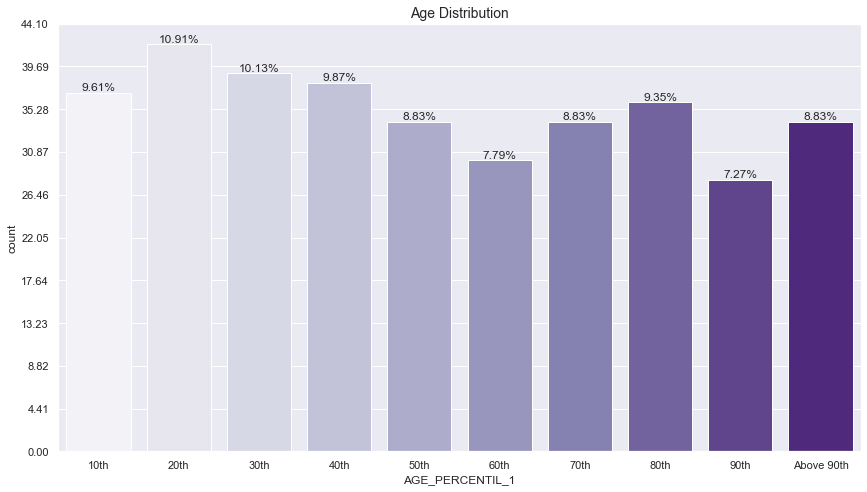

In [ ]:
# age distribution
plt.figure(figsize=(12, 7))
plt.title('Age Distribution', fontsize=14)
ax3 = sns.countplot(df_new['AGE_PERCENTIL_1'], palette='Purples', order=[
              "10th", "20th", "30th", "40th", "50th", "60th", "70th", "80th", "90th", "Above 90th"])
plt.tight_layout()

ncount = len(admission_data)

for p in ax3.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax3.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                    ha='center', va='bottom')  # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax3.yaxis.set_major_locator(ticker.LinearLocator(11))

# Summary ages
print('----- AGE COUNT -----')
print('\n')
aggregate(df_new, 'AGE_PERCENTIL_1', '10th', 'AGE 10th')
aggregate(df_new, 'AGE_PERCENTIL_1', '20th', 'AGE 20th')
aggregate(df_new, 'AGE_PERCENTIL_1', '30th', 'AGE 30th')
aggregate(df_new, 'AGE_PERCENTIL_1', '40th', 'AGE 40th')
aggregate(df_new, 'AGE_PERCENTIL_1', '50th', 'AGE 50th')
aggregate(df_new, 'AGE_PERCENTIL_1', '60th', 'AGE 60th')
aggregate(df_new, 'AGE_PERCENTIL_1', '70th', 'AGE 70th')
aggregate(df_new, 'AGE_PERCENTIL_1', '80th', 'AGE 80th')
aggregate(df_new, 'AGE_PERCENTIL_1', '90th', 'AGE 90th')
aggregate(df_new, 'AGE_PERCENTIL_1', 'Above 90th', 'AGE above 90th')


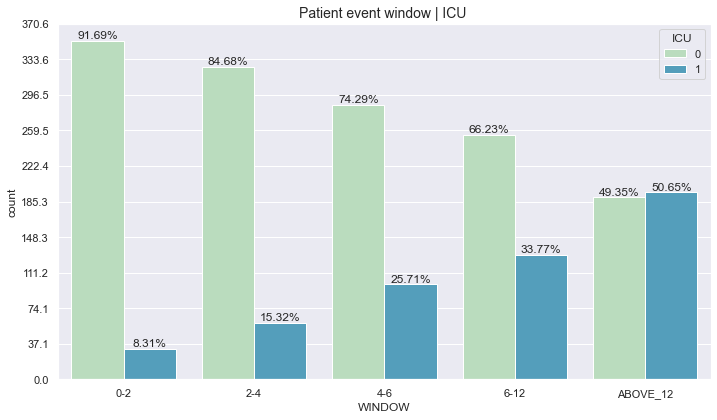

In [ ]:
# Patient event window
plt.figure(figsize=(10, 6))
plt.title('Patient event window | ICU ', fontsize=14)
ax4 = sns.countplot(df['WINDOW'], hue='ICU', data=df, palette='GnBu', )
plt.tight_layout()

ncount = len(admission_data)

for p in ax4.patches:
    x = p.get_bbox().get_points()[:, 0]
    y = p.get_bbox().get_points()[1, 1]
    ax4.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y),
                 ha='center', va='bottom')  # set the alignment of the text

# Use a LinearLocator to ensure the correct number of ticks
ax4.yaxis.set_major_locator(ticker.LinearLocator(11))


Ages are formatted on a percentile scale, it is a variable that follows a uniform trend.


Looking at the patient's windows (observation) over time in hours, it follows something that we predicted that over time, if the patient already has a strong suspicion on his admission to the hospital, he can be inserted into the ICU on his arrival, or maybe in 0-2 hours, etc., the sooner we can predict whether the patient will need a bed or not, the better.

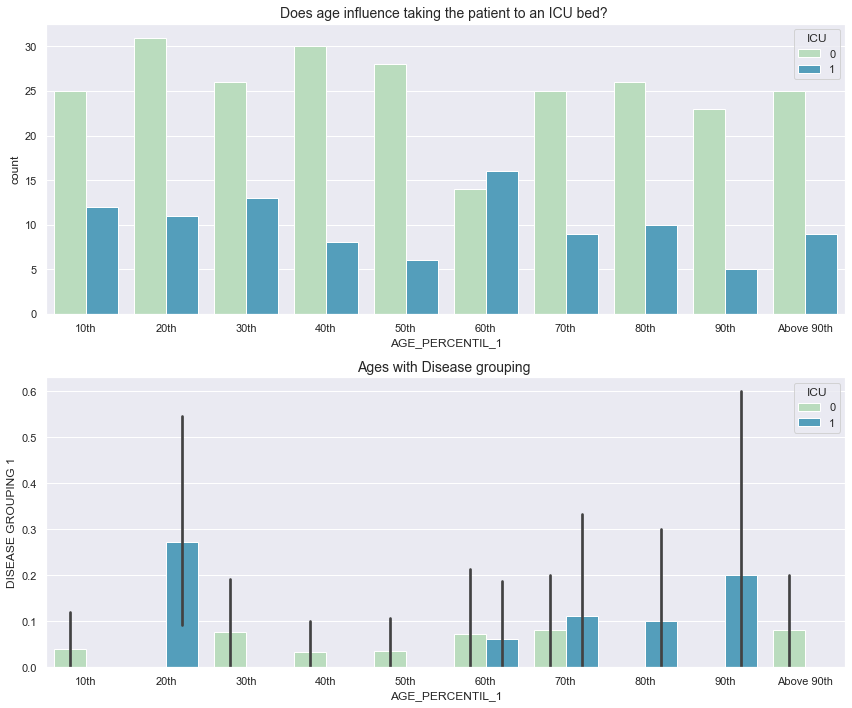

In [ ]:
# Does age influence taking the patient to an ICU bed?
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.title('Does age influence taking the patient to an ICU bed? ', fontsize=14)
sns.countplot(df_new['AGE_PERCENTIL_1'], hue='ICU', data=df, palette='GnBu', order = ["10th","20th","30th","40th","50th","60th","70th","80th","90th","Above 90th"])

print('\n')

# Ages with Disease Grouping 1
plt.subplot(2,1,2)
plt.title('Ages with Disease grouping ', fontsize=14)
sns.barplot(df_new['AGE_PERCENTIL_1'], y='DISEASE GROUPING 1', hue='ICU', data=df, palette='GnBu', order=[
            "10th", "20th", "30th", "40th", "50th", "60th", "70th", "80th", "90th", "Above 90th"])
plt.tight_layout()



Crossing the DISEASE GROUPING 1 feature with age, traits are also identified, that patients over 90 years old with this first group of diseases, have a high probability of being referred to ICU

#### C.2.2 Visualizations for Specific Features After Preparatory Data Analysis

##### C.2.2.1 Patient- Constant Features

In [ ]:
#Identify patient-constant features
col_groups = [x[:-2] for x in df_new.drop(columns = ['PATIENT_VISIT_IDENTIFIER_1', 'ICU']).columns.values]
col_groups = np.unique(col_groups , return_counts = True)

patient_constant_cols = [col_groups[0][x] for x in range(len(col_groups[0])) if col_groups[1][x] == 1]
patient_constant_cols

['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'HTN']

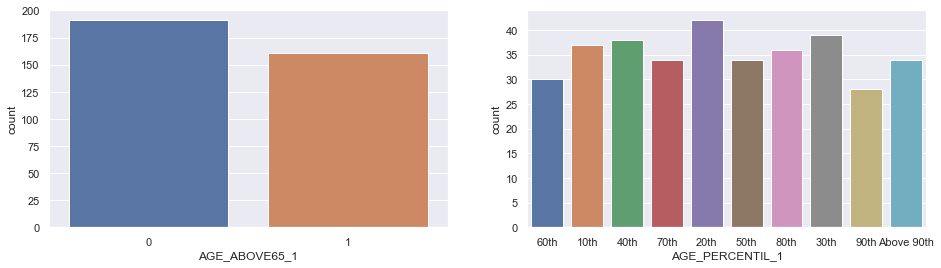

In [ ]:
#AGE_ABOVE65 and AGE_PERCENTIL
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.countplot(df_new['AGE_ABOVE65_1'], ax=axis[0])
sns.countplot(df_new['AGE_PERCENTIL_1'], ax=axis[1])
plt.show(fig)


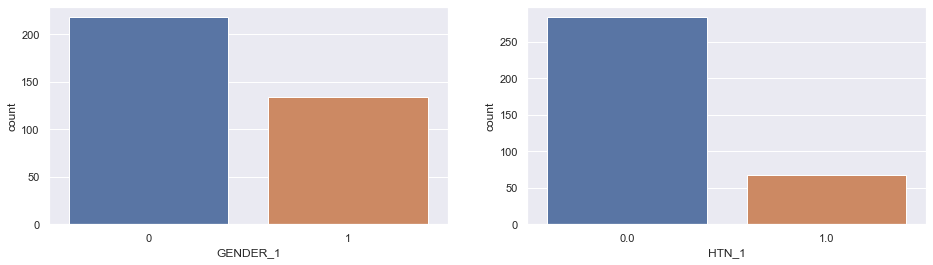

In [ ]:
#GENDER and HTN
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.countplot(df_new['GENDER_1'], ax=axis[0])
sns.countplot(df_new['HTN_1'], ax=axis[1])
plt.show(fig)


For these features, all but HTN are fairly well distributed. Let's not take a look at how they relate directly to the target.

In [ ]:
#Define function for a normalized staked bars plot
def normalized_stacked_bars(data, col, target):

    bottom = [0 for x in data[col].unique()]
    for cls in data[target].unique():
        x_vals, y_vals = np.unique(data[data[target] == cls][col], return_counts = True)
        x_vals = [str(x) for x in x_vals] 
        y_vals = [x / y for x, y in zip(y_vals, np.unique(data[col], return_counts = True)[1])]
        
        plt.bar(x_vals, y_vals, bottom = bottom, color = np.random.rand(1,3))
        bottom = [x + y for x, y in zip(bottom, y_vals)]
    
    plt.legend(np.unique(data[target]), title = target)
    plt.title(col)
    
    return plt.show()

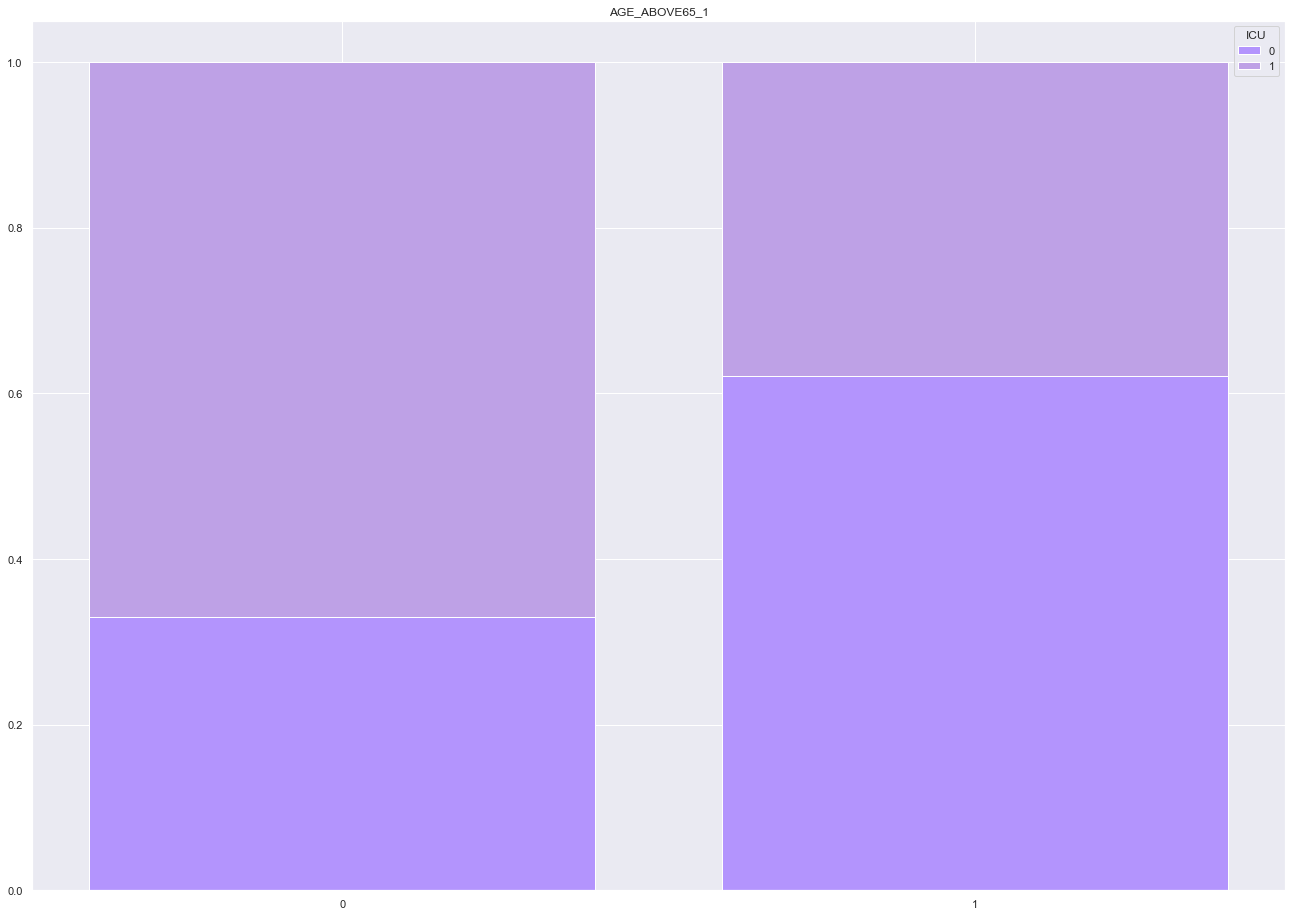

In [ ]:
#AGE_ABOVE65
normalized_stacked_bars(df_new, 'AGE_ABOVE65_1', 'ICU')


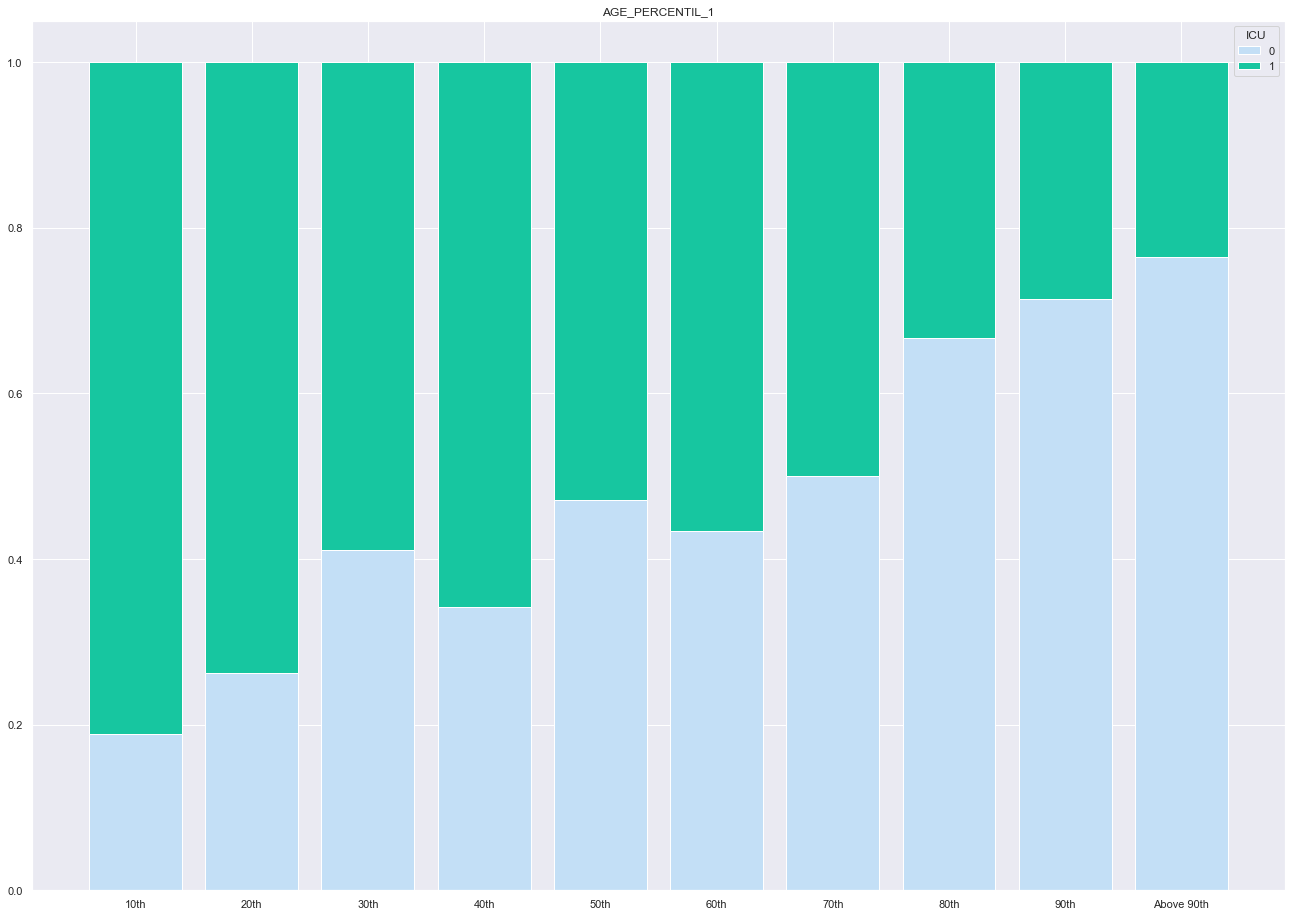

In [ ]:
#AGE_PERCENTIL
normalized_stacked_bars(df_new, 'AGE_PERCENTIL_1', 'ICU')


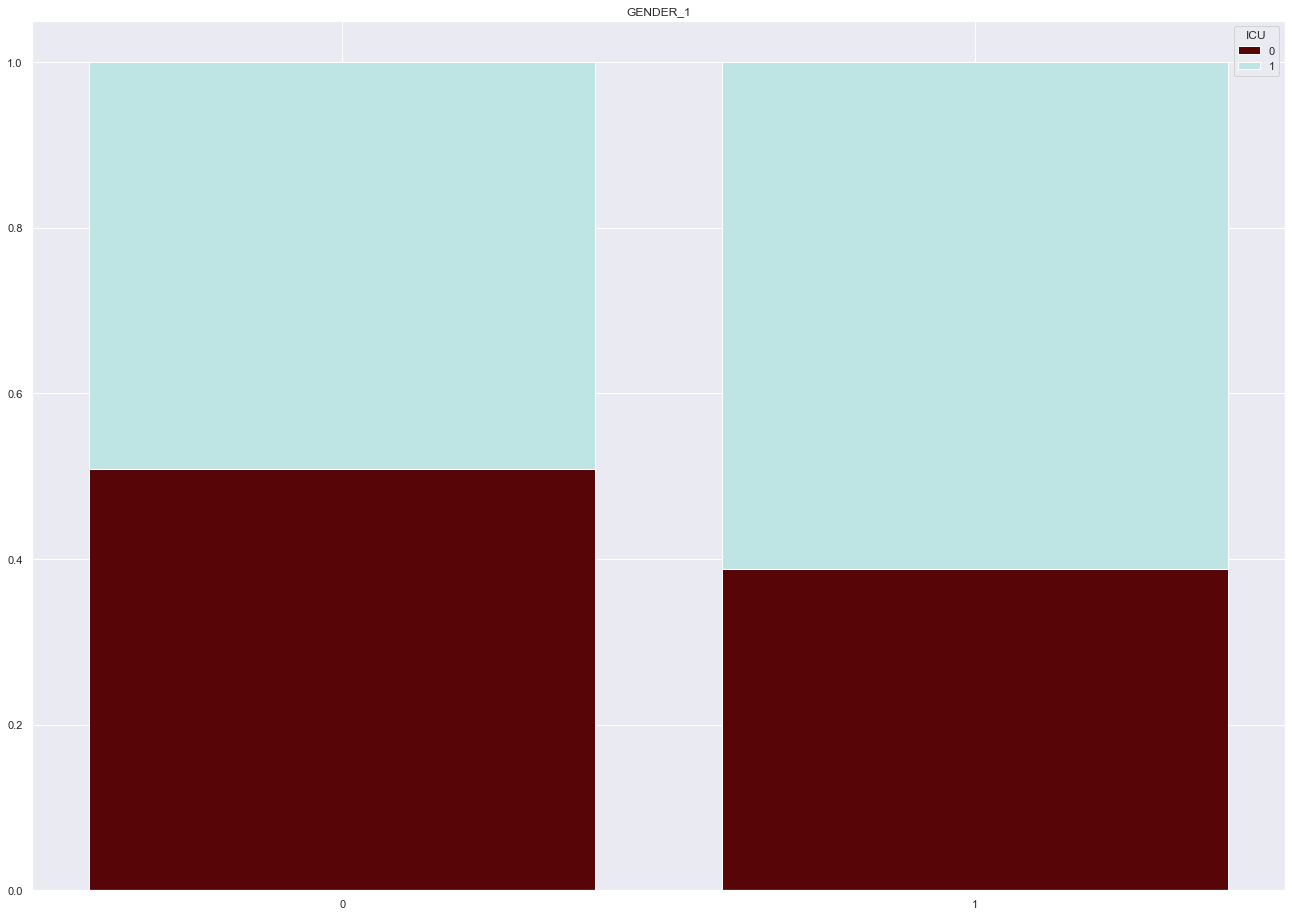

In [ ]:
#GENDER
normalized_stacked_bars(df_new, 'GENDER_1', 'ICU')

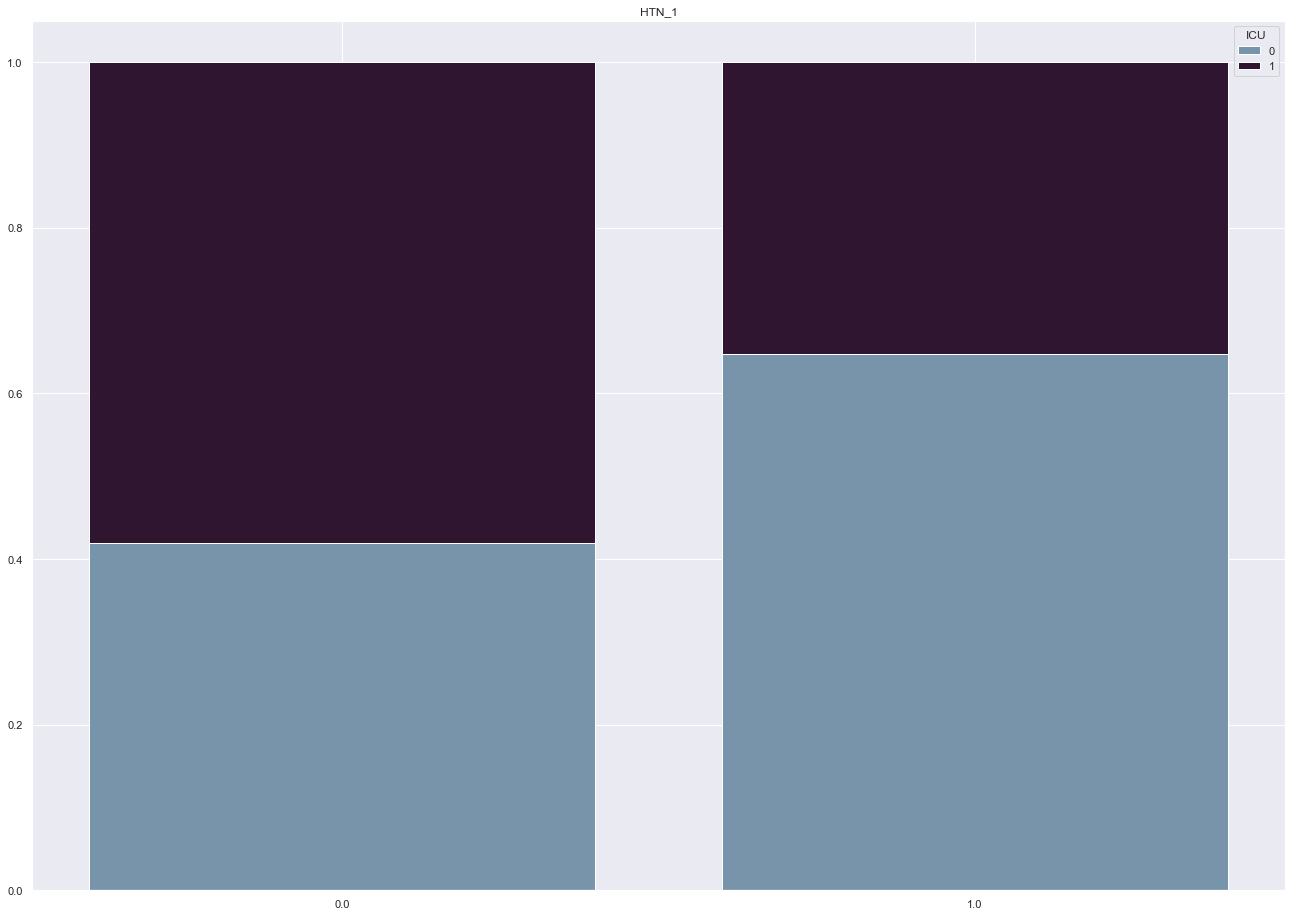

In [ ]:
#HTN
normalized_stacked_bars(df_new, 'HTN_1', 'ICU')


For AGE_ABOVE65, GENDER and HTN we see there is clearly some relationship between the features and the target. For AGE_PERCENTIL, we can see an indication of strong correlation.

##### C.2.2.2 Time-Variant Features

In [ ]:
#Identifying time variant features and groups of features
patient_constant_cols = [x + '_1' for x in patient_constant_cols]

time_variant_cols = [x for x in df_new.columns.values if x not in patient_constant_cols]
time_variant_cols.remove('PATIENT_VISIT_IDENTIFIER_1')
time_variant_cols.remove('ICU')

time_variant_groups = np.unique([x[:-2] for x in time_variant_cols])
print(time_variant_groups)

['BLOODPRESSURE_DIASTOLIC_DIFF' 'BLOODPRESSURE_DIASTOLIC_DIFF_REL'
 'BLOODPRESSURE_DIASTOLIC_MAX' 'BLOODPRESSURE_DIASTOLIC_MEAN'
 'BLOODPRESSURE_DIASTOLIC_MEDIAN' 'BLOODPRESSURE_DIASTOLIC_MIN'
 'BLOODPRESSURE_SISTOLIC_DIFF' 'BLOODPRESSURE_SISTOLIC_DIFF_REL'
 'BLOODPRESSURE_SISTOLIC_MAX' 'BLOODPRESSURE_SISTOLIC_MEAN'
 'BLOODPRESSURE_SISTOLIC_MEDIAN' 'BLOODPRESSURE_SISTOLIC_MIN'
 'DISEASE GROUPING 1' 'DISEASE GROUPING 2' 'DISEASE GROUPING 3'
 'DISEASE GROUPING 4' 'DISEASE GROUPING 5' 'DISEASE GROUPING 6'
 'HEART_RATE_DIFF' 'HEART_RATE_DIFF_REL' 'HEART_RATE_MAX'
 'HEART_RATE_MEAN' 'HEART_RATE_MEDIAN' 'HEART_RATE_MIN'
 'IMMUNOCOMPROMISED' 'OTHER' 'OXYGEN_SATURATION_DIFF'
 'OXYGEN_SATURATION_DIFF_REL' 'OXYGEN_SATURATION_MAX'
 'OXYGEN_SATURATION_MEAN' 'OXYGEN_SATURATION_MEDIAN'
 'OXYGEN_SATURATION_MIN' 'RESPIRATORY_RATE_DIFF'
 'RESPIRATORY_RATE_DIFF_REL' 'RESPIRATORY_RATE_MAX'
 'RESPIRATORY_RATE_MEAN' 'RESPIRATORY_RATE_MEDIAN' 'RESPIRATORY_RATE_MIN'
 'TEMPERATURE_DIFF' 'TEMPERATURE_DIFF_REL'

In [ ]:
#Identify the largers clusters
not_cluster_friendly = ['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 
                        'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 
                        'IMMUNOCOMPROMISED', 'OTHER']

clusters = np.unique([x.split('_')[-1] for x in time_variant_groups if x not in not_cluster_friendly])
print(clusters)

['DIFF' 'MAX' 'MEAN' 'MEDIAN' 'MIN' 'REL']


In [ ]:
#Define function to compile all values from a feature group
def extract_values_from_group(data, group_name):
    group_cols = [x for x in data.columns.values if x[:-2] == group_name]
    return data[group_cols].values.reshape(-1)

In [ ]:
#Define function to plot all feature groups from a cluster
def plot_by_cluster(data, col_groups, cluster_name):
    #Identify groups to be ploted
    groups = [x for x in col_groups if x[-len(cluster_name):] == cluster_name]
    
    #Compute dimensions for subplots
    ncols = 2
    nrows = int(len(groups) / 2) if len(groups) % 2 == 0 else np.floor(len(groups) / 2) + 1

    #Plot groups
    fig, axis = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15, 3*nrows))
    for i, group in enumerate(groups):
        row = int(i / 2)
        col = 0 if i%2 == 0 else 1
        if data[group + '_1'].dtype == np.int64:
            sns.countplot(extract_values_from_group(data, group), ax = axis[row, col]).set_title(group)
        else:
            sns.distplot(extract_values_from_group(data, group), ax = axis[row, col]).set_title(group)
    
    fig.tight_layout()
    return plt.show() 

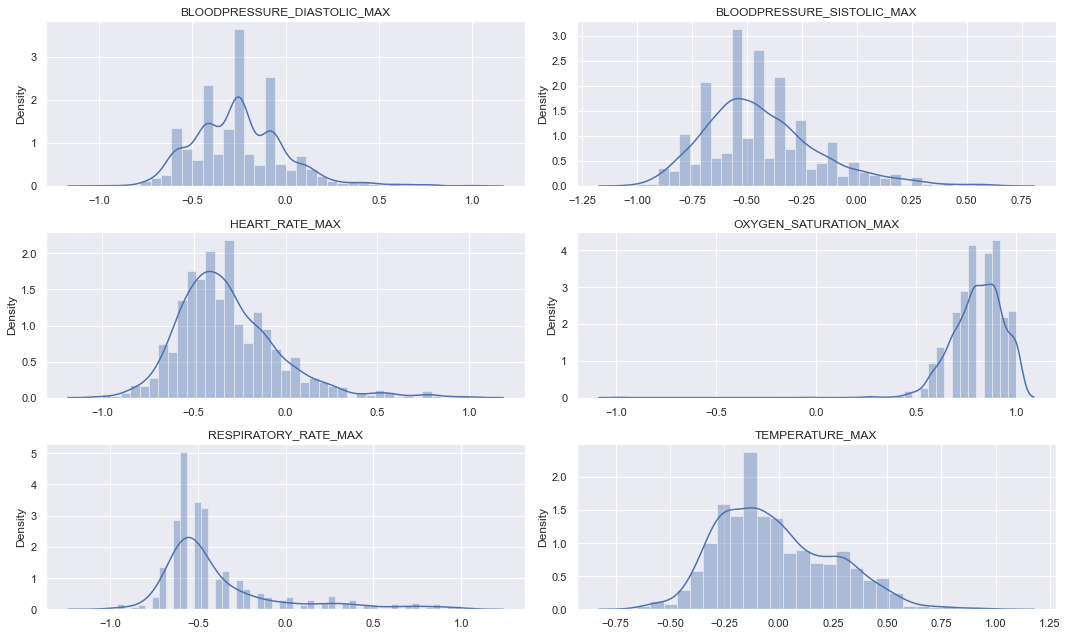

In [ ]:
# MAX
plot_by_cluster(df_new, time_variant_groups, 'MAX')

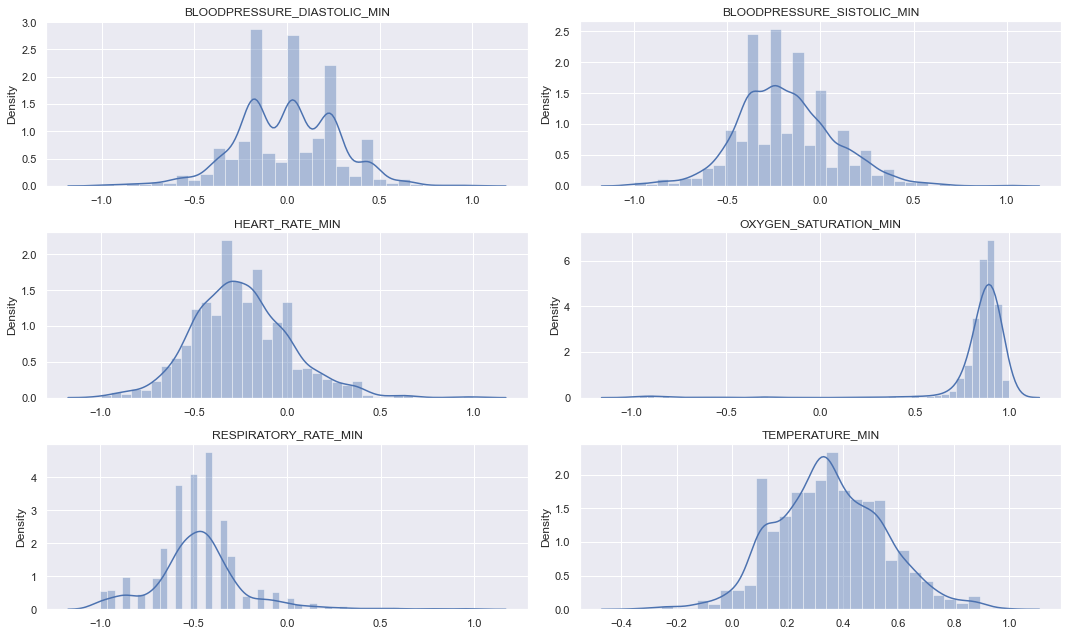

In [ ]:
# MIN
plot_by_cluster(df_new, time_variant_groups, 'MIN')

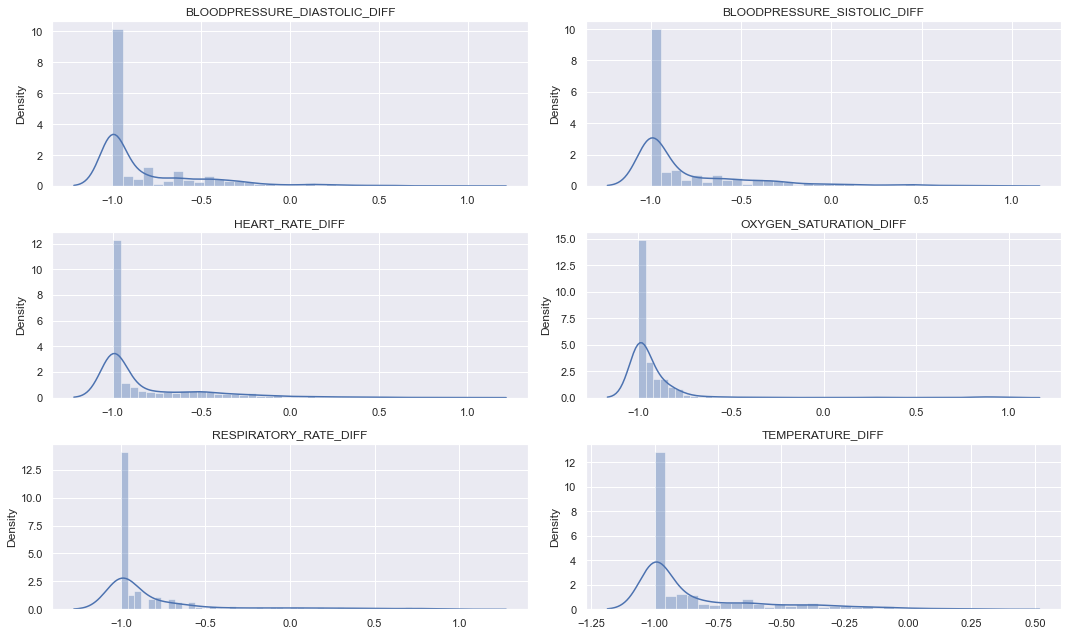

In [ ]:
# DIFF
plot_by_cluster(df_new, time_variant_groups, 'DIFF')


##### C.2.2.3 Remaning Features

In [ ]:
#Define function to show grafically the correlation between ICU admission and feature change over time
def feature_target_plot(data, group, target):
    group_cols = [x for x in data.columns if x[:len(group)] == group]
    summarized_data = data.groupby(
        by='PATIENT_VISIT_IDENTIFIER_1').max()[group_cols]
    data_change = summarized_data.max(axis=1) - summarized_data.min(axis=1)

    change_rows = data_change[data_change != 0].index
    no_change_rows = data_change[data_change == 0].index

    bot = [0, 0]
    for value in data[target].unique():
        y_vals = [len(data[data[target] == value].filter(change_rows, axis='index')) / len(change_rows),
                  len(data[data[target] == value].filter(no_change_rows, axis='index')) / len(no_change_rows)]
        x_vals = ['Change', 'No Change']

        plt.bar(x_vals, y_vals, bottom=bot, color=np.random.rand(1, 3))
        bot = [x + y for x, y in zip(bot, y_vals)]

    plt.legend(data[target].unique(), title=target)

    return plt.show()


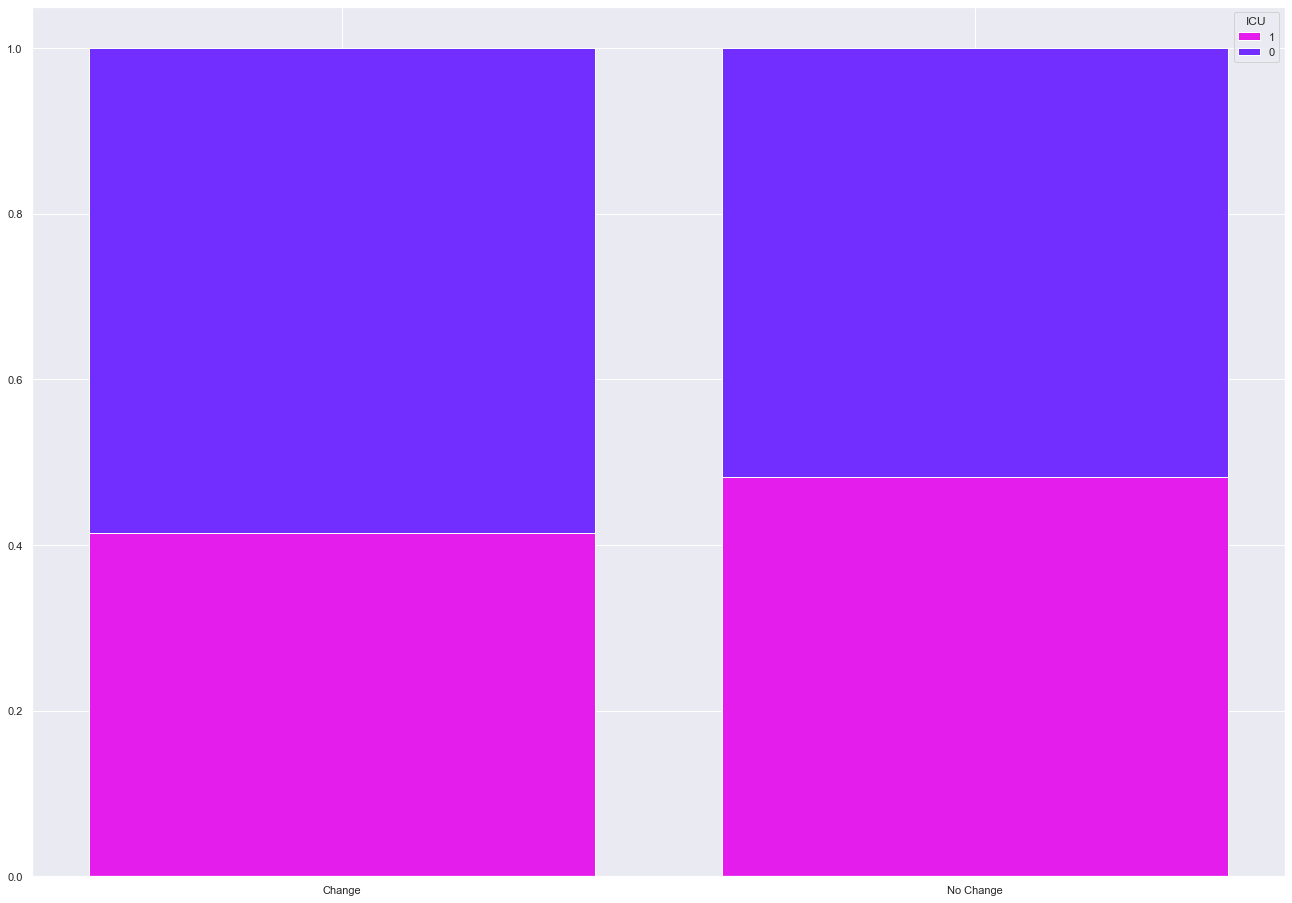

In [ ]:
#OTHER
feature_target_plot(df_new, 'OTHER', 'ICU')


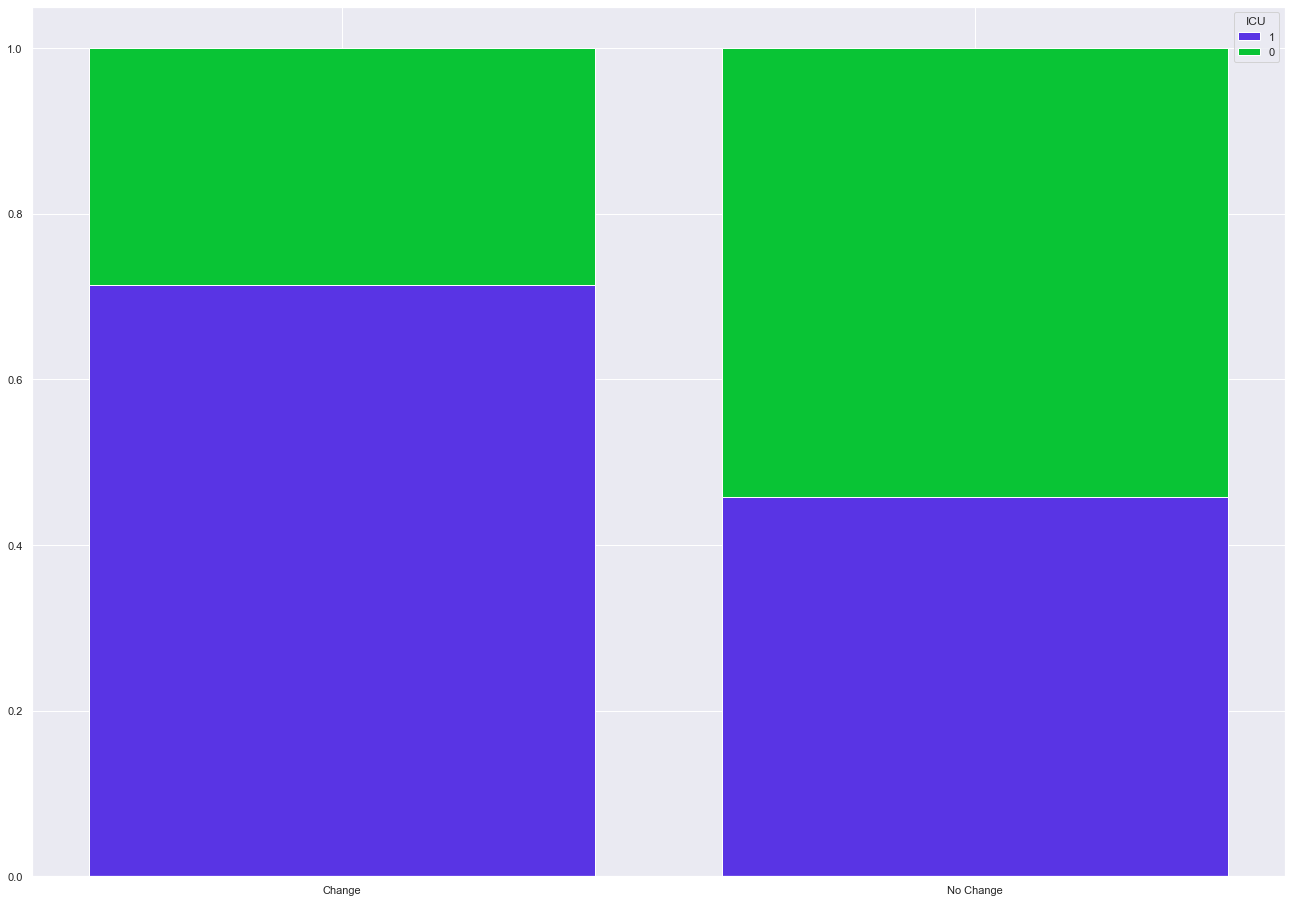

In [ ]:
#IMMUNOCOMPROMISED
feature_target_plot(df_new, 'IMMUNOCOMPROMISED', 'ICU')


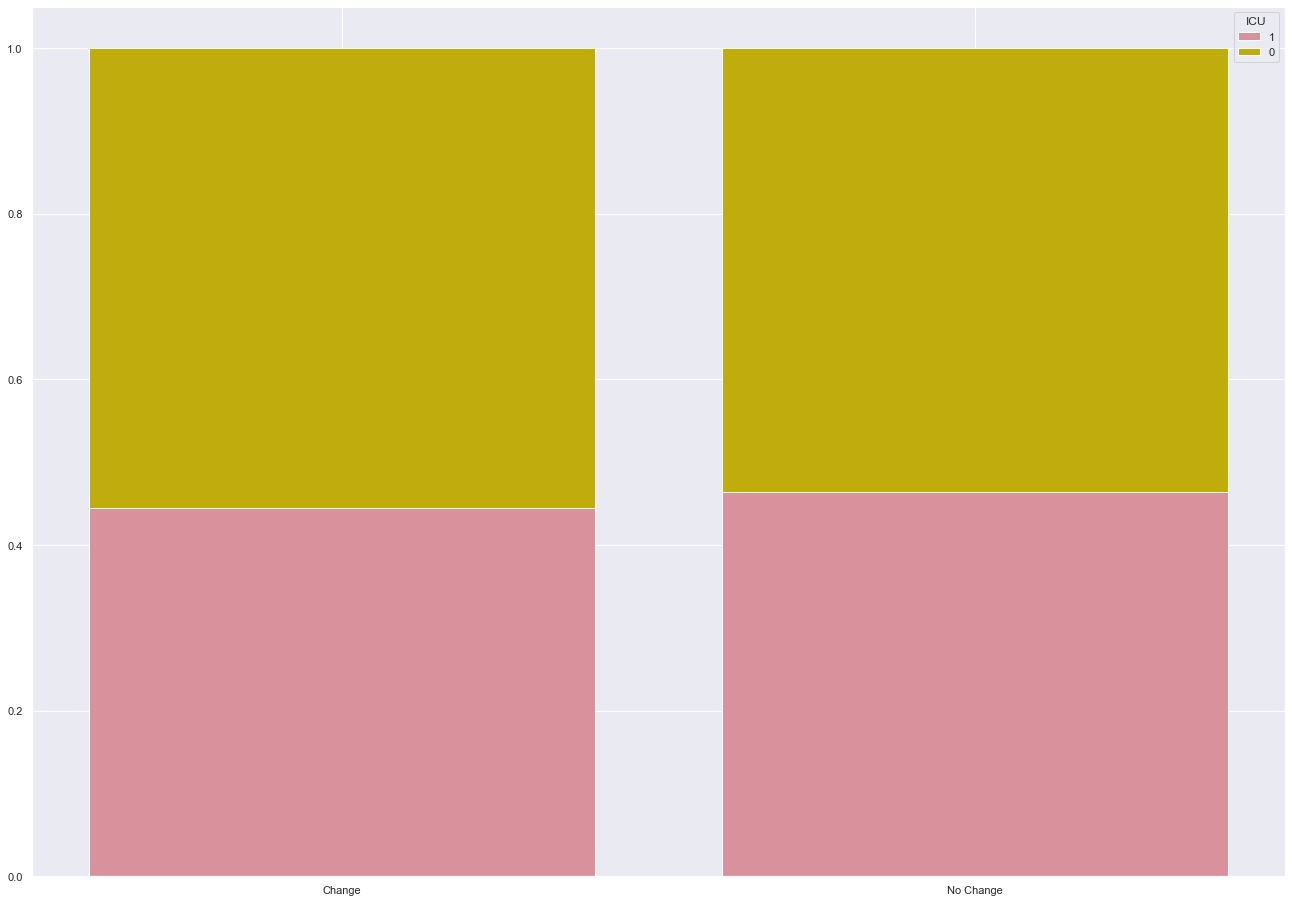

In [ ]:
#DISEASE GROUPING 1
feature_target_plot(df_new, 'DISEASE GROUPING 1', 'ICU')


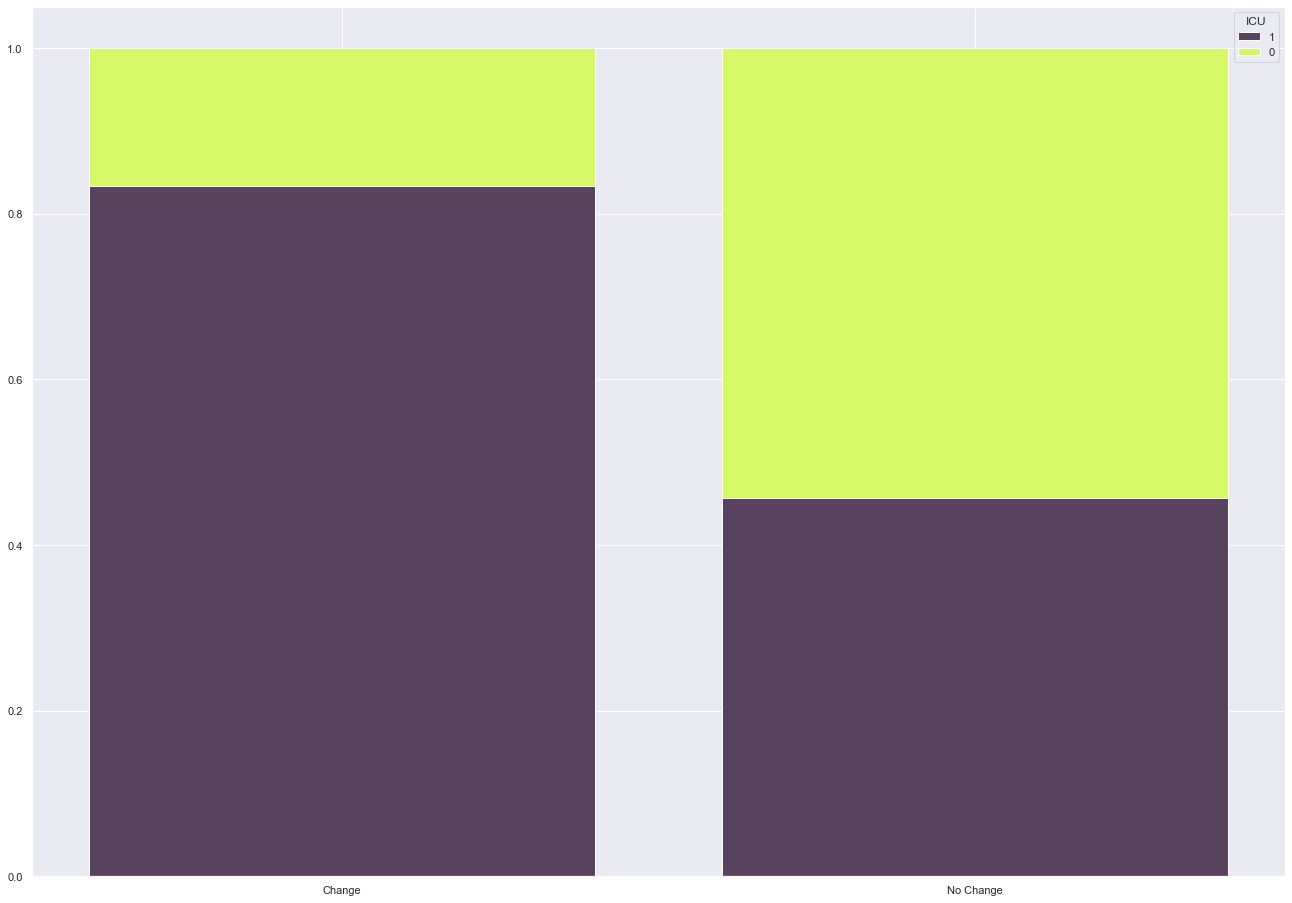

In [ ]:
#DISEASE GROUPING 2
feature_target_plot(df_new, 'DISEASE GROUPING 2', 'ICU')


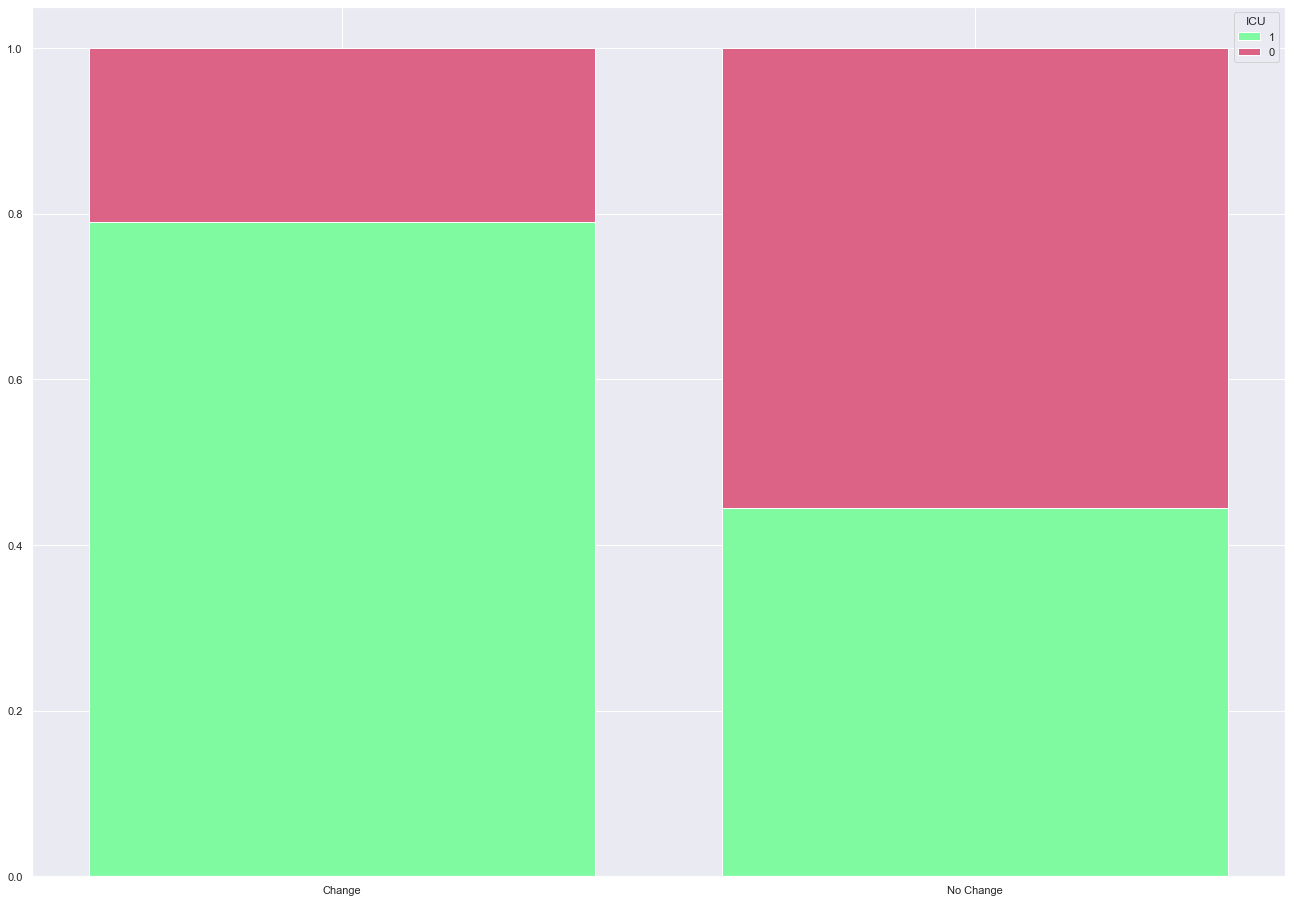

In [ ]:
#DISEASE GROUPING 3
feature_target_plot(df_new, 'DISEASE GROUPING 3', 'ICU')


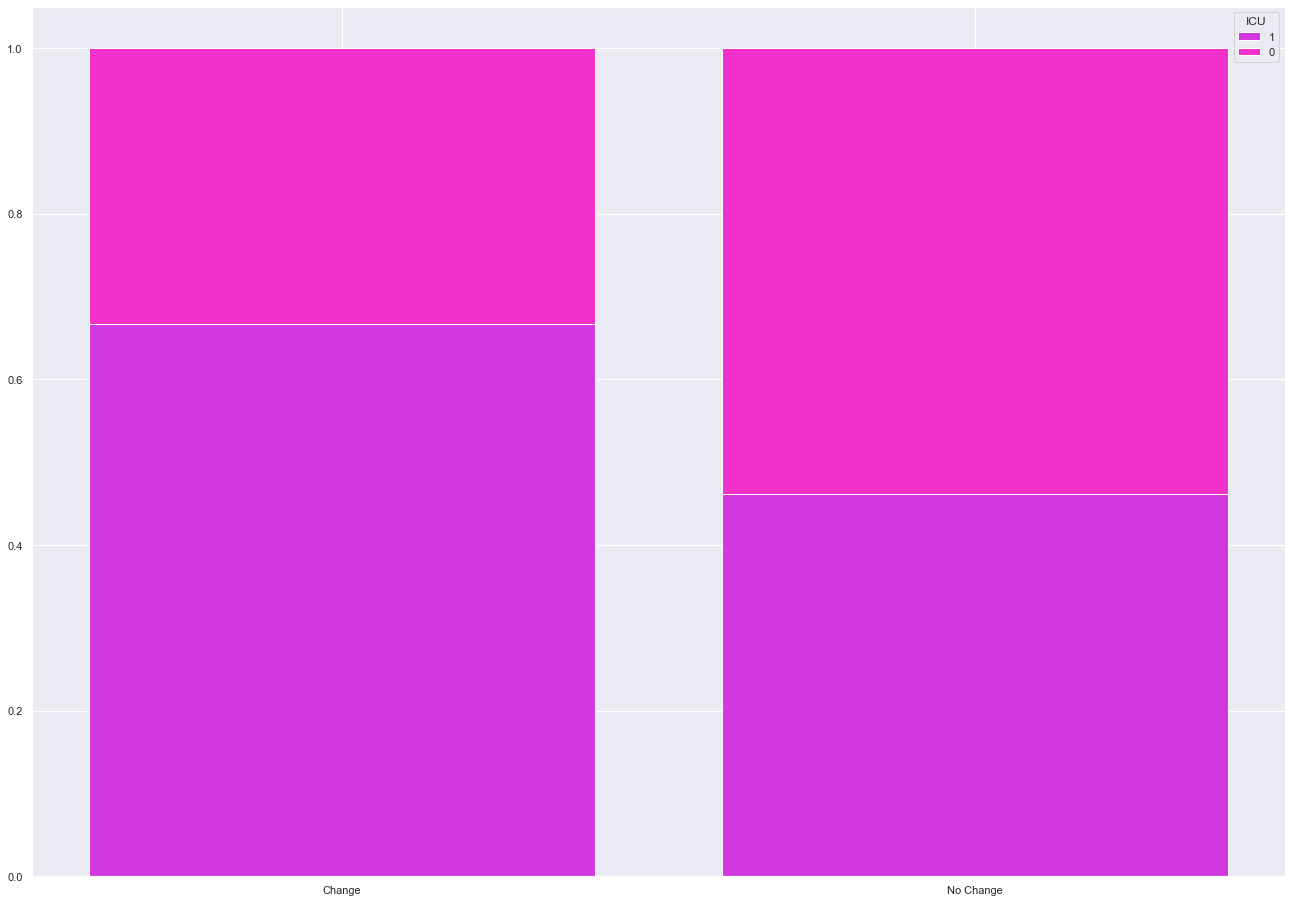

In [ ]:
#DISEASE GROUPING 4
feature_target_plot(df_new, 'DISEASE GROUPING 4', 'ICU')


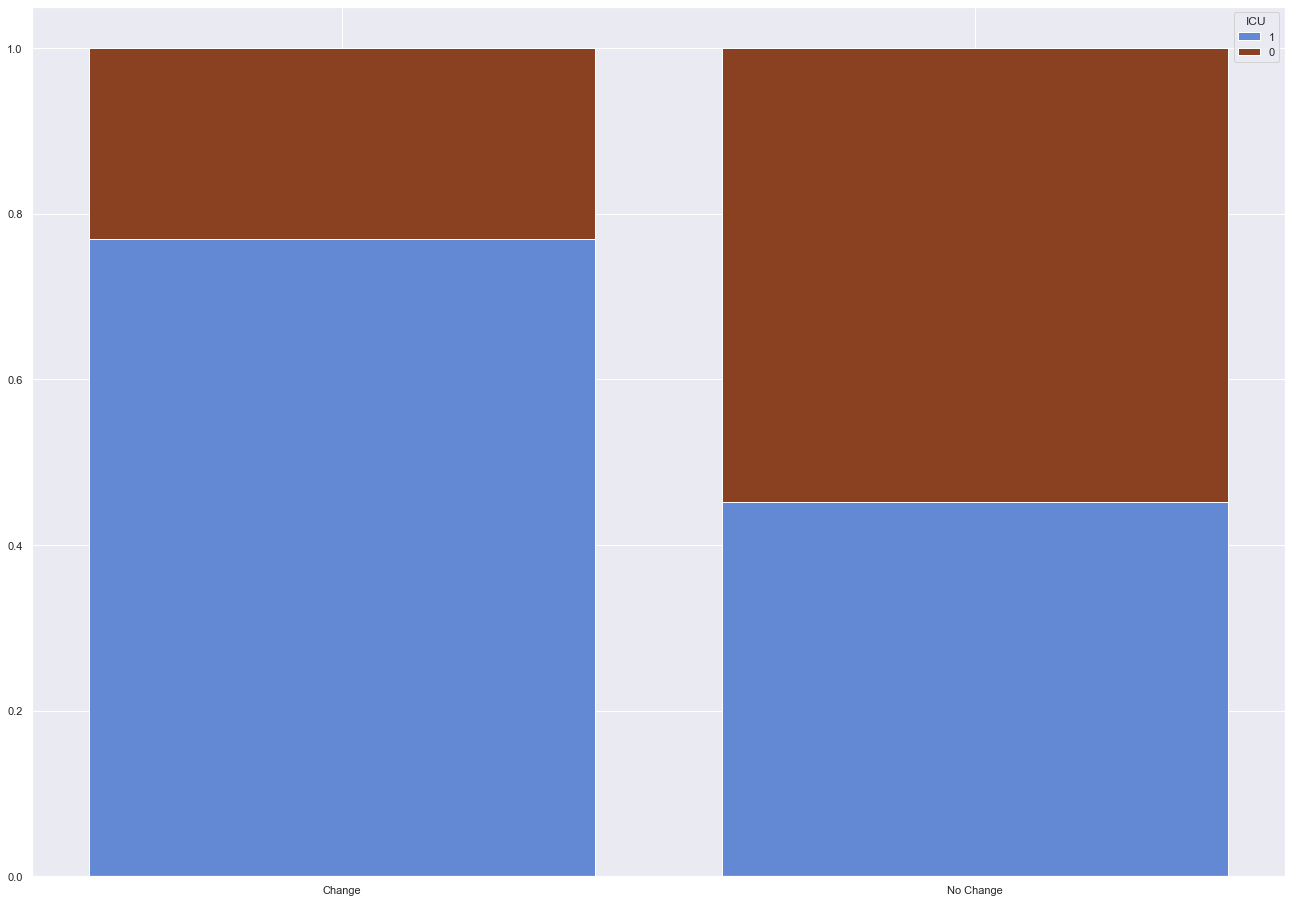

In [ ]:
#DISEASE GROUPING 5
feature_target_plot(df_new, 'DISEASE GROUPING 5', 'ICU')


Some very interesting facts arise from these simple plots. The two most revealing are:

* For the DESEASE GROUPING 1 through 4 features, whenever the value changes over time, the patient does not go to the ICU.
* The OTHER attribute, the one with the most change over time, presents a relevant change in ICU admission likelyhood.

The main conclusion here is we should not discard the time aspect for these features. Additionally we found out the the change over time for these attributes could be use as new attribute for our model.

## D. DATA MODELLING

### D.1  Data Modelling Between 0-2 Hours

#### D.1.1 Preprocessing Data

In [ ]:
#Remove all data take after window 1
model_1_cols = [x for x in df_new.columns if x[-1] not in [str(y) for y in range(2,6)]]
df_new_1 = df_new[model_1_cols]

df_new_1.head()

AGE_ABOVE65_1 AGE_PERCENTIL_1  GENDER_1  HTN_1  PATIENT_VISIT_IDENTIFIER_1  \
0              1            60th         0    0.0                           0   
2              0            10th         0    0.0                           2   
3              0            40th         1    0.0                           3   
4              0            10th         0    0.0                           4   
5              0            10th         0    0.0                           5   

   BLOODPRESSURE_DIASTOLIC_DIFF_1  BLOODPRESSURE_DIASTOLIC_DIFF_REL_1  \
0                       -1.000000                           -1.000000   
2                       -0.547826                           -0.515528   
3                       -1.000000                           -1.000000   
4                       -1.000000                           -1.000000   
5                       -0.826087                           -0.860870   

   BLOODPRESSURE_DIASTOLIC_MAX_1  BLOODPRESSURE_DIASTOLIC_MEAN_1  \
0                      -0.247863                        0.086420   
2                      -0.435897                       -0.489712   
3                      -0.299145                        0.012346   
4                      -0.076923                        0.333333   
5                      -0.247863                       -0.037037   

   BLOODPRESSURE_DIASTOLIC_MEDIAN_1  BLOODPRESSURE_DIASTOLIC_MIN_1  \
0                          0.086420                       0.237113   
2                         -0.506173                      -0.525773   
3                          0.012346                       0.175258   
4                          0.333333                       0.443299   
5                         -0.037037                       0.030928   

   BLOODPRESSURE_SISTOLIC_DIFF_1  BLOODPRESSURE_SISTOLIC_DIFF_REL_1  \
0                      -1.000000                          -1.000000   
2                      -0.533742                          -0.351328   
3                      -1.000000                          -1.000000   
4                      -0.877301                          -0.883669   
5                      -0.754601                          -0.714460   

   BLOODPRESSURE_SISTOLIC_MAX_1  BLOODPRESSURE_SISTOLIC_MEAN_1  \
0                     -0.459459                      -0.230769   
2                     -0.491892                      -0.685470   
3                     -0.556757                      -0.369231   
4                     -0.351351                      -0.153846   
5                     -0.567568                      -0.538462   

   BLOODPRESSURE_SISTOLIC_MEDIAN_1  BLOODPRESSURE_SISTOLIC_MIN_1  \
0                        -0.230769                        0.0000   
2                        -0.815385                       -0.5125   
3                        -0.369231                       -0.1125   
4                        -0.153846                        0.0000   
5                        -0.538462                       -0.3750   

   DISEASE GROUPING 1_1  DISEASE GROUPING 2_1  DISEASE GROUPING 3_1  \
0                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   
5                   0.0                   0.0                   0.0   

   DISEASE GROUPING 4_1  DISEASE GROUPING 5_1  DISEASE GROUPING 6_1  \
0                   0.0                   1.0                   1.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   
5                   0.0                   0.0                   0.0   

   HEART_RATE_DIFF_1  HEART_RATE_DIFF_REL_1  HEART_RATE_MAX_1  \
0          -1.000000              -1.000000         -0.432836   
2          -0.603053          

At this point, most data cleaning has already been performed. We have also looked at the features individually. Let's now focus on investigating the relationships between features and the target. First, we are going to look at how they correlate to each other.

#### D.1.2 Correlations

<Figure size 864x720 with 0 Axes>

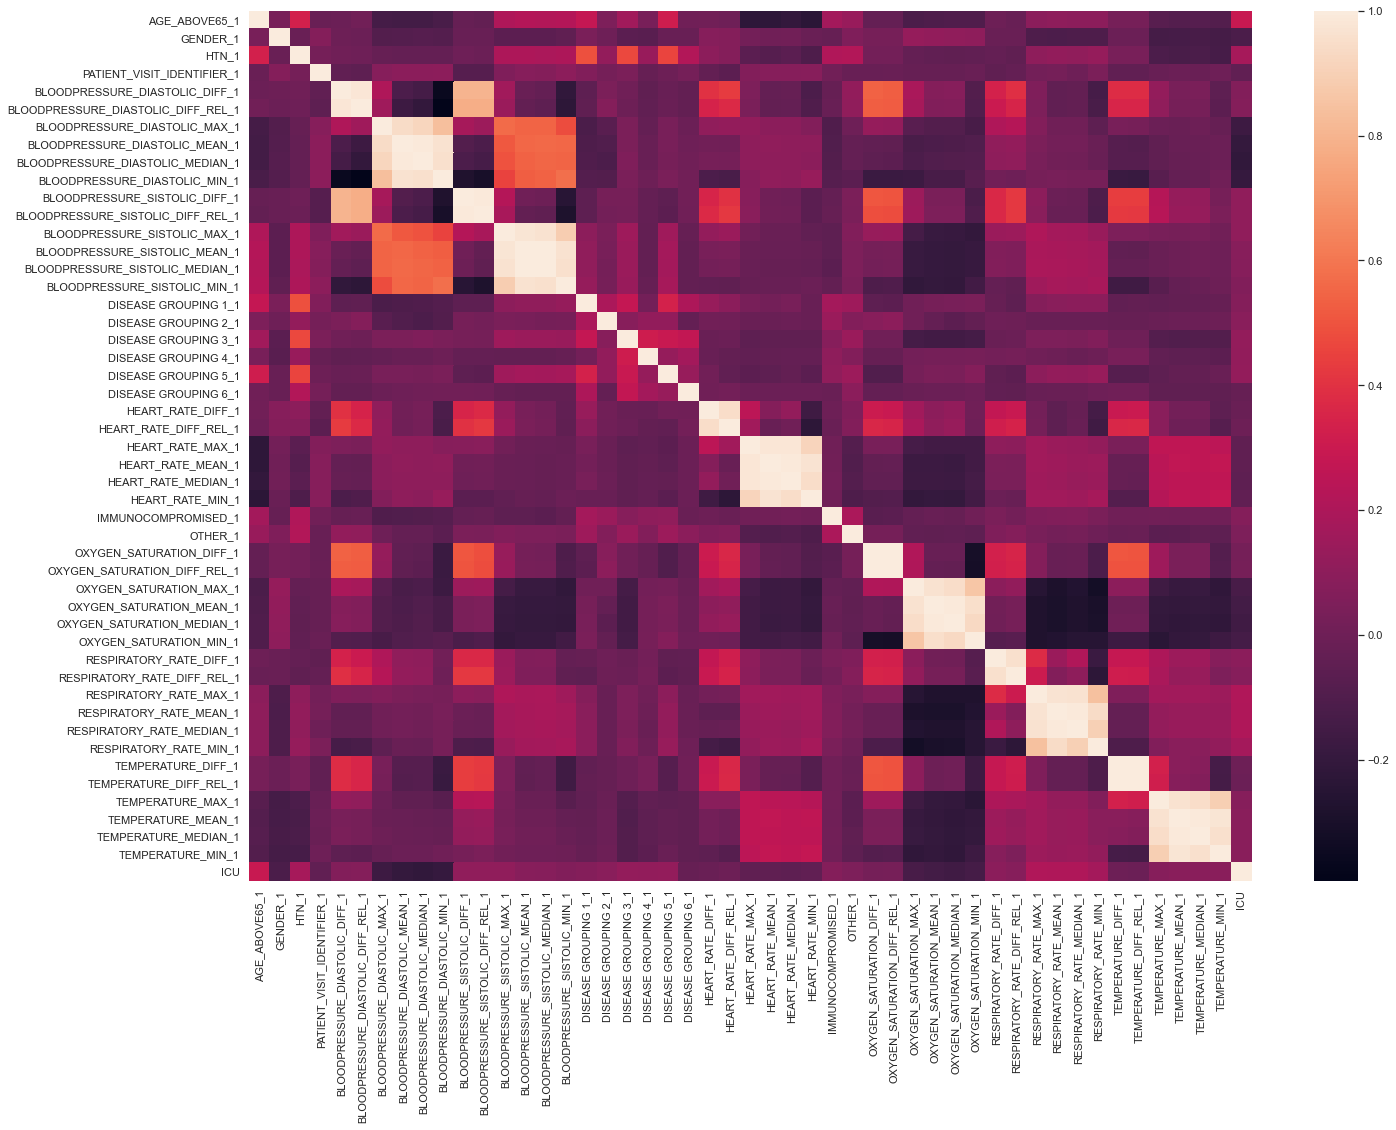

<Figure size 864x720 with 0 Axes>

In [ ]:
# Compute Pearson Correlation
df_new_1_corr = df_new_1.corr()

sns.heatmap(df_new_1_corr)
plt.figure(figsize = (12,10))

It is very easy to see this graphical approach is not very helpful for this amount of features. So let's split our analysis in two. First we are looking at how these features relate to each other, excluding the target column.

In [ ]:
stacked_df_new_1_corr = rank_correlation_score(df_new_1)
stacked_df_new_1_corr

Feature_1                        Feature_2  \
2101               TEMPERATURE_DIFF_1           TEMPERATURE_DIFF_REL_1   
1501         OXYGEN_SATURATION_DIFF_1     OXYGEN_SATURATION_DIFF_REL_1   
651     BLOODPRESSURE_SISTOLIC_MEAN_1  BLOODPRESSURE_SISTOLIC_MEDIAN_1   
1251                HEART_RATE_MEAN_1              HEART_RATE_MEDIAN_1   
2251               TEMPERATURE_MEAN_1             TEMPERATURE_MEDIAN_1   
...                               ...                              ...   
733   BLOODPRESSURE_SISTOLIC_MEDIAN_1                TEMPERATURE_MIN_1   
924              DISEASE GROUPING 3_1               TEMPERATURE_DIFF_1   
516     BLOODPRESSURE_SISTOLIC_DIFF_1              HEART_RATE_MEDIAN_1   
194        PATIENT_VISIT_IDENTIFIER_1                TEMPERATURE_MIN_1   
1070             DISEASE GROUPING 6_1           RESPIRATORY_RATE_MIN_1   

      Pearson_Correlation  
2101             0.999444  
1501             0.998889  
651              0.996952  
1251             0.993374  
2251             0.993236  
...                   ...  
733              0.000809  
924              0.000746  
516              0.000576  
194              0.000536  
1070             0.000049  

[1128 rows x 3 columns]

As we can see, some feature present quite the correlation coefficient. Let's take a closer look at the ones in which the Pearson_Corr is larger than 0.99.

In [ ]:
#Filter very strong correlations
stacked_df_new_1_corr[stacked_df_new_1_corr['Pearson_Correlation'] > 0.99]

Feature_1                          Feature_2  \
2101              TEMPERATURE_DIFF_1             TEMPERATURE_DIFF_REL_1   
1501        OXYGEN_SATURATION_DIFF_1       OXYGEN_SATURATION_DIFF_REL_1   
651    BLOODPRESSURE_SISTOLIC_MEAN_1    BLOODPRESSURE_SISTOLIC_MEDIAN_1   
1251               HEART_RATE_MEAN_1                HEART_RATE_MEDIAN_1   
2251              TEMPERATURE_MEAN_1               TEMPERATURE_MEDIAN_1   
351   BLOODPRESSURE_DIASTOLIC_MEAN_1   BLOODPRESSURE_DIASTOLIC_MEDIAN_1   
1651        OXYGEN_SATURATION_MEAN_1         OXYGEN_SATURATION_MEDIAN_1   
501    BLOODPRESSURE_SISTOLIC_DIFF_1  BLOODPRESSURE_SISTOLIC_DIFF_REL_1   

      Pearson_Correlation  
2101             0.999444  
1501             0.998889  
651              0.996952  
1251             0.993374  
2251             0.993236  
351              0.992260  
1651             0.990731  
501              0.990595

In [ ]:
#Investigate MEAN/MEDIAN correlations
stacked_df_new_1_corr['MEASURE_FEATURE_1'] = [x.split('_')[0] for x in stacked_df_new_1_corr['Feature_1']]
stacked_df_new_1_corr['MEASURE_FEATURE_2'] = [x.split('_')[0] for x in stacked_df_new_1_corr['Feature_2']]
stacked_df_new_1_corr['TYPE_FEATURE_1'] = [x.split('_')[-2] for x in stacked_df_new_1_corr['Feature_1']]
stacked_df_new_1_corr['TYPE_FEATURE_2'] = [x.split('_')[-2] for x in stacked_df_new_1_corr['Feature_2']]

mean_median_corr = stacked_df_new_1_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
mean_median_corr = mean_median_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_1'].isin(['MEDIAN', 'MEAN'])]
mean_median_corr = mean_median_corr[mean_median_corr['TYPE_FEATURE_2'].isin(['MEDIAN', 'MEAN'])]

relevant_cols = ['Feature_1', 'Feature_2', 'Pearson_Correlation']
mean_median_corr[relevant_cols]

Feature_1                         Feature_2  \
651      BLOODPRESSURE_SISTOLIC_MEAN_1   BLOODPRESSURE_SISTOLIC_MEDIAN_1   
1251                 HEART_RATE_MEAN_1               HEART_RATE_MEDIAN_1   
2251                TEMPERATURE_MEAN_1              TEMPERATURE_MEDIAN_1   
351     BLOODPRESSURE_DIASTOLIC_MEAN_1  BLOODPRESSURE_DIASTOLIC_MEDIAN_1   
1651          OXYGEN_SATURATION_MEAN_1        OXYGEN_SATURATION_MEDIAN_1   
1951           RESPIRATORY_RATE_MEAN_1         RESPIRATORY_RATE_MEDIAN_1   
357     BLOODPRESSURE_DIASTOLIC_MEAN_1   BLOODPRESSURE_SISTOLIC_MEDIAN_1   
405   BLOODPRESSURE_DIASTOLIC_MEDIAN_1     BLOODPRESSURE_SISTOLIC_MEAN_1   

      Pearson_Correlation  
651              0.996952  
1251             0.993374  
2251             0.993236  
351              0.992260  
1651             0.990731  
1951             0.989124  
357              0.560540  
405              0.539823

Well, the table shows there are no exceptions to our previous assertion. Still, there are two smaller correlations values above. If you look closer, however, Feature_1 and Feature_2 are not part of the same measurement. They probably just slipped through our filters and don't matter for this specific step.

In the end, this means we do not need both MEAN and MEDIAN features for a given measurement type. So, we are going to stick with the MEAN attributes for now.

In [ ]:
#List columns to be removed
cols_to_remove = ["BLOODPRESSURE_SISTOLIC_MEDIAN_1","HEART_RATE_MEDIAN_1","TEMPERATURE_MEDIAN_1",
                  "BLOODPRESSURE_DIASTOLIC_MEDIAN_1","OXYGEN_SATURATION_MEDIAN_1",
                  "RESPIRATORY_RATE_MEDIAN_1"]

In [ ]:
#Investigate DIFF/DIFF_REL correlations
diff_corr = stacked_df_new_1_corr.query('MEASURE_FEATURE_1 == MEASURE_FEATURE_2')
diff_corr = diff_corr.query('TYPE_FEATURE_1 != TYPE_FEATURE_2')
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_1'].isin(['DIFF', 'REL'])]
diff_corr = diff_corr[diff_corr['TYPE_FEATURE_2'].isin(['DIFF', 'REL'])]

diff_corr[relevant_cols]

Feature_1                           Feature_2  \
2101                  TEMPERATURE_DIFF_1              TEMPERATURE_DIFF_REL_1   
1501            OXYGEN_SATURATION_DIFF_1        OXYGEN_SATURATION_DIFF_REL_1   
501        BLOODPRESSURE_SISTOLIC_DIFF_1   BLOODPRESSURE_SISTOLIC_DIFF_REL_1   
201       BLOODPRESSURE_DIASTOLIC_DIFF_1  BLOODPRESSURE_DIASTOLIC_DIFF_REL_1   
1801             RESPIRATORY_RATE_DIFF_1         RESPIRATORY_RATE_DIFF_REL_1   
1101                   HEART_RATE_DIFF_1               HEART_RATE_DIFF_REL_1   
207       BLOODPRESSURE_DIASTOLIC_DIFF_1   BLOODPRESSURE_SISTOLIC_DIFF_REL_1   
255   BLOODPRESSURE_DIASTOLIC_DIFF_REL_1       BLOODPRESSURE_SISTOLIC_DIFF_1   

      Pearson_Correlation  
2101             0.999444  
1501             0.998889  
501              0.990595  
201              0.978508  
1801             0.961739  
1101             0.949914  
207              0.799433  
255              0.777548

In [ ]:
#Add columns to the remove list
cols_to_remove.extend(["TEMPERATURE_DIFF_REL_1","OXYGEN_SATURATION_DIFF_REL_1",
                       "BLOODPRESSURE_SISTOLIC_DIFF_REL_1","BLOODPRESSURE_DIASTOLIC_DIFF_REL_1",
                       "RESPIRATORY_RATE_DIFF_REL_1","HEART_RATE_DIFF_REL_1"])

In [ ]:
# Sort valued correlations valued to the target
df_new_1 = df_new_1.drop(columns = cols_to_remove)
df_new_1_target_corr = abs(df_new_1.corr())["ICU"]

df_new_1_target_corr[df_new_1_target_corr < 1].sort_values(ascending = False)

AGE_ABOVE65_1                     0.291010
RESPIRATORY_RATE_MAX_1            0.213938
RESPIRATORY_RATE_MEAN_1           0.207911
BLOODPRESSURE_DIASTOLIC_MEAN_1    0.201210
BLOODPRESSURE_DIASTOLIC_MIN_1     0.195703
HTN_1                             0.180555
RESPIRATORY_RATE_MIN_1            0.173043
BLOODPRESSURE_DIASTOLIC_MAX_1     0.166832
OXYGEN_SATURATION_MEAN_1          0.147612
OXYGEN_SATURATION_MIN_1           0.139034
OXYGEN_SATURATION_MAX_1           0.131615
DISEASE GROUPING 3_1              0.122514
DISEASE GROUPING 5_1              0.122200
GENDER_1                          0.117938
DISEASE GROUPING 4_1              0.112573
BLOODPRESSURE_SISTOLIC_MAX_1      0.109073
BLOODPRESSURE_SISTOLIC_DIFF_1     0.107106
RESPIRATORY_RATE_DIFF_1           0.093877
DISEASE GROUPING 2_1              0.087753
TEMPERATURE_MEAN_1                0.086764
TEMPERATURE_MIN_1                 0.086575
BLOODPRESSURE_SISTOLIC_MEAN_1     0.084371
TEMPERATURE_MAX_1                 0.079548
DISEASE GRO

#### D.1.3 Feature Encoding

In [ ]:
#Define function to encode features
def encode_feature(data, col):
    new_cols = pd.get_dummies(data[col], prefix = col, prefix_sep = ':', drop_first = True)
    return pd.concat([data.drop(columns = col), new_cols], axis = 1)

In [ ]:
#Encode AGE_PERCENTIL_1
df_new_1 = encode_feature(df_new_1, 'AGE_PERCENTIL_1')

#### D.1.4 Data Modelling

In [ ]:
# Split data into train/test and valdiation
np.random.seed(10)

feature_cols = df_new_1.drop(columns = ["ICU","PATIENT_VISIT_IDENTIFIER_1"]).columns.values

X = df_new_1[feature_cols]
y = df_new_1["ICU"]

X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size = 0.3)


In [ ]:
#Define function to test algorithm
def score_model(estimator, train_data, validation_data, cv):
    #Unpack data
    X_train, y_train = train_data
    X_validation, y_validation = validation_data
    estimate = estimator
    #Perfomed cross-validation on train data
    model_cv = cross_validate(estimator = estimator, X = X_train, y = y_train,
                              scoring = ['accuracy', 'roc_auc'],
                              cv = cv)
   
   # Generate a no skill prediction (majority class)
    no_skill_probs = [0 for _ in range(len(y_validation))]

    #Apply model to validation data
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_validation)

    # predict probabilities
    estimator_probs = estimator.predict_proba(X_validation)

    # keep probabilities for the positive outcome only
    estimator_probs = estimator_probs[:,1]

    # calculate scores
    no_skill_auc = roc_auc_score(y_validation, no_skill_probs)
    estimator_auc = roc_auc_score(y_validation, estimator_probs)

    #Print results
    print('CV model accuracy:  %{:.2f} +/- %{:.2f}'.format(model_cv['test_accuracy'].mean()*100, model_cv['test_accuracy'].std()*100))
    print('CV model roc_auc:  %{:.2f} +/- %{:.2f}'.format(model_cv['test_roc_auc'].mean()*100, model_cv['test_roc_auc'].std()*100))
    print('Validation accuracy score: %{:.2f}'.format(accuracy_score(y_validation, y_pred)*100))
    print('Validation ROC_AUC score: %{:.2f}'.format(roc_auc_score(y_validation, y_pred)*100))

    print("--------")
    
    # summarize scores
    print('No Skill: ROC AUC=%{:.3f}'.format((no_skill_auc)*100))
    print('{}: ROC AUC=%{:.3f}'.format(estimator , (estimator_auc)*100))

    # calculate roc curves
    no_skill_fpr, no_skill_tpr, _ = roc_curve(y_validation, no_skill_probs)
    estimator_fpr, estimator_tpr, _ = roc_curve(y_validation, estimator_probs)

    # plot the roc curve for the model
    plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
    plt.plot(estimator_fpr, estimator_tpr, marker='.', label=estimator)

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    # show the legend
    plt.legend()

    # show the plot
    plt.show()
    
    return estimator, estimator_auc

##### D.1.4.1 KNN Modelling

CV model accuracy:  %63.35 +/- %9.03
CV model roc_auc:  %68.15 +/- %9.50
Validation accuracy score: %64.15
Validation ROC_AUC score: %63.39
--------
No Skill: ROC AUC=%50.000
KNeighborsClassifier(n_neighbors=10, weights='distance'): ROC AUC=%74.545


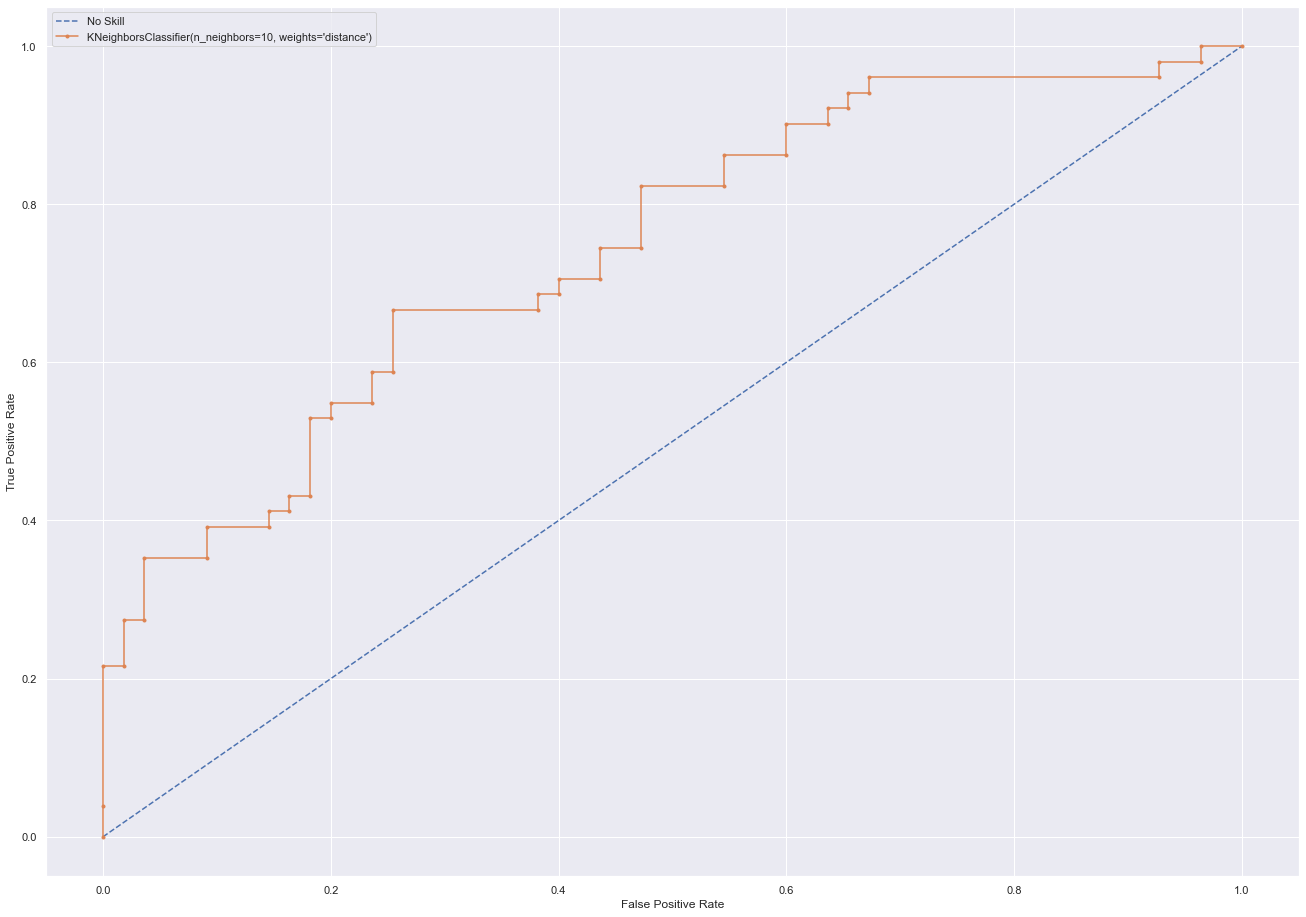

In [ ]:
#Test KNN model
baseline_model_1 = KNN(n_neighbors = 10, weights = 'distance')
fitted_baseline_model_1_1,estimator_auc_1_1 = score_model(estimator = baseline_model_1, 
                                      train_data = (X_train, y_train),
                                      validation_data = (X_validation, y_validation),
                                      cv = 10)

Simply, put the results are not impressive, specially, considering the frequency of true values in our target is around 46%. Before we make any important decision, however, let's see how another algorithm performs on this data.

##### D.1.3.2 Random Forest Classification Modelling

CV model accuracy:  %65.50 +/- %11.11
CV model roc_auc:  %69.78 +/- %11.51
Validation accuracy score: %70.75
Validation ROC_AUC score: %70.53
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%78.841


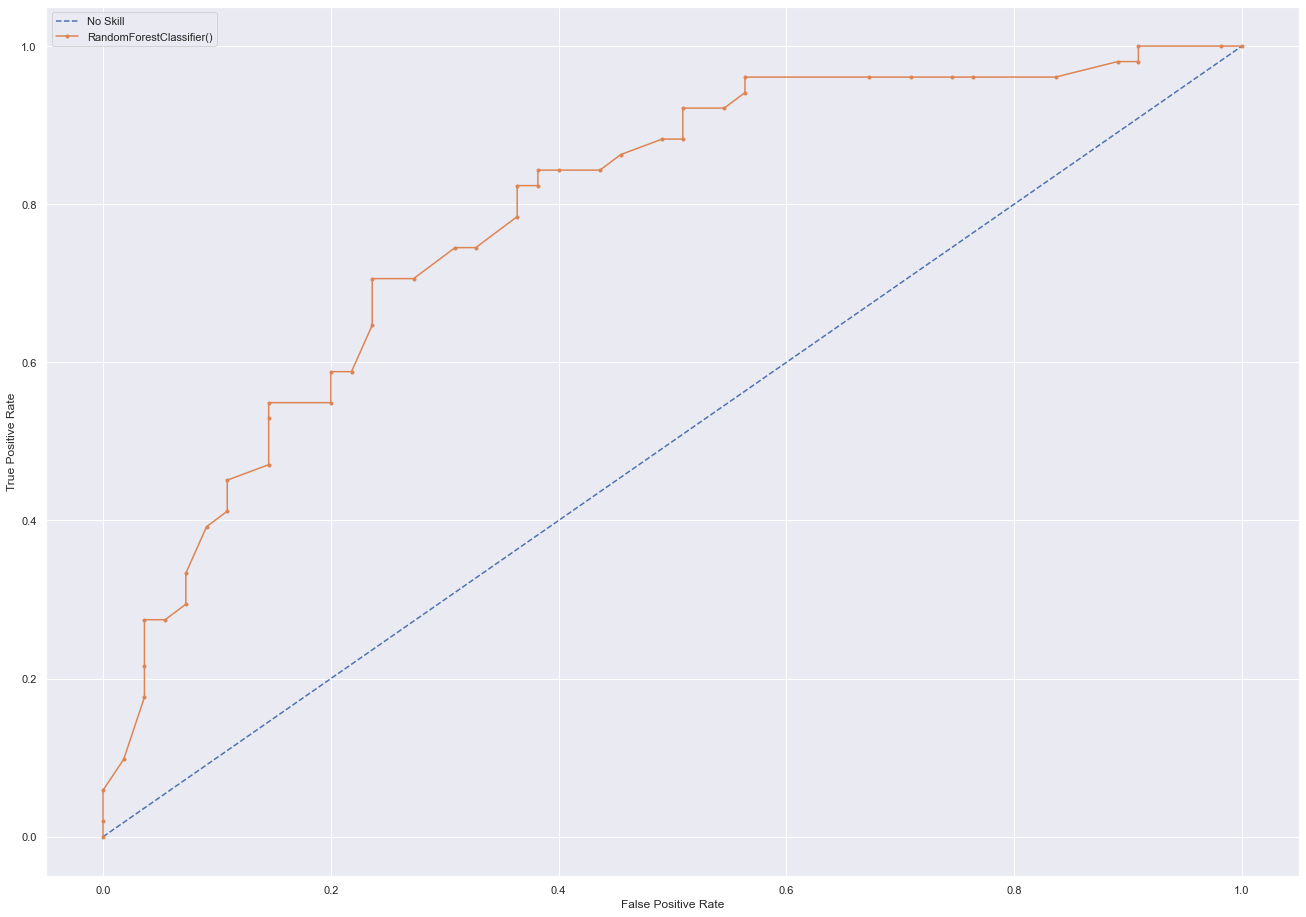

In [ ]:
#Test RandomForestClassifier model

baseline_model_2 = RandomForestClassifier()
fitted_baseline_model_1_2, estimator_auc_1_2 = score_model(estimator=baseline_model_2,
                                      train_data = (X_train, y_train),
                                      validation_data = (X_validation, y_validation),
                                      cv = 10)


The results are now much better than before. This is a relief, considering our first model was not much better than simply randomly selecting which patients would go to the ICU. From here, there are several paths we can take:

* Further investigate the dataset in order to remove or add features;
* Tune the algorithm hyperparameters to see if we can achieve some accuracy improvement;
* Discard this approach and proceed to a time-relevant model.

For now, the better course of action seems to be keep investigating our window-1 dataset. The first thing we can do is to look at the feature importances from the Random Forest model.

#### D.1.4 Feature Selection

<AxesSubplot:>

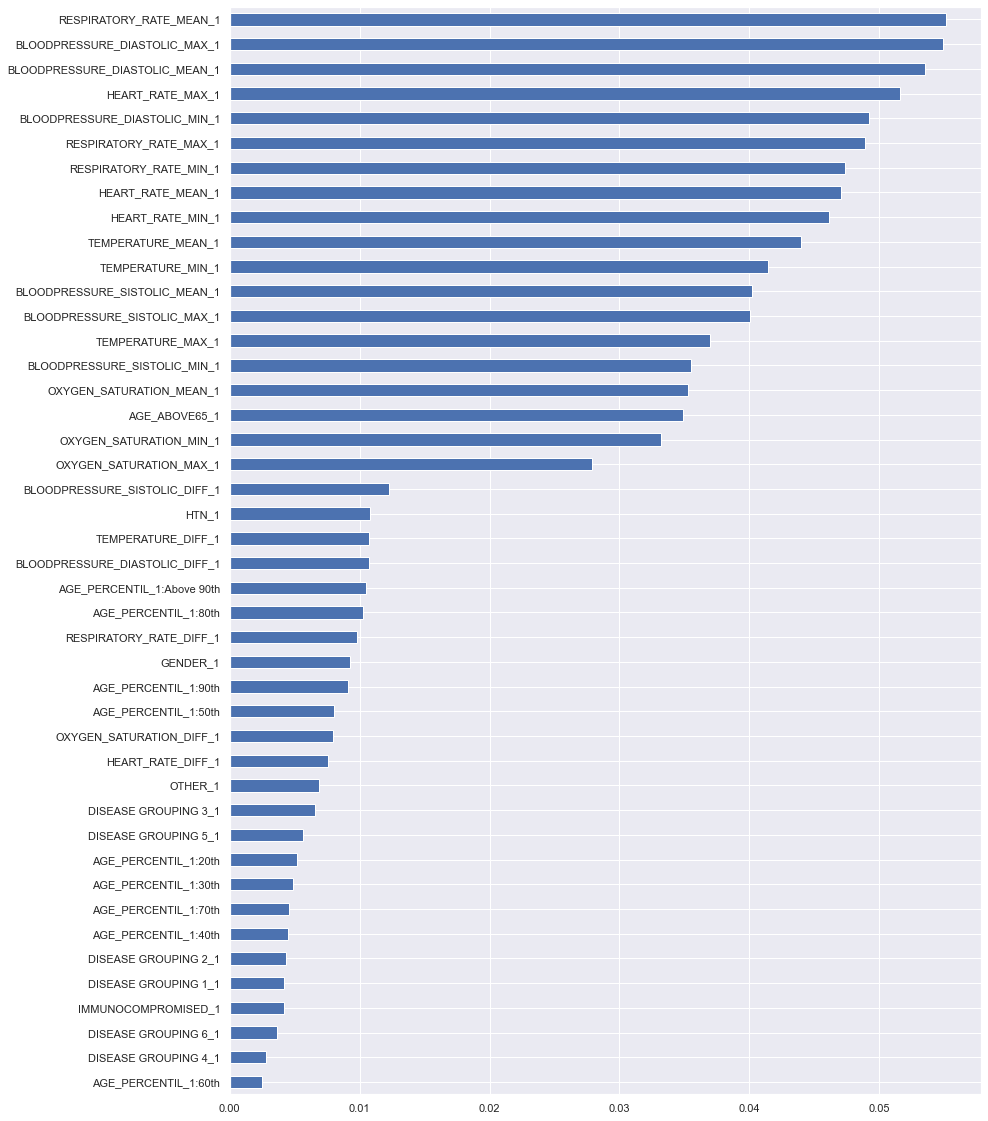

In [ ]:
# Plot feature importances for the Random Forest Model

feat_importances = pd.Series(data = fitted_baseline_model_1_2.feature_importances_,
                            index = feature_cols).sort_values()
feat_importances.plot(kind = "barh", figsize = (12,20))

The graph above leads to these observations: 
  1. **RESPIRATORY_MEAN_1** is by far the most important feature on the classification model. 
  2. **BLOODPRESSURE_DIALOSTIC_MEAN_1** is the third important feature on the classification model. 
  3. **HEART_RATE_MEAN_1** and **BLOODPRESSURE_SISTOLIC_MEAN_1** are the other important features.
  4. After **OXYGEN_SATURATION_MAX_1**, there is a significant dip on how important the attributes are for the algorithm.

One way of checking whether this assessment has any validity is to remove the least important feature from our dataset and see how the same the algorithm behaves

CV model accuracy:  %63.90 +/- %8.44
CV model roc_auc:  %68.52 +/- %10.33
Validation accuracy score: %69.81
Validation ROC_AUC score: %69.55
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%78.752


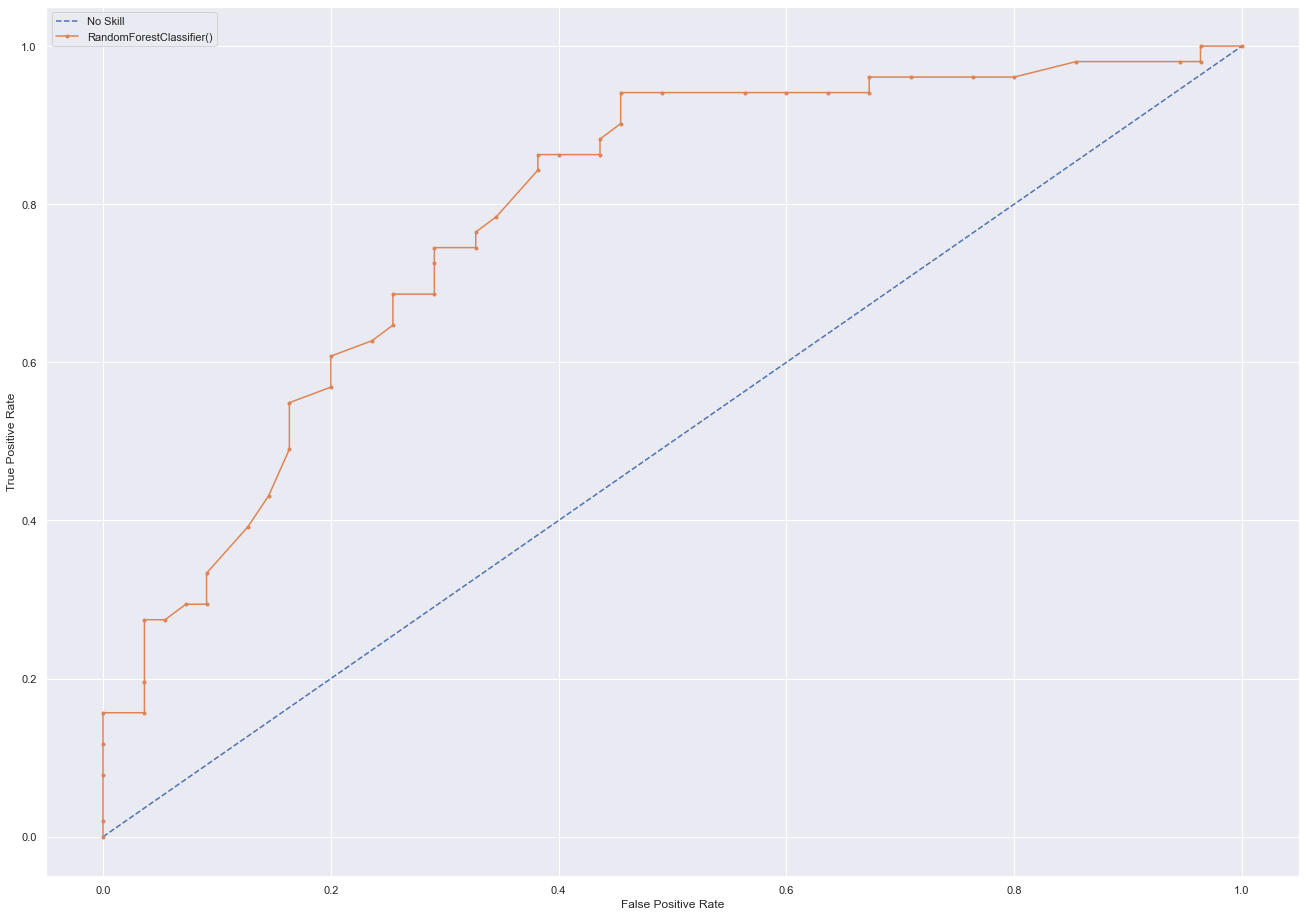

In [ ]:
#Test RandomForest model for reduced dataset
ncols_to_keep = int(0.8 * len(feat_importances))
reduced_feat_columns = feat_importances.nlargest(n = ncols_to_keep).index

reduced_x_train = X_train[reduced_feat_columns]
reduced_x_validation = X_validation[reduced_feat_columns]

fitted_baseline_model_1_3, estimator_auc_1_3 = score_model(estimator=baseline_model_2,
                                      train_data = (reduced_x_train, y_train),
                                      validation_data = (reduced_x_validation, y_validation),
                                      cv = 10)


It is difficult to draw conclusions from the thesis results with those shown above for the entire dataset version of the model. On the one hand, the cross-validation results do not present a relevant change. However, the validation results are clearly better.

If we still want to explore the possibility of reducing the amount of features in our dataset, applying a Recursive Feature Selection method is a reasonable approach. Since the dataset is small, it should not take much time. We can use a simplified version of the Random Forest algorithm to further reduce processing time issues.

In [ ]:
#Get RFE feature ranking and compare to RandomForestClassifier feature importance
rfe_model = RandomForestClassifier(n_estimators = 10)
feature_selector = RFE(estimator = rfe_model, step = 1)
feature_selector.fit(X_train, y_train)
feature_ranking = pd.Series(data = feature_selector.ranking_, index = feature_cols).sort_values()

importance_scale = pd.concat([feature_ranking, feat_importances.rank(ascending = False)], axis = 1)
importance_scale = importance_scale.rename(columns = {0: 'RFE_ranking', 1: 'RFC_ranking'})
importance_scale.sort_values(by = ['RFE_ranking', 'RFC_ranking'])

RFE_ranking  RFC_ranking
RESPIRATORY_RATE_MEAN_1                   1          1.0
BLOODPRESSURE_DIASTOLIC_MAX_1             1          2.0
BLOODPRESSURE_DIASTOLIC_MEAN_1            1          3.0
HEART_RATE_MAX_1                          1          4.0
BLOODPRESSURE_DIASTOLIC_MIN_1             1          5.0
RESPIRATORY_RATE_MAX_1                    1          6.0
RESPIRATORY_RATE_MIN_1                    1          7.0
HEART_RATE_MEAN_1                         1          8.0
HEART_RATE_MIN_1                          1          9.0
TEMPERATURE_MEAN_1                        1         10.0
TEMPERATURE_MIN_1                         1         11.0
BLOODPRESSURE_SISTOLIC_MEAN_1             1         12.0
BLOODPRESSURE_SISTOLIC_MAX_1              1         13.0
TEMPERATURE_MAX_1                         1         14.0
BLOODPRESSURE_SISTOLIC_MIN_1              1         15.0
OXYGEN_SATURATION_MEAN_1                  1         16.0
AGE_ABOVE65_1                             1         17.0
OXYGEN_SATURATION_MIN_1                   1         18.0
OXYGEN_SATURATION_MAX_1                   1         19.0
BLOODPRESSURE_SISTOLIC_DIFF_1             1         20.0
TEMPERATURE_DIFF_1                        1         22.0
RESPIRATORY_RATE_DIFF_1                   1         26.0
HEART_RATE_DIFF_1                         2         31.0
AGE_PERCENTIL_1:80th                      3         25.0
IMMUNOCOMPROMISED_1                       4         41.0
BLOODPRESSURE_DIASTOLIC_DIFF_1            5         23.0
GENDER_1                                  6         27.0
OTHER_1                                   7         32.0
AGE_PERCENTIL_1:40th                      8         38.0
OXYGEN_SATURATION_DIFF_1                  9         30.0
DISEASE GROUPING 3_1                     10         33.0
HTN_1                                    11         21.0
DISEASE GROUPING 6_1                     12         42.0
AGE_PERCENTIL_1:70th                     13         37.0
DISEASE GROUPING 5_1                     14         34.0
DISEASE GROUPING 1_1                     15         40.0
AGE_PERCENTIL_1:60th                     16         44.0
DISEASE GROUPING 2_1                     17         39.0
AGE_PERCENTIL_1:20th                     18         35.0
AGE_PERCENTIL_1:30th                     19         36.0
AGE_PERCENTIL_1:50th                     20         29.0
AGE_PERCENTIL_1:Above 90th               21         24.0
DISEASE GROUPING 4_1                     22         43.0
AGE_PERCENTIL_1:90th                     23         28.0

Looking at both rankings, it is clear both feature selection approaches present some resemblence. This is not necessarily a godd thing, since our results on removing the least important features were not conclusive. Not let's try and see how the classification model performs if we use only the better quarter of the features according to the RFE algorithm.

CV model accuracy:  %63.87 +/- %11.91
CV model roc_auc:  %68.08 +/- %14.34
Validation accuracy score: %68.87
Validation ROC_AUC score: %68.50
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%75.009


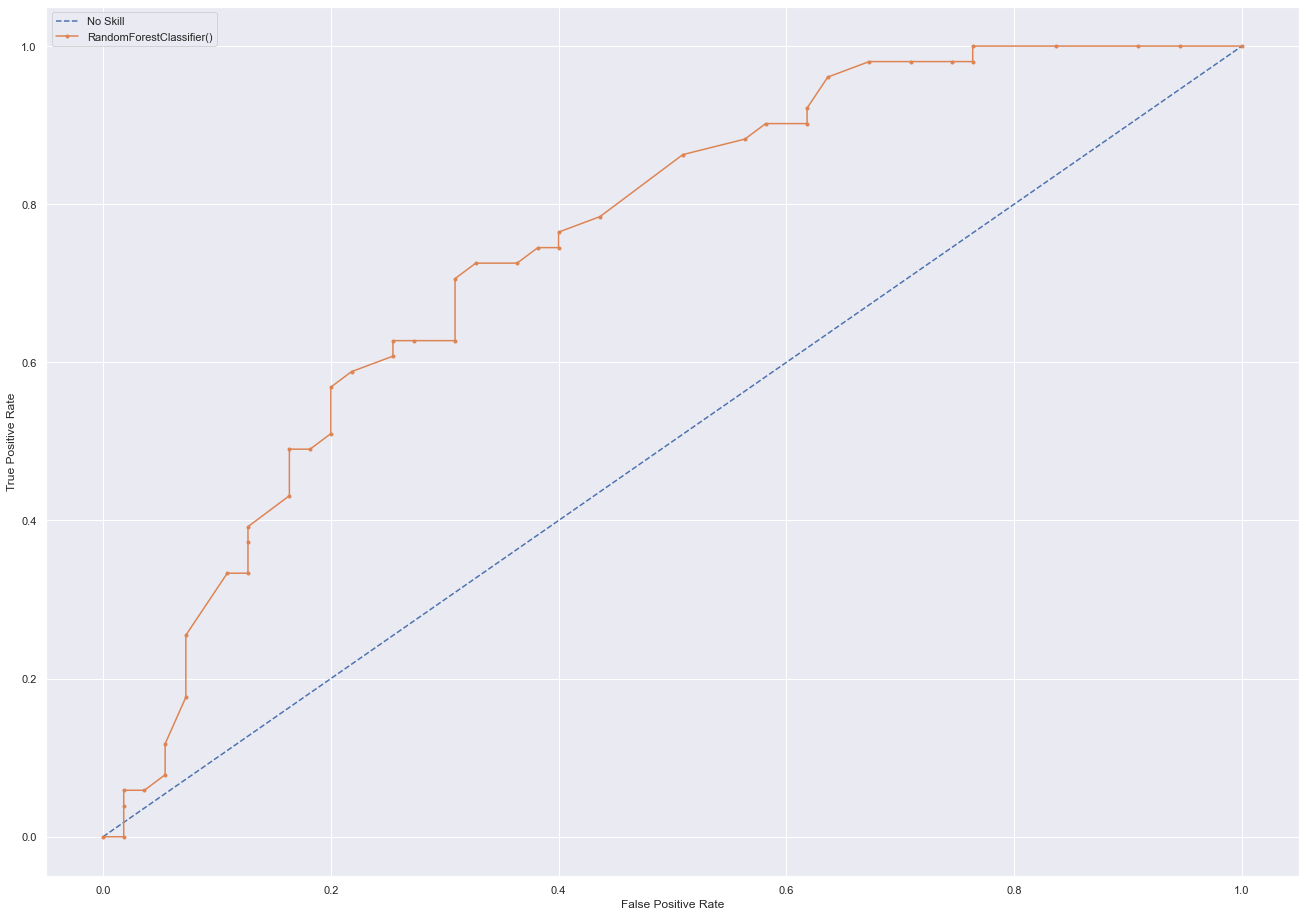

In [ ]:
#Test RandomForest model for RFE reduced dataset
cols_to_keep = importance_scale[importance_scale['RFE_ranking'] == 1].index
reduced_x_train = X_train[cols_to_keep]
reduced_x_validation = X_validation[cols_to_keep]

fitted_baseline_model_1_4, estimator_auc_1_4 = score_model(estimator=RandomForestClassifier(),
                                      train_data = (reduced_x_train, y_train),
                                      validation_data = (reduced_x_validation, y_validation),
                                      cv = 10)


Again, the results appear to be slightly better then the whole-dataset model. Also again, the margin is not big enough for us to make any bold statements.

For now, this is where we stop in terms of feature selection. The two tests we performed did provide us with conclusive results. Additionally, we are not dealing with a enormous amount of attributes, specially considering how these attributes are derived from a few measurements. The next step, then, is to see how much we are able to improve accuracy by tuning the hyperparameters.

#### D.1.5 Hyperparameter Tuning

So far, the best model we have produced has derived from the Random Forest algorithm. This way, we are only going to spend time tuning its hyperparemeters. In order to reduce the time we are going to spend on this procedure, only a portion of the hyperparameter is going to be investigated. They are:

* n_estimators
* criterion
* max_depth
* max_features

As our dataset is very small, it is feasable to perform a grid search for the best set of hyperparameters.

In [ ]:
# Define hyperparameter space
hyperparameter_grid = {
    'n_estimators': [10, 100, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
# Perform hyperparameter tuning by grid searching the defined space
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = hyperparameter_grid,
                           scoring = "roc_auc",
                           cv = 10,
                           n_jobs = 4,
                           verbose = 1)

grid_search_results = grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'n_estimators': 100}
Validation accuracy: %71.70
Validation ROC_AUC: %71.44
-----
No Skill: ROC AUC=%50.000
RandomForestClassifier: ROC AUC=%76.827


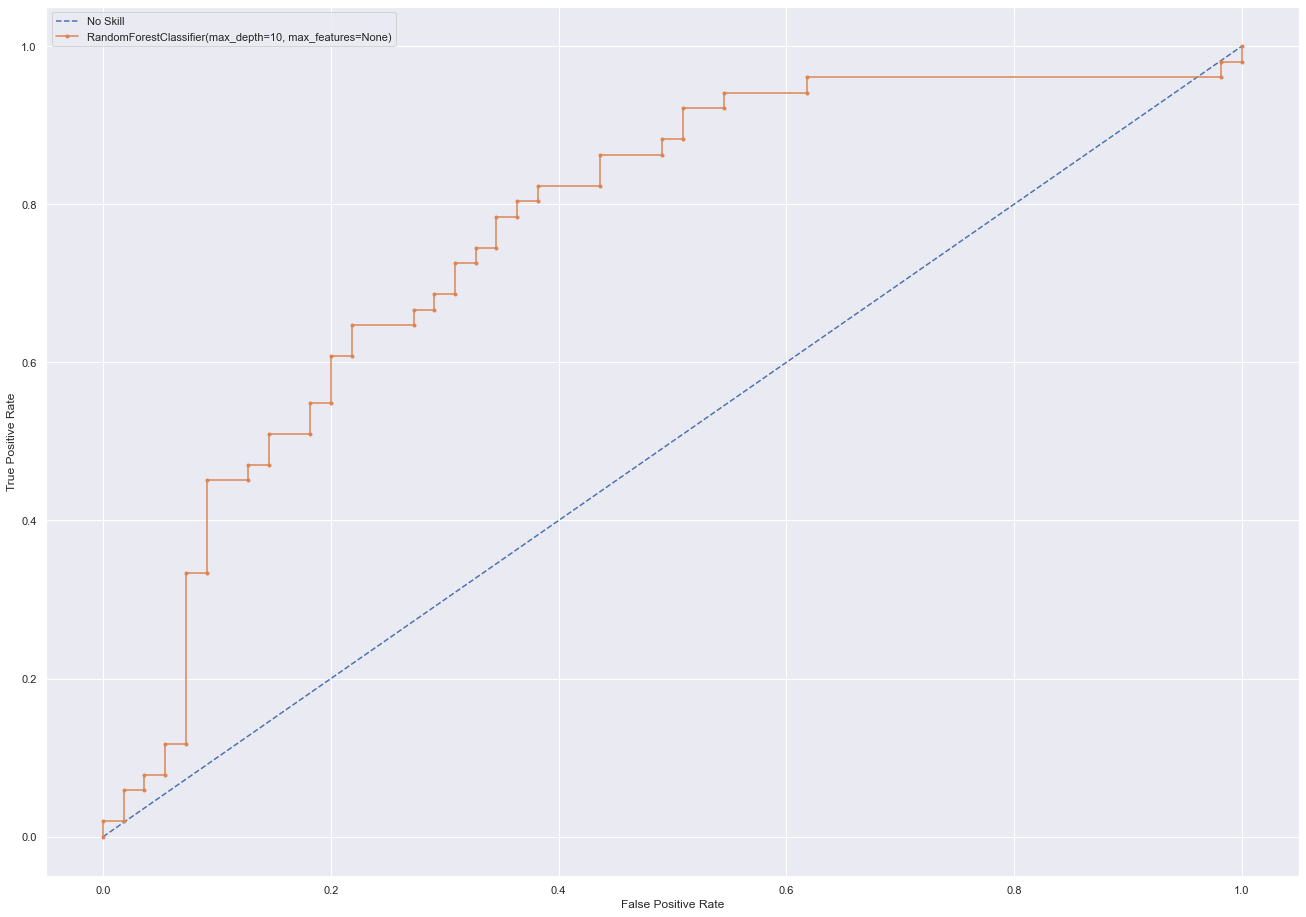

In [ ]:
# Look at the best performing set of hyperparameters and apply estimator on valdiation data
print(grid_search.best_params_)

best_gridsearch_model = grid_search.best_estimator_
best_gridsearch_model.fit(X_train, y_train)
y_pred = best_gridsearch_model.predict(X_validation)

print("Validation accuracy: %{:.2f}".format((accuracy_score(y_validation, y_pred))*100))
print("Validation ROC_AUC: %{:.2f}".format((roc_auc_score(y_validation, y_pred))*100))

# Generate a no skill prediction (majority class)
no_skill_probs = [0 for _ in range(len(y_validation))]

# predict probabilities
best_gridsearch_model_probs = best_gridsearch_model.predict_proba(X_validation)

# keep probabilities for the positive outcome only
best_gridsearch_model_probs = best_gridsearch_model_probs[:,1]

# calculate scores
no_skill_auc_1 = roc_auc_score(y_validation, no_skill_probs)
best_gridsearch_model_auc_1 = roc_auc_score(y_validation, best_gridsearch_model_probs)

print("-----")

# summarize scores
print('No Skill: ROC AUC=%{:.3f}'.format((no_skill_auc_1)*100))
print('RandomForestClassifier: ROC AUC=%{:.3f}'.format((best_gridsearch_model_auc_1)*100))

# calculate roc curves
no_skill_fpr, no_skill_tpr, _ = roc_curve(y_validation, no_skill_probs)
best_gridsearch_model_fpr, best_gridsearch_model_tpr, _ = roc_curve(y_validation, best_gridsearch_model_probs)

# plot the roc curve for the model
plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
plt.plot(best_gridsearch_model_fpr, best_gridsearch_model_tpr, marker='.', label=best_gridsearch_model)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()


This is by far the best results we have so far. Just by tuning the algorithm parameters we were able to improve the validation accuracy roughly by 6 percentage points. On top of that, we have reached a point in which our model should be able to correctly predict patients that are going to demand an ICU bed in over 80% of the cases.

### D.2 Data Modelling Between 2 - 6 Hours

#### D.2.1 Preprocessing Data

In [ ]:
#Split features into time variant and time constant
features_df = pd.DataFrame(data = df_new.columns.values, columns = ['Feature_name'])
features_df['Feature_group'] = [x[:-2] for x in features_df['Feature_name']]

features_df = features_df.join(on = 'Feature_group',
                               other = features_df.groupby(by = 'Feature_group').count(),
                               how = 'inner',
                               rsuffix = '_count')

time_constant_features = features_df[features_df['Feature_name_count'] == 1]['Feature_name'].values
time_variant_features = [x for x in features_df['Feature_name'] if x not in time_constant_features]

#time_constant_features = time_constant_features[time_constant_features != 'PATIENT_VISIT_IDENTIFIER_1']
time_constant_features = time_constant_features[time_constant_features !='ICU']


In [ ]:
# Get all columns related to Window 2 and 3
data_2 = df_new.filter(regex="_2|_3")
df_list_2 = data_2.copy()

# Change the column names by using begin and end
new_col_names = {x: x[:-1] + 'end' if x[-1] == str(3) else x[:-1] + 'begin' for x in df_new.columns}

# rewrite the columns names to the dataframe
df_list_2 = df_list_2.rename(columns=new_col_names)


In [ ]:
df_new_2 = df_list_2.copy()
df_new_2

BLOODPRESSURE_DIASTOLIC_DIFF_begin  BLOODPRESSURE_DIASTOLIC_DIFF_end  \
0                             -1.000000                         -0.339130   
2                             -0.547826                         -0.547826   
3                             -1.000000                         -1.000000   
4                             -1.000000                         -1.000000   
5                             -0.826087                         -1.000000   
..                                  ...                               ...   
380                           -1.000000                         -1.000000   
381                           -1.000000                         -1.000000   
382                           -1.000000                         -1.000000   
383                           -1.000000                         -1.000000   
384                           -1.000000                         -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_begin  \
0                                 -1.000000   
2                                 -0.515528   
3                                 -1.000000   
4                                 -1.000000   
5                                 -0.860870   
..                                      ...   
380                               -1.000000   
381                               -1.000000   
382                               -1.000000   
383                               -1.000000   
384                               -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_end  BLOODPRESSURE_DIASTOLIC_MAX_begin  \
0                               -0.389967                          -0.076923   
2                               -0.515528                          -0.435897   
3                               -1.000000                          -0.299145   
4                               -1.000000                          -0.076923   
5                               -1.000000                          -0.247863   
..                                    ...                                ...   
380                             -1.000000                          -0.589744   
381                             -1.000000                          -0.589744   
382                             -1.000000                          -0.299145   
383                             -1.000000                          -0.247863   
384                             -1.000000                          -0.247863   

     BLOODPRESSURE_DIASTOLIC_MAX_end  BLOODPRESSURE_DIASTOLIC_MEAN_begin  \
0                          -0.076923                            0.333333   
2                          -0.435897                           -0.489712   
3                          -0.299145                            0.012346   
4                          -0.076923                            0.333333   
5                          -0.418803                           -0.037037   
..                               ...                                 ...   
380                        -0.589744                           -0.407407   
381                        -0.589744                           -0.407407   
382                        -0.299145                            0.012346   
383                        -0.247863                            0.086420   
384                        -0.247863                            0.086420   

     BLOODPRESSURE_DIASTOLIC_MEAN_end  BLOODPRESSURE_DIASTOLIC_MEDIAN_begin  \
0                           -0.243021                              0.333333   
2                           -0.489712                             -0.506173   
3                            0.012346                              0.012346   
4                            0.333333                              0.333333   
5                           -0.160494                             -0.037037   
..                                ...                                   ...   
380                         -0.407407                             -0.407407   
381      

In [ ]:
#Merge time variant and time constant features together
df_new_2 = df_new_2.join(other = df_new[time_constant_features], how = 'inner')
df_new_2.head()

BLOODPRESSURE_DIASTOLIC_DIFF_begin  BLOODPRESSURE_DIASTOLIC_DIFF_end  \
0                           -1.000000                         -0.339130   
2                           -0.547826                         -0.547826   
3                           -1.000000                         -1.000000   
4                           -1.000000                         -1.000000   
5                           -0.826087                         -1.000000   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL_begin  \
0                               -1.000000   
2                               -0.515528   
3                               -1.000000   
4                               -1.000000   
5                               -0.860870   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL_end  BLOODPRESSURE_DIASTOLIC_MAX_begin  \
0                             -0.389967                          -0.076923   
2                             -0.515528                          -0.435897   
3                             -1.000000                          -0.299145   
4                             -1.000000                          -0.076923   
5                             -1.000000                          -0.247863   

   BLOODPRESSURE_DIASTOLIC_MAX_end  BLOODPRESSURE_DIASTOLIC_MEAN_begin  \
0                        -0.076923                            0.333333   
2                        -0.435897                           -0.489712   
3                        -0.299145                            0.012346   
4                        -0.076923                            0.333333   
5                        -0.418803                           -0.037037   

   BLOODPRESSURE_DIASTOLIC_MEAN_end  BLOODPRESSURE_DIASTOLIC_MEDIAN_begin  \
0                         -0.243021                              0.333333   
2                         -0.489712                             -0.506173   
3                          0.012346                              0.012346   
4                          0.333333                              0.333333   
5                         -0.160494                             -0.037037   

   BLOODPRESSURE_DIASTOLIC_MEDIAN_end  BLOODPRESSURE_DIASTOLIC_MIN_begin  \
0                           -0.283951                           0.443299   
2                           -0.506173                          -0.525773   
3                            0.012346                           0.175258   
4                            0.333333                           0.443299   
5                           -0.160494                           0.030928   

   BLOODPRESSURE_DIASTOLIC_MIN_end  BLOODPRESSURE_SISTOLIC_DIFF_begin  \
0                        -0.340206                          -1.000000   
2                        -0.525773                          -0.533742   
3                         0.175258                          -1.000000   
4                         0.443299                          -0.877301   
5                         0.030928                          -0.754601   

   BLOODPRESSURE_SISTOLIC_DIFF_end  BLOODPRESSURE_SISTOLIC_DIFF_REL_begin  \
0                         0.325153                              -1.000000   
2                        -0.533742                              -0.351328   
3                        -1.000000                              -1.000000   
4                        -0.877301                              -0.883669   
5                        -1.000000                              -0.714460   

   BLOODPRESSURE_SISTOLIC_DIFF_REL_end  BLOODPRESSURE_SISTOLIC_MAX_begin  \
0                             0.407558                         -0.459459   
2                            -0.351328                         -0.491892   
3                            -1.000000                         -0.556757   
4                            -0.883669                         -0.351351   
5                            -1.000000                         -0.567568   

   BLOODPRESSURE_SISTOLIC_MAX_end  BLOODPRESSURE_SISTOLIC_MEAN_begin  \
0               

In [ ]:
# Get the window and ICU of each patients
df_new_2 = df_new_2.join(other=admission_data.set_index('PATIENT_VISIT_IDENTIFIER').drop(columns="ICU"),
                         on='PATIENT_VISIT_IDENTIFIER_1',
                         how='inner')

In [ ]:
# Get the ICU information for the specific time interval
df_new_2 = df_new_2.join(other=ICU_col_values.set_index("PATIENT_VISIT_IDENTIFIER_1"),
                         on = "PATIENT_VISIT_IDENTIFIER_1",
                         how="inner")

In [ ]:
# Mask the patient data when ICU equals to 1 in Window 0-2
# Can't be used in the modelling
mask_unreliable2 = (df_new_2['WINDOW'] == "0-2") & (df_new_2['ICU_1'] == 1)
df_new_2 = df_new_2.loc[~mask_unreliable2]

In [ ]:
# Remove Patient ID
df_new_2.drop(columns= ["PATIENT_VISIT_IDENTIFIER_1"], inplace=True)

In [ ]:
df_new_2["ICU"] = df_new_2[["ICU_2","ICU_3"]].max(axis=1)

In [ ]:
df_new_2.drop(columns=["ICU_1", "ICU_2", "ICU_3", "ICU_4", "ICU_5"],inplace=True)

In [ ]:
df_new_2["WINDOW"] = df_new_2["WINDOW"].replace({"0-2": "1",
                                                 "2-4": "2",
                                                 "4-6": "3",
                                                 "6-12": "4",
                                                 "ABOVE_12": "5"})

In [ ]:
df_new_2["WINDOW"] = df_new_2["WINDOW"].fillna("0")

In [ ]:
# The Last Data after Preprocessing
df_new_2

BLOODPRESSURE_DIASTOLIC_DIFF_begin  BLOODPRESSURE_DIASTOLIC_DIFF_end  \
0                             -1.000000                         -0.339130   
2                             -0.547826                         -0.547826   
3                             -1.000000                         -1.000000   
4                             -1.000000                         -1.000000   
5                             -0.826087                         -1.000000   
..                                  ...                               ...   
380                           -1.000000                         -1.000000   
381                           -1.000000                         -1.000000   
382                           -1.000000                         -1.000000   
383                           -1.000000                         -1.000000   
384                           -1.000000                         -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_begin  \
0                                 -1.000000   
2                                 -0.515528   
3                                 -1.000000   
4                                 -1.000000   
5                                 -0.860870   
..                                      ...   
380                               -1.000000   
381                               -1.000000   
382                               -1.000000   
383                               -1.000000   
384                               -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_end  BLOODPRESSURE_DIASTOLIC_MAX_begin  \
0                               -0.389967                          -0.076923   
2                               -0.515528                          -0.435897   
3                               -1.000000                          -0.299145   
4                               -1.000000                          -0.076923   
5                               -1.000000                          -0.247863   
..                                    ...                                ...   
380                             -1.000000                          -0.589744   
381                             -1.000000                          -0.589744   
382                             -1.000000                          -0.299145   
383                             -1.000000                          -0.247863   
384                             -1.000000                          -0.247863   

     BLOODPRESSURE_DIASTOLIC_MAX_end  BLOODPRESSURE_DIASTOLIC_MEAN_begin  \
0                          -0.076923                            0.333333   
2                          -0.435897                           -0.489712   
3                          -0.299145                            0.012346   
4                          -0.076923                            0.333333   
5                          -0.418803                           -0.037037   
..                               ...                                 ...   
380                        -0.589744                           -0.407407   
381                        -0.589744                           -0.407407   
382                        -0.299145                            0.012346   
383                        -0.247863                            0.086420   
384                        -0.247863                            0.086420   

     BLOODPRESSURE_DIASTOLIC_MEAN_end  BLOODPRESSURE_DIASTOLIC_MEDIAN_begin  \
0                           -0.243021                              0.333333   
2                           -0.489712                             -0.506173   
3                            0.012346                              0.012346   
4                            0.333333                              0.333333   
5                           -0.160494                             -0.037037   
..                                ...                                   ...   
380                         -0.407407                             -0.407407   
381      

We finally have it. Our dataset has been constructed in such a way that all the _end features represent the data from the 2nd and 3rd available time window. Additionally, the _begin attribute are related to the imediatelly previous window. As for the time constant features, they can be identified by the _1 sufix.

#### D.2.2 Correlations

Text(0.5, 1.0, 'Distribution of Pearson correlation coefficient with respect to WINDOW 2 - 3')

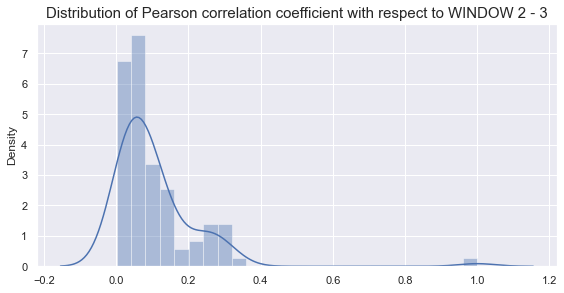

In [ ]:
#Define feature groups to investigate and compute pearson correlation
cols_to_investigate = np.unique(
    [x for x in df_new_2.columns if x.split('_')[-1] in ('end', 'begin')])

df_new_2_corr = df_new_2[np.append(cols_to_investigate, 'ICU')].corr()[
    'ICU']
df_new_2_corr = abs(df_new_2_corr)

plt.figure(figsize=(8, 4))
sns.distplot(df_new_2_corr.values)
plt.tight_layout()
plt.title('Distribution of Pearson correlation coefficient with respect to WINDOW 2 - 3', fontsize=15)


In [ ]:
#Rank feature correlations
df_new_2_corr = rank_correlation_score(df_new_2)
df_new_2_corr = df_new_2_corr[df_new_2_corr['Pearson_Correlation'] < 1]
df_new_2_corr


Feature_1  \
4838         OXYGEN_SATURATION_DIFF_begin   
7163                 TEMPERATURE_DIFF_end   
4931           OXYGEN_SATURATION_DIFF_end   
7070               TEMPERATURE_DIFF_begin   
1676    BLOODPRESSURE_SISTOLIC_MEAN_begin   
...                                   ...   
1866  BLOODPRESSURE_SISTOLIC_MEDIAN_begin   
1867  BLOODPRESSURE_SISTOLIC_MEDIAN_begin   
1072      BLOODPRESSURE_DIASTOLIC_MIN_end   
2893               DISEASE GROUPING 4_end   
1812      BLOODPRESSURE_SISTOLIC_MEAN_end   

                                Feature_2  Pearson_Correlation  
4838     OXYGEN_SATURATION_DIFF_REL_begin             0.999737  
7163             TEMPERATURE_DIFF_REL_end             0.999637  
4931       OXYGEN_SATURATION_DIFF_REL_end             0.999575  
7070           TEMPERATURE_DIFF_REL_begin             0.999561  
1676  BLOODPRESSURE_SISTOLIC_MEDIAN_begin             0.996120  
...                                   ...                  ...  
1866             DISEASE GROUPING 2_begin             0.000244  
1867               DISEASE GROUPING 2_end             0.000244  
1072       OXYGEN_SATURATION_MEDIAN_begin             0.000090  
2893                   HEART_RATE_MAX_end             0.000090  
1812          RESPIRATORY_RATE_DIFF_begin             0.000013  

[4090 rows x 3 columns]

In [ ]:
df_new_2_corr[df_new_2_corr["Pearson_Correlation"] >= 0.9]

Feature_1  \
4838          OXYGEN_SATURATION_DIFF_begin   
7163                  TEMPERATURE_DIFF_end   
4931            OXYGEN_SATURATION_DIFF_end   
7070                TEMPERATURE_DIFF_begin   
1676     BLOODPRESSURE_SISTOLIC_MEAN_begin   
3908                 HEART_RATE_MEAN_begin   
4001                   HEART_RATE_MEAN_end   
1211       BLOODPRESSURE_SISTOLIC_DIFF_end   
1118     BLOODPRESSURE_SISTOLIC_DIFF_begin   
1769       BLOODPRESSURE_SISTOLIC_MEAN_end   
560     BLOODPRESSURE_DIASTOLIC_MEAN_begin   
7628                TEMPERATURE_MEAN_begin   
653       BLOODPRESSURE_DIASTOLIC_MEAN_end   
7721                  TEMPERATURE_MEAN_end   
95        BLOODPRESSURE_DIASTOLIC_DIFF_end   
3443                   HEART_RATE_DIFF_end   
6512           RESPIRATORY_RATE_MEAN_begin   
2977              DISEASE GROUPING 5_begin   
3350                 HEART_RATE_DIFF_begin   
5396          OXYGEN_SATURATION_MEAN_begin   
2       BLOODPRESSURE_DIASTOLIC_DIFF_begin   
6605             RESPIRATORY_RATE_MEAN_end   
5489            OXYGEN_SATURATION_MEAN_end   
6047             RESPIRATORY_RATE_DIFF_end   
5954           RESPIRATORY_RATE_DIFF_begin   
3910                 HEART_RATE_MEAN_begin   
4094               HEART_RATE_MEDIAN_begin   
3722                  HEART_RATE_MAX_begin   
562     BLOODPRESSURE_DIASTOLIC_MEAN_begin   
7630                TEMPERATURE_MEAN_begin   
7442                 TEMPERATURE_MAX_begin   
746   BLOODPRESSURE_DIASTOLIC_MEDIAN_begin   
5210           OXYGEN_SATURATION_MAX_begin   
3724                  HEART_RATE_MAX_begin   
1490      BLOODPRESSURE_SISTOLIC_MAX_begin   
4003                   HEART_RATE_MEAN_end   
7814              TEMPERATURE_MEDIAN_begin   
1678     BLOODPRESSURE_SISTOLIC_MEAN_begin   
4187                 HEART_RATE_MEDIAN_end   
2791              DISEASE GROUPING 4_begin   
1492      BLOODPRESSURE_SISTOLIC_MAX_begin   
7723                  TEMPERATURE_MEAN_end   
7444                 TEMPERATURE_MAX_begin   
7535                   TEMPERATURE_MAX_end   
5212           OXYGEN_SATURATION_MAX_begin   
1862   BLOODPRESSURE_SISTOLIC_MEDIAN_begin   
7907                TEMPERATURE_MEDIAN_end   
655       BLOODPRESSURE_DIASTOLIC_MEAN_end   
1771       BLOODPRESSURE_SISTOLIC_MEAN_end   
6514           RESPIRATORY_RATE_MEAN_begin   
1955     BLOODPRESSURE_SISTOLIC_MEDIAN_end   
7537                   TEMPERATURE_MAX_end   
839     BLOODPRESSURE_DIASTOLIC_MEDIAN_end   
5303             OXYGEN_SATURATION_MAX_end   
374      BLOODPRESSURE_DIASTOLIC_MAX_begin   

                                   Feature_2  Pearson_Correlation  
4838        OXYGEN_SATURATION_DIFF_REL_begin             0.999737  
7163                TEMPERATURE_DIFF_REL_end             0.999637  
4931          OXYGEN_SATURATION_DIFF_REL_end             0.999575  
7070              TEMPERATURE_DIFF_REL_begin             0.999561  
1676     BLOODPRESSURE_SISTOLIC_MEDIAN_begin             0.996120  
3908                 HEART_RATE_MEDIAN_begin             0.995878  
4001                   HEART_RATE_MEDIAN_end             0.994698  
1211     BLOODPRESSURE_SISTOLIC_DIFF_REL_end             0.994695  
1118   BLOODPRESSURE_SISTOLIC_DIFF_REL_begin             0.994605  
1769       BLOODPRESSURE_SISTOLIC_MEDIAN_end             0.994342  
560     BLOODPRESSURE_DIASTOLIC_MEDIAN_begin             0.992616  
7628                TEMPERATURE_MEDIAN_begin             0.992506  
653       BLOODPRESSURE_DIASTOLIC_MEDIAN_end             0.991060  
7721                  TEMPERATURE_MEDIAN_end             0.989825  
95      BLOODPRESSURE_DIASTOLIC_DIFF_REL_end             0.989665  
3443                 HEART_RATE_DIFF_REL_end             0.989447  
6512           RESPIRATORY_RATE_MEDIAN_begin             0.988122  
2977                  DISEASE GROUPING 5_end             0.987220  
3350               HEART_RATE_DIFF_REL_begin             0.986694  
5396          OXYGEN_SATURATION_MEDIAN_begin             0.985447  
2     BLOODPRESSURE_DIASTOLI

Mostly, these stronger correlations can be grouped in two types:

1. *Begin* features strongly correlated to *End* features for the same measurements (Time relevant correlations).
2. Features correlated at the same time level (Time irrelevant correlations).

Next, we are looking at these two groups and determine whether any feature engineering or selection can be performed there.

##### D.2.2.1 Time Relevant Correlations

In [ ]:
df_new_2_corr['Feature_1_Type'] = [
    x.split('_')[-1] for x in df_new_2_corr['Feature_1']]
df_new_2_corr['Feature_2_Type'] = [
    x.split('_')[-1] for x in df_new_2_corr['Feature_2']]

time_corr = df_new_2_corr[df_new_2_corr['Pearson_Correlation'] >= 0.9]
time_corr = time_corr[df_new_2_corr['Feature_1_Type']
                      != df_new_2_corr['Feature_2_Type']]

time_corr.drop(columns=['Feature_1_Type', 'Feature_2_Type'])


Feature_1               Feature_2  Pearson_Correlation
2977  DISEASE GROUPING 5_begin  DISEASE GROUPING 5_end             0.987220
2791  DISEASE GROUPING 4_begin  DISEASE GROUPING 4_end             0.934058

Looking at the above relationships, all the features in question are actually binary. The Pearson correlation evaluation, in that case, is not even the proper test to be applied. However, these results probably mean the feature value does not change from one time window to the other. Let's take the last feature, *DISEASE GROUPING 4* as an example to see if this is actually true.

In [ ]:
print('Percentage of records in which DESEASE GROUPING 4 value does not change: %2.1f%%'
      % (100*len(df_new_2[df_new_2['DISEASE GROUPING 4_begin'] == df_new_2['DISEASE GROUPING 4_end']]) / len(df_new_2)))

Percentage of records in which DESEASE GROUPING 4 value does not change: 99.7%


As we can see, even for the least strong correlation value, the attribute remains mostly unchanged for the two time levels in question. This raises an interesting possibility: could we use the variable change as feature? Let's see if the possible new attribute correlates to the target in any level. 

In [ ]:
#Define function to compute how the feature change relates to the target
def compute_likelyhood(data, col, target):
    begin_col = col + '_begin'
    end_col = col + '_end'

    change_data = data[data[begin_col] != data[end_col]]
    no_change_data = data[data[begin_col] == data[end_col]]

    change_likelyhood = len(
        change_data[change_data[target] == 1]) / len(change_data)
    no_change_likelyhood = len(
        no_change_data[no_change_data[target] == 1]) / len(no_change_data)

    print('Success probability on change: %2.1f%%' % (100 * change_likelyhood))
    print('Success probability on no change: %2.1f%%' %
          (100 * no_change_likelyhood))


In [ ]:
compute_likelyhood(df_new_2, 'DISEASE GROUPING 4', 'ICU')

Success probability on change: 0.0%
Success probability on no change: 19.1%


The data shows promissing results. There is no record of patient going to the ICU while having it *DISEASE GROUPING 4* value change over time. However, there is one issue that we must consider. For this very small dataset, the 1.2% percent of the records in which this change does occur represent solely 4 patients. You don't have to be an expert to see it is not very smart to make any decisions based on such a small sample size. These occurances, for all we know, could very well be the result of wrong initial assessment of the patient condition or previous diseases.

Given this, our choice will be to remove the *begin* features for the strong correlations we highlighed. Before we do it, though, we should check the other binary features, specially the remaining *DISEASE GROUPINGS*.

In [ ]:
df_new_2['DISEASE GROUPING 4_begin'].unique()

array([0., 1.])

In [ ]:
binary_feature_groups = np.unique(['_'.join(x.split('_')[:-1]) for x in df_new_2.columns.values
                                   if len(df_new_2[x].unique()) == 2], return_counts=True)
binary_feature_groups = [x for x, y in zip(
    binary_feature_groups[0], binary_feature_groups[1]) if y > 1]

#Selected desired correlations
binary_feat_time_corr = df_new_2_corr[df_new_2_corr['Feature_1_Type']
                                      != df_new_2_corr['Feature_2_Type']]
binary_feat_time_corr['Feature_1_Type'] = ['_'.join(x.split('_')[:-1])
                                           for x in binary_feat_time_corr['Feature_1']]
binary_feat_time_corr['Feature_2_Type'] = ['_'.join(x.split('_')[:-1])
                                           for x in binary_feat_time_corr['Feature_2']]

binary_feat_time_corr = binary_feat_time_corr[
    binary_feat_time_corr['Feature_1_Type'] == binary_feat_time_corr['Feature_2_Type']]
binary_feat_time_corr = binary_feat_time_corr[binary_feat_time_corr['Feature_1_Type'].isin(
    binary_feature_groups)]
binary_feat_time_corr


Feature_1               Feature_2  Pearson_Correlation  \
2977  DISEASE GROUPING 5_begin  DISEASE GROUPING 5_end             0.987220   
2791  DISEASE GROUPING 4_begin  DISEASE GROUPING 4_end             0.934058   
4651               OTHER_begin               OTHER_end             0.654558   

          Feature_1_Type      Feature_2_Type  
2977  DISEASE GROUPING 5  DISEASE GROUPING 5  
2791  DISEASE GROUPING 4  DISEASE GROUPING 4  
4651               OTHER               OTHER

Besides the four previous correlations, there another three of the time variant type involving binary features. The last one, for the *OTHER* feature, is not relevant in this context, since its value is much smaller compared to the other ones. This leaves us with two extra relationship, both of which present very large correlation scores. We can adopt the procedure mentioned above: consider the *end* feature as the correct assessment and remove the *begin* feature.

In [ ]:
#Remove '_begin' features for strongly time correlated group of attributes
df_new_2 = df_new_2.drop(
    columns=binary_feat_time_corr[binary_feat_time_corr['Feature_1'] != 'OTHER_begin']['Feature_1'])
df_new_2.head()


BLOODPRESSURE_DIASTOLIC_DIFF_begin  BLOODPRESSURE_DIASTOLIC_DIFF_end  \
0                           -1.000000                         -0.339130   
2                           -0.547826                         -0.547826   
3                           -1.000000                         -1.000000   
4                           -1.000000                         -1.000000   
5                           -0.826087                         -1.000000   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL_begin  \
0                               -1.000000   
2                               -0.515528   
3                               -1.000000   
4                               -1.000000   
5                               -0.860870   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL_end  BLOODPRESSURE_DIASTOLIC_MAX_begin  \
0                             -0.389967                          -0.076923   
2                             -0.515528                          -0.435897   
3                             -1.000000                          -0.299145   
4                             -1.000000                          -0.076923   
5                             -1.000000                          -0.247863   

   BLOODPRESSURE_DIASTOLIC_MAX_end  BLOODPRESSURE_DIASTOLIC_MEAN_begin  \
0                        -0.076923                            0.333333   
2                        -0.435897                           -0.489712   
3                        -0.299145                            0.012346   
4                        -0.076923                            0.333333   
5                        -0.418803                           -0.037037   

   BLOODPRESSURE_DIASTOLIC_MEAN_end  BLOODPRESSURE_DIASTOLIC_MEDIAN_begin  \
0                         -0.243021                              0.333333   
2                         -0.489712                             -0.506173   
3                          0.012346                              0.012346   
4                          0.333333                              0.333333   
5                         -0.160494                             -0.037037   

   BLOODPRESSURE_DIASTOLIC_MEDIAN_end  BLOODPRESSURE_DIASTOLIC_MIN_begin  \
0                           -0.283951                           0.443299   
2                           -0.506173                          -0.525773   
3                            0.012346                           0.175258   
4                            0.333333                           0.443299   
5                           -0.160494                           0.030928   

   BLOODPRESSURE_DIASTOLIC_MIN_end  BLOODPRESSURE_SISTOLIC_DIFF_begin  \
0                        -0.340206                          -1.000000   
2                        -0.525773                          -0.533742   
3                         0.175258                          -1.000000   
4                         0.443299                          -0.877301   
5                         0.030928                          -0.754601   

   BLOODPRESSURE_SISTOLIC_DIFF_end  BLOODPRESSURE_SISTOLIC_DIFF_REL_begin  \
0                         0.325153                              -1.000000   
2                        -0.533742                              -0.351328   
3                        -1.000000                              -1.000000   
4                        -0.877301                              -0.883669   
5                        -1.000000                              -0.714460   

   BLOODPRESSURE_SISTOLIC_DIFF_REL_end  BLOODPRESSURE_SISTOLIC_MAX_begin  \
0                             0.407558                         -0.459459   
2                            -0.351328                         -0.491892   
3                            -1.000000                         -0.556757   
4                            -0.883669                         -0.351351   
5                            -1.000000                         -0.567568   

   BLOODPRESSURE_SISTOLIC_MAX_end  BLOODPRESSURE_SISTOLIC_MEAN_begin  \
0               

##### D.2.2.2 Time Irrelevant Correlations

In [ ]:
# Select correlations for features in the same time level
single_time_step_corr = df_new_2_corr[df_new_2_corr['Feature_1_Type']
                                      == df_new_2_corr['Feature_2_Type']]
single_time_step_corr = single_time_step_corr[single_time_step_corr['Pearson_Correlation'] >= 0.9]
single_time_step_corr


Feature_1  \
4838          OXYGEN_SATURATION_DIFF_begin   
7163                  TEMPERATURE_DIFF_end   
4931            OXYGEN_SATURATION_DIFF_end   
7070                TEMPERATURE_DIFF_begin   
1676     BLOODPRESSURE_SISTOLIC_MEAN_begin   
3908                 HEART_RATE_MEAN_begin   
4001                   HEART_RATE_MEAN_end   
1211       BLOODPRESSURE_SISTOLIC_DIFF_end   
1118     BLOODPRESSURE_SISTOLIC_DIFF_begin   
1769       BLOODPRESSURE_SISTOLIC_MEAN_end   
560     BLOODPRESSURE_DIASTOLIC_MEAN_begin   
7628                TEMPERATURE_MEAN_begin   
653       BLOODPRESSURE_DIASTOLIC_MEAN_end   
7721                  TEMPERATURE_MEAN_end   
95        BLOODPRESSURE_DIASTOLIC_DIFF_end   
3443                   HEART_RATE_DIFF_end   
6512           RESPIRATORY_RATE_MEAN_begin   
3350                 HEART_RATE_DIFF_begin   
5396          OXYGEN_SATURATION_MEAN_begin   
2       BLOODPRESSURE_DIASTOLIC_DIFF_begin   
6605             RESPIRATORY_RATE_MEAN_end   
5489            OXYGEN_SATURATION_MEAN_end   
6047             RESPIRATORY_RATE_DIFF_end   
5954           RESPIRATORY_RATE_DIFF_begin   
3910                 HEART_RATE_MEAN_begin   
4094               HEART_RATE_MEDIAN_begin   
3722                  HEART_RATE_MAX_begin   
562     BLOODPRESSURE_DIASTOLIC_MEAN_begin   
7630                TEMPERATURE_MEAN_begin   
7442                 TEMPERATURE_MAX_begin   
746   BLOODPRESSURE_DIASTOLIC_MEDIAN_begin   
5210           OXYGEN_SATURATION_MAX_begin   
3724                  HEART_RATE_MAX_begin   
1490      BLOODPRESSURE_SISTOLIC_MAX_begin   
4003                   HEART_RATE_MEAN_end   
7814              TEMPERATURE_MEDIAN_begin   
1678     BLOODPRESSURE_SISTOLIC_MEAN_begin   
4187                 HEART_RATE_MEDIAN_end   
1492      BLOODPRESSURE_SISTOLIC_MAX_begin   
7723                  TEMPERATURE_MEAN_end   
7444                 TEMPERATURE_MAX_begin   
7535                   TEMPERATURE_MAX_end   
5212           OXYGEN_SATURATION_MAX_begin   
1862   BLOODPRESSURE_SISTOLIC_MEDIAN_begin   
7907                TEMPERATURE_MEDIAN_end   
655       BLOODPRESSURE_DIASTOLIC_MEAN_end   
1771       BLOODPRESSURE_SISTOLIC_MEAN_end   
6514           RESPIRATORY_RATE_MEAN_begin   
1955     BLOODPRESSURE_SISTOLIC_MEDIAN_end   
7537                   TEMPERATURE_MAX_end   
839     BLOODPRESSURE_DIASTOLIC_MEDIAN_end   
5303             OXYGEN_SATURATION_MAX_end   
374      BLOODPRESSURE_DIASTOLIC_MAX_begin   

                                   Feature_2  Pearson_Correlation  \
4838        OXYGEN_SATURATION_DIFF_REL_begin             0.999737   
7163                TEMPERATURE_DIFF_REL_end             0.999637   
4931          OXYGEN_SATURATION_DIFF_REL_end             0.999575   
7070              TEMPERATURE_DIFF_REL_begin             0.999561   
1676     BLOODPRESSURE_SISTOLIC_MEDIAN_begin             0.996120   
3908                 HEART_RATE_MEDIAN_begin             0.995878   
4001                   HEART_RATE_MEDIAN_end             0.994698   
1211     BLOODPRESSURE_SISTOLIC_DIFF_REL_end             0.994695   
1118   BLOODPRESSURE_SISTOLIC_DIFF_REL_begin             0.994605   
1769       BLOODPRESSURE_SISTOLIC_MEDIAN_end             0.994342   
560     BLOODPRESSURE_DIASTOLIC_MEDIAN_begin             0.992616   
7628                TEMPERATURE_MEDIAN_begin             0.992506   
653       BLOODPRESSURE_DIASTOLIC_MEDIAN_end             0.991060   
7721                  TEMPERATURE_MEDIAN_end             0.989825   
95      BLOODPRESSURE_DIASTOLIC_DIFF_REL_end             0.989665   
3443                 HEART_RATE_DIFF_REL_end             0.989447   
6512           RESPIRATORY_RATE_MEDIAN_begin             0.988122   
3350               HEART_RATE_DIFF_REL_begin             0.986694   
5396          OXYGEN_SATURATION_MEDIAN_begin             0.985447   
2     BLOODPRESSURE_DIASTOLIC_DIFF_REL_begin             0.984942   
6605             RESPIRATORY_RATE_MEDIAN_end             0.984433   
5489            OXYGEN_SATURAT

Looking at all the selected correlation for which the time step as the same for both features, we observe the pattern is similar to when we were doing this same procedure on the previous model. Most strong correlation are of the *MEAN/MEDIAN* type, followed by some *DIFF/DIFF_REL* and a few *MIN - MAX/MEAN*. Before we decide on what do, let's how one of these correlations looks on a plot.

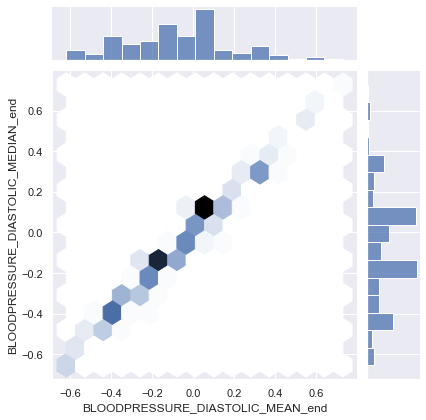

In [ ]:
#Plot BLOODPRESSURE_DIASTOLIC_MEAN_end vs. BLOODPRESSURE_DIASTOLIC_MEDIAN_end
sns.jointplot('BLOODPRESSURE_DIASTOLIC_MEAN_end',
              'BLOODPRESSURE_DIASTOLIC_MEDIAN_end', df_new_2, kind='hex')


The graph confirms what the Pearson correlation score indicated. The two features are highly dependent on each other. As we are talking about extremely high correlation values, all of them over 0.97, we can simply remove one feature for each pair. As for any remaining strong correlations we have not investigated, other feature selection procedures will be applied on the dataset, meaning our work on cleaning the data is not done yet.

In [ ]:
#Remove correlated features
df_new_2 = df_new_2.drop(columns=single_time_step_corr['Feature_2'].values)
df_new_2.head()

BLOODPRESSURE_DIASTOLIC_DIFF_begin  BLOODPRESSURE_DIASTOLIC_DIFF_end  \
0                           -1.000000                         -0.339130   
2                           -0.547826                         -0.547826   
3                           -1.000000                         -1.000000   
4                           -1.000000                         -1.000000   
5                           -0.826087                         -1.000000   

   BLOODPRESSURE_DIASTOLIC_MAX_begin  BLOODPRESSURE_DIASTOLIC_MAX_end  \
0                          -0.076923                        -0.076923   
2                          -0.435897                        -0.435897   
3                          -0.299145                        -0.299145   
4                          -0.076923                        -0.076923   
5                          -0.247863                        -0.418803   

   BLOODPRESSURE_DIASTOLIC_MEAN_end  BLOODPRESSURE_SISTOLIC_DIFF_begin  \
0                         -0.243021                          -1.000000   
2                         -0.489712                          -0.533742   
3                          0.012346                          -1.000000   
4                          0.333333                          -0.877301   
5                         -0.160494                          -0.754601   

   BLOODPRESSURE_SISTOLIC_DIFF_end  BLOODPRESSURE_SISTOLIC_MAX_begin  \
0                         0.325153                         -0.459459   
2                        -0.533742                         -0.491892   
3                        -1.000000                         -0.556757   
4                        -0.877301                         -0.351351   
5                        -1.000000                         -0.567568   

   BLOODPRESSURE_SISTOLIC_MAX_end  BLOODPRESSURE_SISTOLIC_MEAN_end  \
0                        0.286486                        -0.338537   
2                       -0.491892                        -0.685470   
3                       -0.556757                        -0.369231   
4                       -0.351351                        -0.153846   
5                       -0.675676                        -0.538462   

   DISEASE GROUPING 1_begin  DISEASE GROUPING 1_end  DISEASE GROUPING 2_begin  \
0                       0.0                     0.0                       0.0   
2                       0.0                     0.0                       0.0   
3                       0.0                     0.0                       0.0   
4                       0.0                     0.0                       0.0   
5                       0.0                     0.0                       0.0   

   DISEASE GROUPING 2_end  DISEASE GROUPING 3_begin  DISEASE GROUPING 3_end  \
0                     0.0                       0.0                     0.0   
2                     0.0                       0.0                     0.0   
3                     0.0                       0.0                     0.0   
4                     0.0                       0.0                     0.0   
5                     0.0                       0.0                     0.0   

   DISEASE GROUPING 4_end  DISEASE GROUPING 5_end  DISEASE GROUPING 6_begin  \
0                     0.0                     1.0                       1.0   
2                     0.0                     0.0                       0.0   
3                     0.0                     0.0                       0.0   
4                     0.0                     0.0                       0.0   
5                     0.0                     0.0                       0.0   

   DISEASE GROUPING 6_end  HEART_RATE_DIFF_begin  HEART_RATE_DIFF_end  \
0                     1.0              -1.000000             0.114504   
2                     0.0              -0.603053            -0.603053   
3                     0.0              -1.000000            -1.000000   
4                     0.0              -0.923664            -0.923664   
5           

#### D.2.3 Feature Encoding

In [ ]:
# Encode remaining categorical feature
df_new_2 = encode_feature(df_new_2, "AGE_PERCENTIL_1")

#### D.2.4 Data Modelling

##### D.2.4.1 KNN Modelling

CV model accuracy:  %79.32 +/- %4.70
CV model roc_auc:  %62.41 +/- %12.85
Validation accuracy score: %83.96
Validation ROC_AUC score: %64.61
--------
No Skill: ROC AUC=%50.000
KNeighborsClassifier(): ROC AUC=%72.237


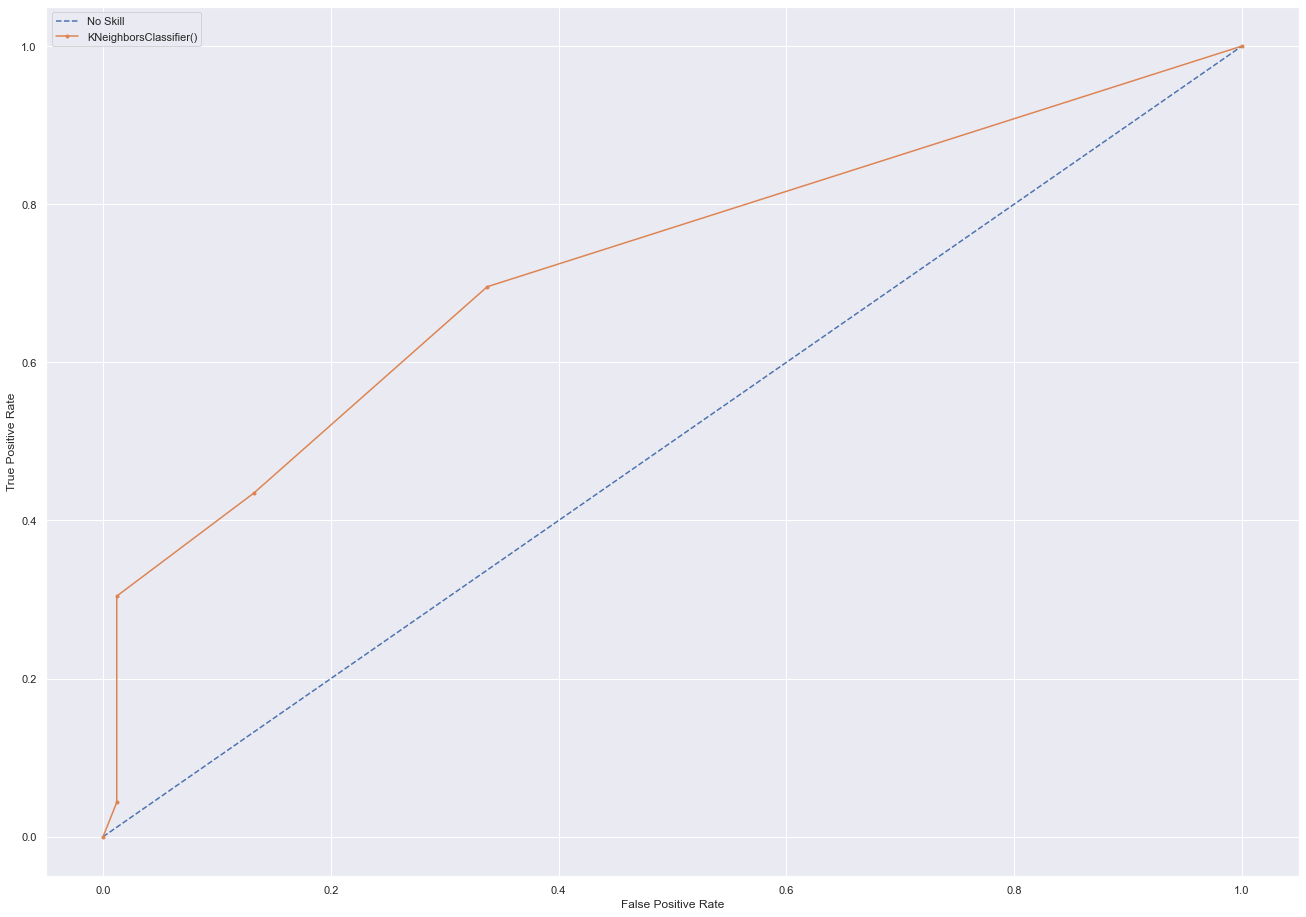

In [ ]:
# Split dataset into training and validation
np.random.seed(10)

feature_cols = df_new_2.drop(columns=["ICU", "WINDOW"]).columns.values

X = df_new_2[feature_cols]
y = df_new_2["ICU"]

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, shuffle=True)

#Compute score for a KNN model
fitted_baseline_model_2_1, estimator_auc_2_1 = score_model(estimator=KNN(),
                                      train_data=(X_train, y_train),
                                      validation_data=(X_validation, y_validation),
                                      cv=10)


##### D.2.4.1 RandomForestClassifier Modelling

CV model accuracy:  %85.78 +/- %2.18
CV model roc_auc:  %85.77 +/- %5.33
Validation accuracy score: %81.13
Validation ROC_AUC score: %59.66
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%81.116


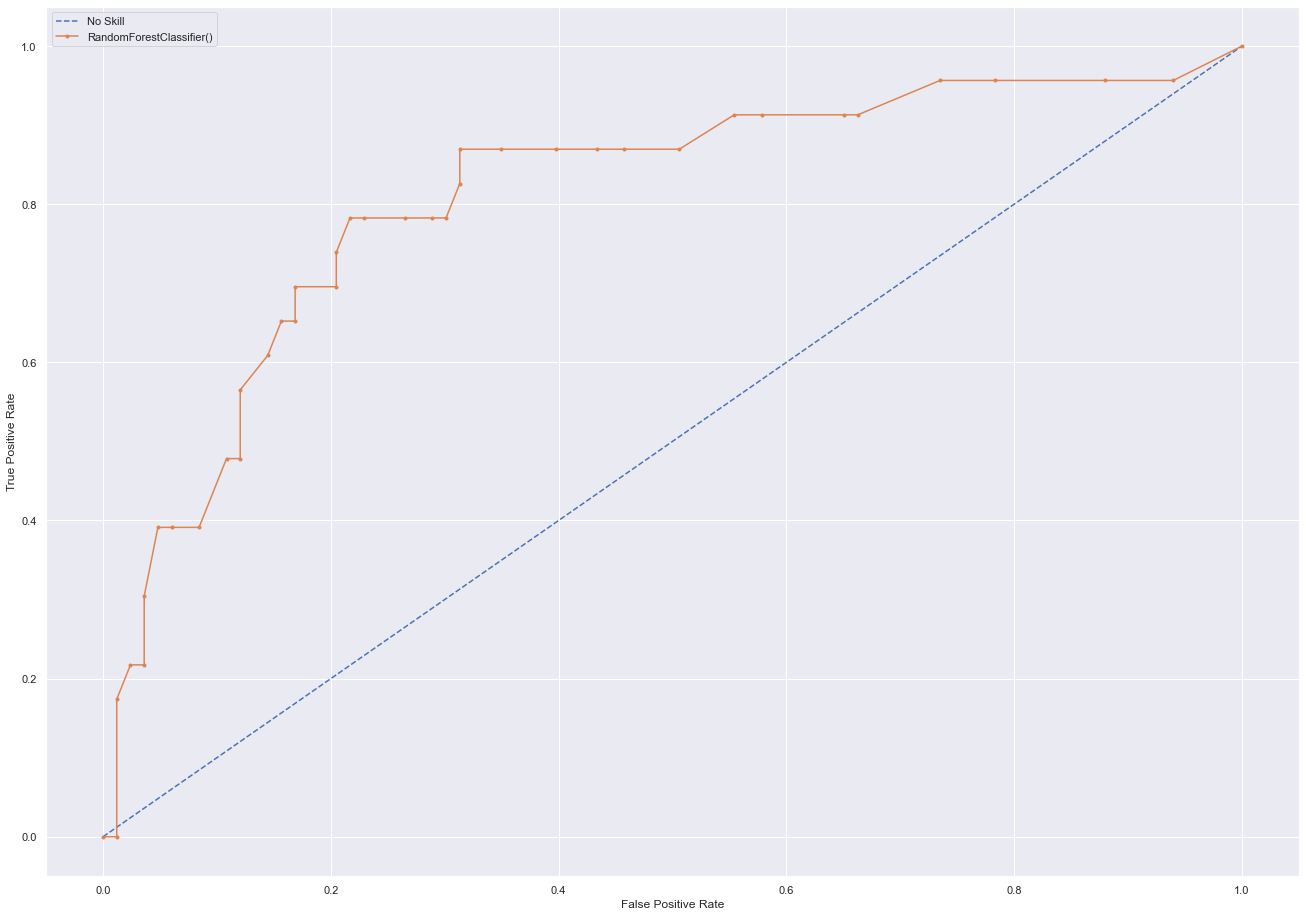

In [ ]:
# Split dataset into training and validation
np.random.seed(10)

feature_cols = df_new_2.drop(columns=["ICU","WINDOW"]).columns.values

X = df_new_2[feature_cols]
y = df_new_2["ICU"]

X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=0.3, shuffle = True)

# Cross - validate baseline model
baseline_model = RandomForestClassifier()
fitted_baseline_model_2_2, estimator_auc_2_2 = score_model(estimator=baseline_model,
                                    train_data = (X_train, y_train),
                                    validation_data = (X_validation, y_validation), 
                                    cv = 5)


CV model accuracy:  %83.32 +/- %4.27
CV model roc_auc:  %83.41 +/- %8.05
Validation accuracy score: %85.85
Validation ROC_AUC score: %58.26
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%82.551


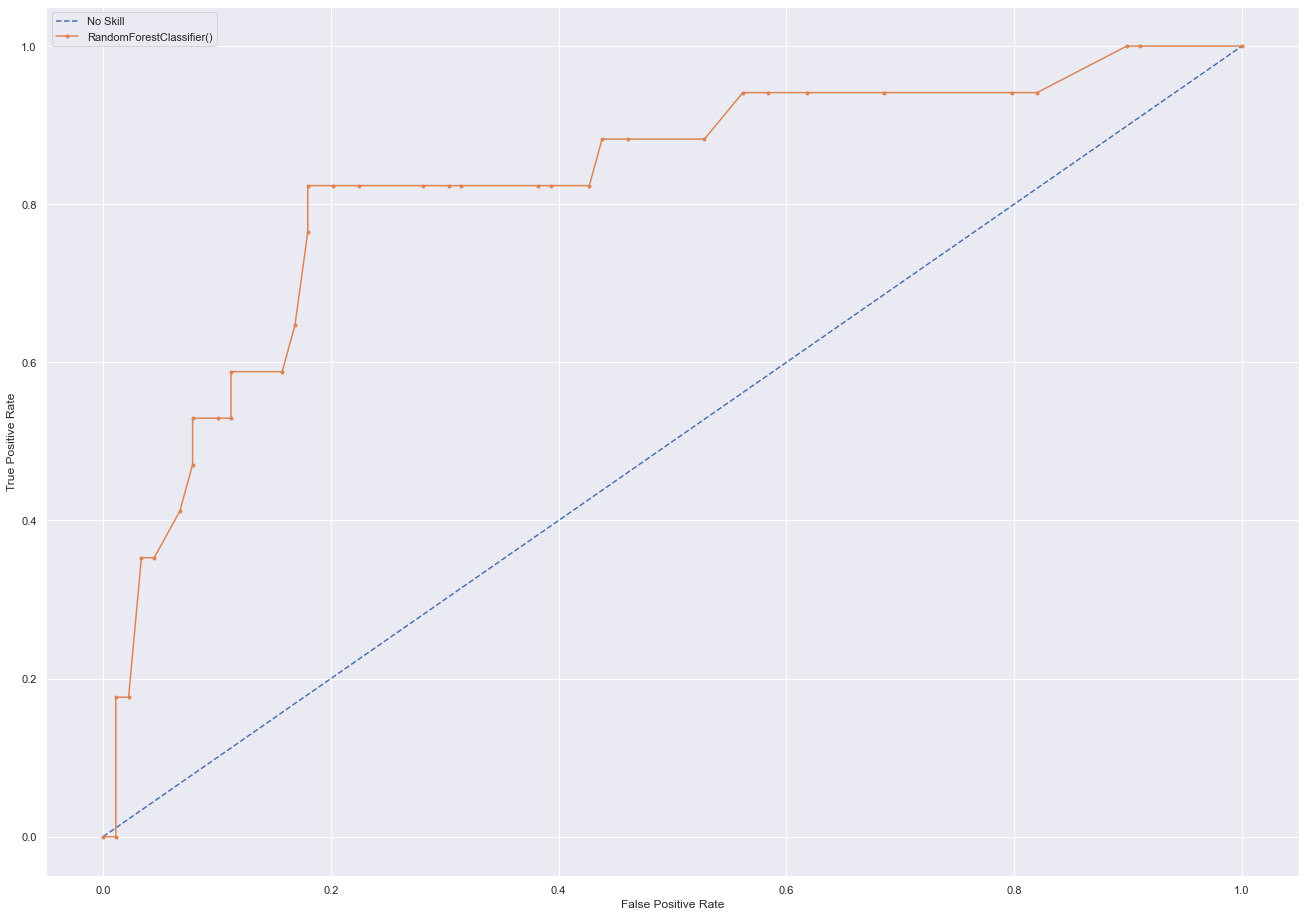

In [ ]:
#Compute baseline model score for a different random seed
np.random.seed(100)

X = df_new_2[feature_cols]
y = df_new_2["ICU"]

X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.3, shuffle=True)

fitted_baseline_model_2_3, estimator_auc_2_3 = score_model(estimator=RandomForestClassifier(),
                                      train_data=(X_train, y_train),
                                      validation_data=(
                                          X_validation, y_validation),
                                      cv=10)


#### D.2.5 Feature Selection

<AxesSubplot:>

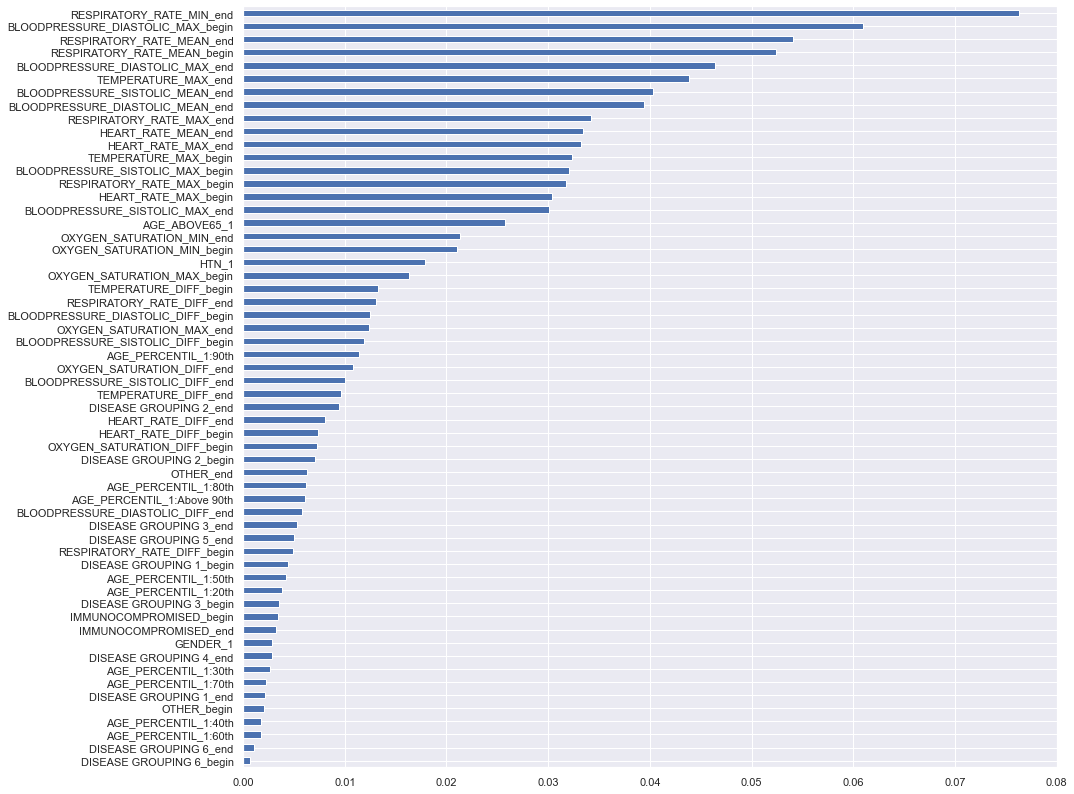

In [ ]:
# Plot feature importance for the Random Forest Model
feat_importances = pd.Series(data = fitted_baseline_model_2_3.feature_importances_,
                             index = feature_cols).sort_values()
feat_importances.plot(kind= "barh",figsize = (13,14))

In [ ]:
#Get RFE feature ranking and compare to RandomForestClassifier feature importance
rfe_model = RandomForestClassifier(n_estimators=10)
feature_selector = RFE(estimator=rfe_model, step=1)
feature_selector.fit(X_train, y_train)
feature_ranking = pd.Series(
    data=feature_selector.ranking_, index=feature_cols).sort_values()

importance_scale = pd.concat(
    [feature_ranking, feat_importances.rank(ascending=False)], axis=1)
importance_scale = importance_scale.rename(
    columns={0: 'RFE_ranking', 1: 'RFC_ranking'})
importance_scale.sort_values(by=['RFE_ranking', 'RFC_ranking'])


RFE_ranking  RFC_ranking
RESPIRATORY_RATE_MIN_end                      1          1.0
BLOODPRESSURE_DIASTOLIC_MAX_begin             1          2.0
RESPIRATORY_RATE_MEAN_end                     1          3.0
RESPIRATORY_RATE_MEAN_begin                   1          4.0
BLOODPRESSURE_DIASTOLIC_MAX_end               1          5.0
TEMPERATURE_MAX_end                           1          6.0
BLOODPRESSURE_SISTOLIC_MEAN_end               1          7.0
BLOODPRESSURE_DIASTOLIC_MEAN_end              1          8.0
RESPIRATORY_RATE_MAX_end                      1          9.0
HEART_RATE_MEAN_end                           1         10.0
HEART_RATE_MAX_end                            1         11.0
TEMPERATURE_MAX_begin                         1         12.0
BLOODPRESSURE_SISTOLIC_MAX_begin              1         13.0
RESPIRATORY_RATE_MAX_begin                    1         14.0
HEART_RATE_MAX_begin                          1         15.0
BLOODPRESSURE_SISTOLIC_MAX_end                1         16.0
AGE_ABOVE65_1                                 1         17.0
OXYGEN_SATURATION_MIN_end                     1         18.0
OXYGEN_SATURATION_MIN_begin                   1         19.0
OXYGEN_SATURATION_MAX_begin                   1         21.0
RESPIRATORY_RATE_DIFF_end                     1         23.0
OXYGEN_SATURATION_MAX_end                     1         25.0
BLOODPRESSURE_SISTOLIC_DIFF_begin             1         26.0
TEMPERATURE_DIFF_end                          1         30.0
DISEASE GROUPING 2_end                        1         31.0
HEART_RATE_DIFF_begin                         1         33.0
OXYGEN_SATURATION_DIFF_begin                  1         34.0
AGE_PERCENTIL_1:80th                          1         37.0
DISEASE GROUPING 3_begin                      1         46.0
BLOODPRESSURE_SISTOLIC_DIFF_end               2         29.0
TEMPERATURE_DIFF_begin                        3         22.0
OXYGEN_SATURATION_DIFF_end                    4         28.0
DISEASE GROUPING 1_end                        5         53.0
HTN_1                                         6         20.0
AGE_PERCENTIL_1:50th                          7         44.0
DISEASE GROUPING 2_begin                      8         35.0
HEART_RATE_DIFF_end                           9         32.0
GENDER_1                                     10         49.0
DISEASE GROUPING 3_end                       11         40.0
RESPIRATORY_RATE_DIFF_begin                  12         42.0
DISEASE GROUPING 5_end                       13         41.0
AGE_PERCENTIL_1:20th                         14         45.0
BLOODPRESSURE_DIASTOLIC_DIFF_begin           15         24.0
OTHER_begin                                  16         54.0
DISEASE GROUPING 1_begin                     17         43.0
AGE_PERCENTIL_1:40th                         18         55.0
DISEASE GROUPING 4_end                       19         50.0
AGE_PERCENTIL_1:30th                         20         51.0
DISEASE GROUPING 6_begin                     21         58.0
AGE_PERCENTIL_1:90th                         22         27.0
DISEASE GROUPING 6_end                       23         57.0
OTHER_end                                    24         36.0
AGE_PERCENTIL_1:Above 90th                   25         38.0
AGE_PERCENTIL_1:70th                         26         52.0
IMMUNOCOMPROMISED_end                        27         48.0
AGE_PERCENTIL_1:60th                         28         56.0
BLOODPRESSURE_DIASTOLIC_DIFF_end             29         39.0
IMMUNOCOMPROMISED_begin                      30         47.0

CV model accuracy:  %84.93 +/- %4.51
CV model roc_auc:  %82.39 +/- %8.48
Validation accuracy score: %82.08
Validation ROC_AUC score: %56.01
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%80.601


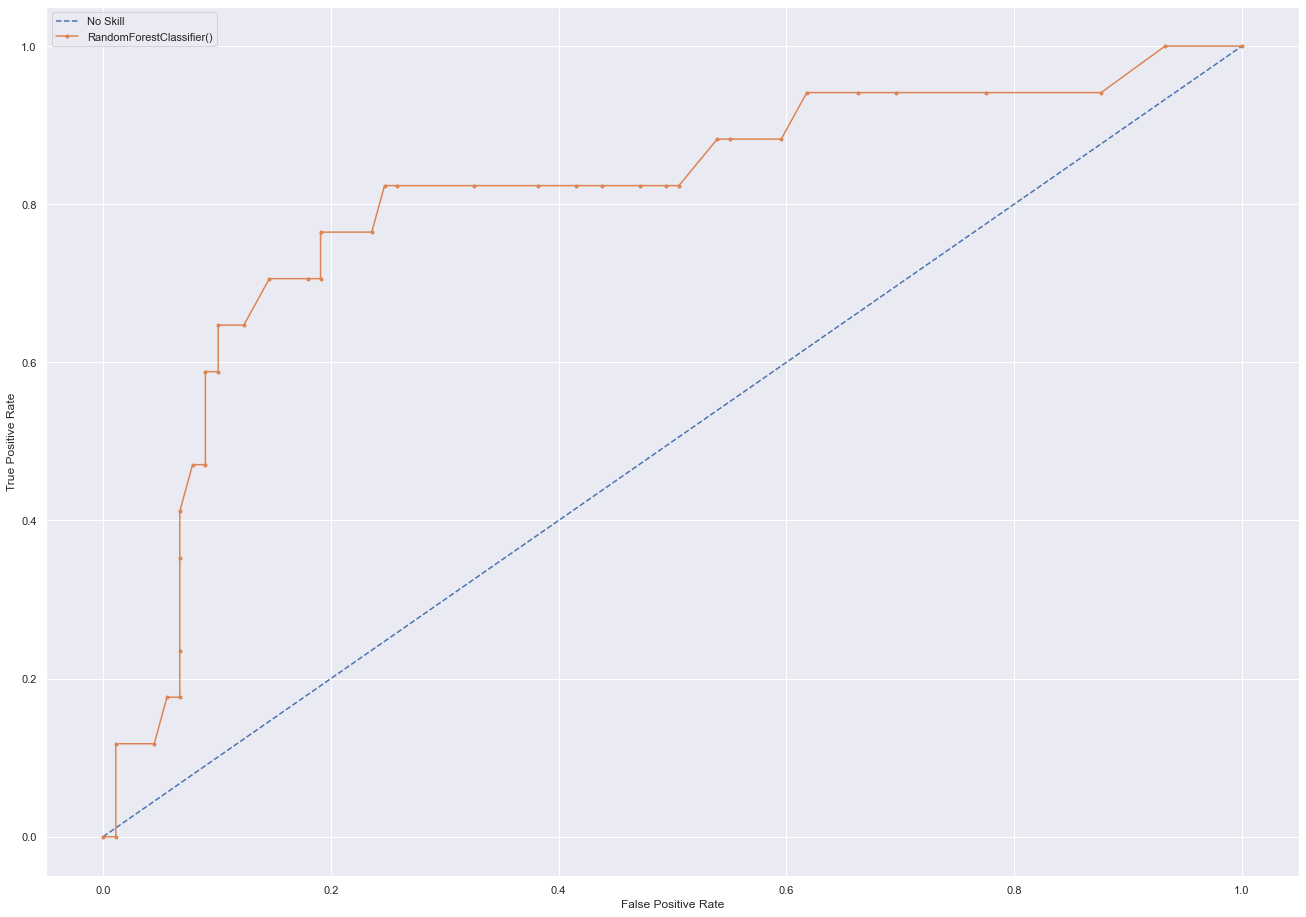

In [ ]:
#Test RandomForest model for RFE reduced dataset
cols_to_keep = importance_scale[importance_scale['RFE_ranking'] == 1].index
reduced_x_train = X_train[cols_to_keep]
reduced_x_validation = X_validation[cols_to_keep]

fitted_baseline_model_2_4, estimator_auc_2_4 = score_model(estimator=RandomForestClassifier(),
                                      train_data=(reduced_x_train, y_train),
                                      validation_data=(
                                          reduced_x_validation, y_validation),
                                      cv=10)


#### D.2.5 Hyperparameter Tuning

In [ ]:
# Define hyperparameter space
hyperparameter_grid = {
    'n_estimators': [10, 100, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2', None]
}


In [ ]:
# Perform hyperparameter tuning by grid searching the defined space
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=hyperparameter_grid,
                           scoring="roc_auc",
                           cv=10,
                           n_jobs=4,
                           verbose=1)

grid_search_results = grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 500}
Validation accuracy: %83.96
Validation ROC_AUC: %54.76
-----
No Skill: ROC AUC=%50.000
RandomForestClassifier: ROC AUC=%83.939


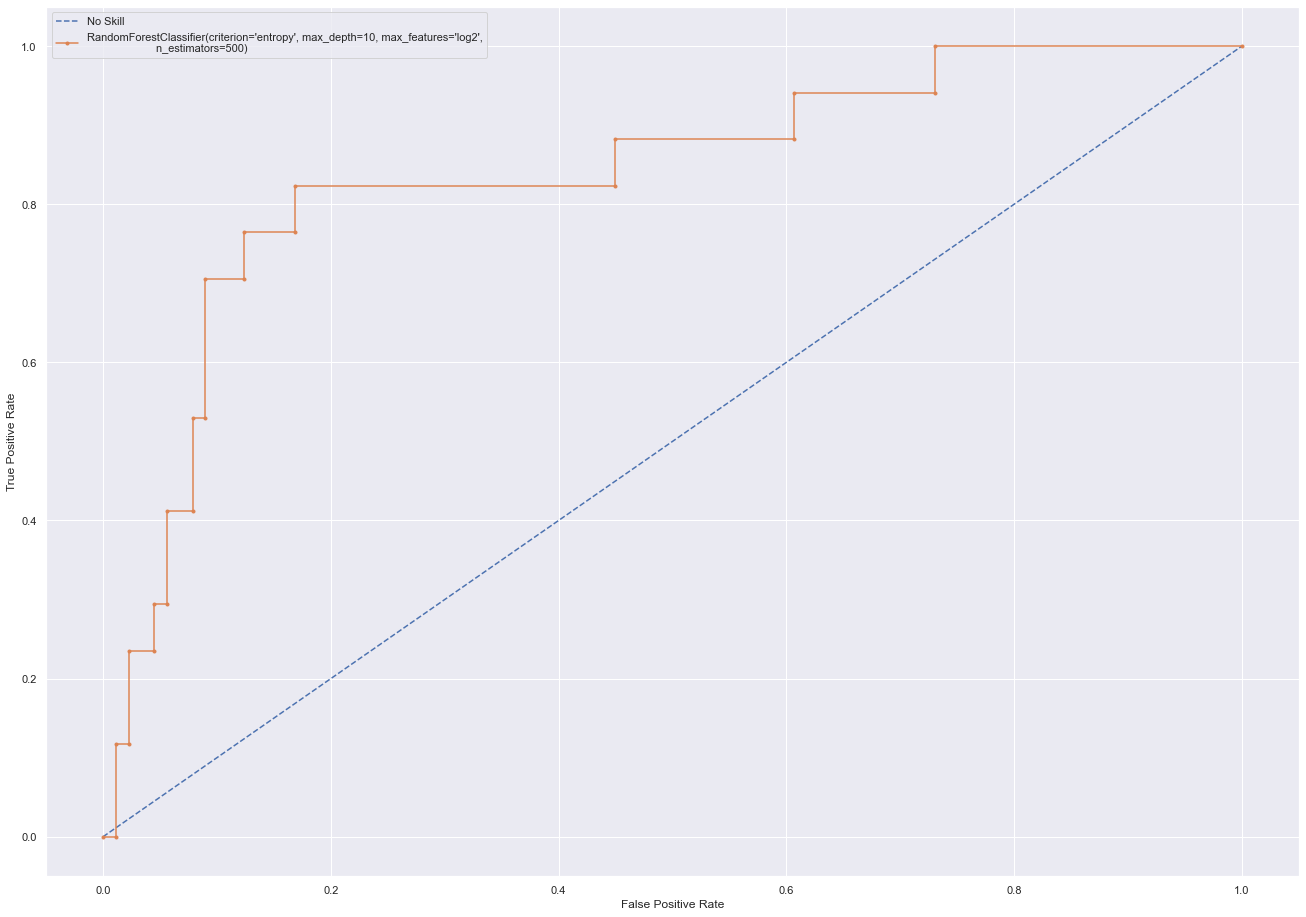

In [ ]:
# Look at the best performing set of hyperparameters and apply estimator on valdiation data
print(grid_search.best_params_)

best_gridsearch_model = grid_search.best_estimator_
best_gridsearch_model.fit(X_train, y_train)
y_pred = best_gridsearch_model.predict(X_validation)

print("Validation accuracy: %{:.2f}".format((accuracy_score(y_validation, y_pred))*100))
print("Validation ROC_AUC: %{:.2f}".format((roc_auc_score(y_validation, y_pred))*100))

# Generate a no skill prediction (majority class)
no_skill_probs = [0 for _ in range(len(y_validation))]

# predict probabilities
best_gridsearch_model_probs = best_gridsearch_model.predict_proba(X_validation)

# keep probabilities for the positive outcome only
best_gridsearch_model_probs = best_gridsearch_model_probs[:,1]

# calculate scores
no_skill_auc_2 = roc_auc_score(y_validation, no_skill_probs)
best_gridsearch_model_auc_2 = roc_auc_score(y_validation, best_gridsearch_model_probs)

print("-----")

# summarize scores
print('No Skill: ROC AUC=%{:.3f}'.format((no_skill_auc_2)*100))
print('RandomForestClassifier: ROC AUC=%{:.3f}'.format((best_gridsearch_model_auc_2)*100))

# calculate roc curves
no_skill_fpr, no_skill_tpr, _ = roc_curve(y_validation, no_skill_probs)
best_gridsearch_model_fpr, best_gridsearch_model_tpr, _ = roc_curve(y_validation, best_gridsearch_model_probs)

# plot the roc curve for the model
plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
plt.plot(best_gridsearch_model_fpr, best_gridsearch_model_tpr, marker='.', label=best_gridsearch_model)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()


### D.3 Data Modelling Between 6-12 Hours and After 12 Hours



Now we proceed into our second approach at trying to accurately determine which patients are going to the ICU. The idea is to take advantage of the time series aspect of the dataset.

Suppose a couple of ICU beds just became vacant (hopefully because their former occupants got better), and the medical staff wants to determine which of the current patients is more likely to take these spots. In this scenario, it would be wise to look at the most recent available data to do the assessment. However, if we are able see how these patients have progressed to their current state, a better decision could be made.

Given this rational, our idea is to use the data from the last 2 available time windows to predict ICU admission.

#### D.3.1 Preprocessing Data

In [ ]:
#Split features into time variant and time constant
features_df = pd.DataFrame(
    data=df_new.columns.values, columns=['Feature_name'])
features_df['Feature_group'] = [x[:-2] for x in features_df['Feature_name']]

features_df = features_df.join(on='Feature_group',
                               other=features_df.groupby(
                                   by='Feature_group').count(),
                               how='inner',
                               rsuffix='_count')

time_constant_features = features_df[features_df['Feature_name_count']
                                     == 1]['Feature_name'].values
time_variant_features = [
    x for x in features_df['Feature_name'] if x not in time_constant_features]

#time_constant_features = time_constant_features[time_constant_features != 'PATIENT_VISIT_IDENTIFIER_1']
time_constant_features = time_constant_features[time_constant_features != 'ICU']


In [ ]:
# Get all columns related to Window 2 and 3
data_3 = df_new.filter(regex="_4|_5")
df_list_3 = data_3.copy()

# Change the column names by using begin and end
new_col_names = {x: x[:-1] + 'end' if x[-1] ==
                 str(5) else x[:-1] + 'begin' for x in df_new.columns}

# rewrite the columns names to the dataframe
df_list_3 = df_list_3.rename(columns=new_col_names)


In [ ]:
df_new_3 = df_list_3.copy()
df_new_3

BLOODPRESSURE_DIASTOLIC_DIFF_begin  BLOODPRESSURE_DIASTOLIC_DIFF_end  \
0                             -0.339130                         -0.339130   
2                             -0.704348                         -0.547826   
3                             -1.000000                         -0.078261   
4                             -1.000000                         -0.478261   
5                             -1.000000                         -0.704348   
..                                  ...                               ...   
380                           -1.000000                         -0.530435   
381                           -1.000000                         -0.982609   
382                           -1.000000                         -0.408696   
383                           -1.000000                         -0.478261   
384                           -1.000000                         -0.652174   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_begin  \
0                                 -0.389967   
2                                 -0.658863   
3                                 -1.000000   
4                                 -1.000000   
5                                 -1.000000   
..                                      ...   
380                               -1.000000   
381                               -1.000000   
382                               -1.000000   
383                               -1.000000   
384                               -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_end  BLOODPRESSURE_DIASTOLIC_MAX_begin  \
0                               -0.389967                          -0.076923   
2                               -0.612422                          -0.572650   
3                               -0.308696                          -0.589744   
4                               -0.652174                          -0.247863   
5                               -0.758651                          -0.418803   
..                                    ...                                ...   
380                             -0.505721                          -0.418803   
381                             -0.982609                          -0.589744   
382                             -0.513996                          -0.299145   
383                             -0.552795                          -0.418803   
384                             -0.701863                          -0.162393   

     BLOODPRESSURE_DIASTOLIC_MAX_end  BLOODPRESSURE_DIASTOLIC_MEAN_begin  \
0                          -0.076923                           -0.243021   
2                          -0.247863                           -0.612654   
3                           0.145299                           -0.407407   
4                           0.094017                            0.086420   
5                          -0.179487                           -0.160494   
..                               ...                                 ...   
380                        -0.572650                           -0.160494   
381                        -0.572650                           -0.407407   
382                        -0.145299                            0.012346   
383                        -0.076923                           -0.160494   
384                        -0.247863                            0.209877   

     BLOODPRESSURE_DIASTOLIC_MEAN_end  BLOODPRESSURE_DIASTOLIC_MEDIAN_begin  \
0                           -0.243021                             -0.283951   
2                           -0.181070                             -0.604938   
3                           -0.002798                             -0.407407   
4                            0.290762                              0.086420   
5                           -0.037037                             -0.160494   
..                                ...                                   ...   
380                         -0.550154                             -0.160494   
381      

In [ ]:
# Merge time variant and time constant features together
df_new_3 = df_new_3.join(other = df_new[time_constant_features],how = "inner")
df_new_3.head()

BLOODPRESSURE_DIASTOLIC_DIFF_begin  BLOODPRESSURE_DIASTOLIC_DIFF_end  \
0                           -0.339130                         -0.339130   
2                           -0.704348                         -0.547826   
3                           -1.000000                         -0.078261   
4                           -1.000000                         -0.478261   
5                           -1.000000                         -0.704348   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL_begin  \
0                               -0.389967   
2                               -0.658863   
3                               -1.000000   
4                               -1.000000   
5                               -1.000000   

   BLOODPRESSURE_DIASTOLIC_DIFF_REL_end  BLOODPRESSURE_DIASTOLIC_MAX_begin  \
0                             -0.389967                          -0.076923   
2                             -0.612422                          -0.572650   
3                             -0.308696                          -0.589744   
4                             -0.652174                          -0.247863   
5                             -0.758651                          -0.418803   

   BLOODPRESSURE_DIASTOLIC_MAX_end  BLOODPRESSURE_DIASTOLIC_MEAN_begin  \
0                        -0.076923                           -0.243021   
2                        -0.247863                           -0.612654   
3                         0.145299                           -0.407407   
4                         0.094017                            0.086420   
5                        -0.179487                           -0.160494   

   BLOODPRESSURE_DIASTOLIC_MEAN_end  BLOODPRESSURE_DIASTOLIC_MEDIAN_begin  \
0                         -0.243021                             -0.283951   
2                         -0.181070                             -0.604938   
3                         -0.002798                             -0.407407   
4                          0.290762                              0.086420   
5                         -0.037037                             -0.160494   

   BLOODPRESSURE_DIASTOLIC_MEDIAN_end  BLOODPRESSURE_DIASTOLIC_MIN_begin  \
0                           -0.283951                          -0.340206   
2                           -0.160494                          -0.505155   
3                            0.086420                          -0.175258   
4                            0.333333                           0.237113   
5                           -0.074074                           0.030928   

   BLOODPRESSURE_DIASTOLIC_MIN_end  BLOODPRESSURE_SISTOLIC_DIFF_begin  \
0                        -0.340206                           0.325153   
2                        -0.298969                          -0.693252   
3                        -0.381443                          -1.000000   
4                         0.030928                          -1.000000   
5                        -0.030928                          -1.000000   

   BLOODPRESSURE_SISTOLIC_DIFF_end  BLOODPRESSURE_SISTOLIC_DIFF_REL_begin  \
0                         0.325153                               0.407558   
2                        -0.435583                              -0.563758   
3                        -0.190184                              -1.000000   
4                        -0.558282                              -1.000000   
5                        -0.705521                              -1.000000   

   BLOODPRESSURE_SISTOLIC_DIFF_REL_end  BLOODPRESSURE_SISTOLIC_MAX_begin  \
0                             0.407558                          0.286486   
2                            -0.343258                         -0.762162   
3                            -0.057718                         -0.675676   
4                            -0.596165                         -0.351351   
5                            -0.683267                         -0.675676   

   BLOODPRESSURE_SISTOLIC_MAX_end  BLOODPRESSURE_SISTOLIC_MEAN_begin  \
0               

In [ ]:
# Get the window and ICU of each patients
df_new_3 = df_new_3.join(other=admission_data.set_index('PATIENT_VISIT_IDENTIFIER').drop(columns="ICU"),
                         on='PATIENT_VISIT_IDENTIFIER_1',
                         how='inner')


In [ ]:
# Get the CIU information for the specific time interval
df_new_3 = df_new_3.join(other = ICU_col_values.set_index("PATIENT_VISIT_IDENTIFIER_1"),
                         on = "PATIENT_VISIT_IDENTIFIER_1",
                         how = "inner")

In [ ]:
# Mask the patient data when ICU equals to 1 in Window 0-2
# Can't be used in the modelling
mask_unreliable3 = (df_new_3['WINDOW'] == "0-2") & (df_new_3['ICU_1'] == 1)
df_new_3 = df_new_3.loc[~mask_unreliable3]

# Mask the patient data when ICU equals to 1 in Window 2-4
# Can't be used in the modelling
mask_unreliable4 = (df_new_3['WINDOW'] == "2-4") & (df_new_3['ICU_1'] == 1)
df_new_3 = df_new_3.loc[~mask_unreliable4]

# Mask the patient data when ICU equals to 1 in Window 4-6
# Can't be used in the modelling
mask_unreliable5 = (df_new_3['WINDOW'] == "4-6") & (df_new_3['ICU_1'] == 1)
df_new_3 = df_new_3.loc[~mask_unreliable5]


In [ ]:
# Remove Patient ID
df_new_3.drop(columns=["PATIENT_VISIT_IDENTIFIER_1"], inplace=True)


In [ ]:
df_new_3["ICU"] = df_new_3[["ICU_4", "ICU_5"]].max(axis=1)


In [ ]:
df_new_3.drop(columns=["ICU_1", "ICU_2", "ICU_3",
              "ICU_4", "ICU_5"], inplace=True)


In [ ]:
df_new_3["WINDOW"] = df_new_3["WINDOW"].replace({"0-2": "1",
                                                 "2-4": "2",
                                                 "4-6": "3",
                                                 "6-12": "4",
                                                 "ABOVE_12": "5"})


In [ ]:
df_new_3["WINDOW"] = df_new_3["WINDOW"].fillna("0")


In [ ]:
# The Last Data after Preprocessing
df_new_3

BLOODPRESSURE_DIASTOLIC_DIFF_begin  BLOODPRESSURE_DIASTOLIC_DIFF_end  \
0                             -0.339130                         -0.339130   
2                             -0.704348                         -0.547826   
3                             -1.000000                         -0.078261   
4                             -1.000000                         -0.478261   
5                             -1.000000                         -0.704348   
..                                  ...                               ...   
380                           -1.000000                         -0.530435   
381                           -1.000000                         -0.982609   
382                           -1.000000                         -0.408696   
383                           -1.000000                         -0.478261   
384                           -1.000000                         -0.652174   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_begin  \
0                                 -0.389967   
2                                 -0.658863   
3                                 -1.000000   
4                                 -1.000000   
5                                 -1.000000   
..                                      ...   
380                               -1.000000   
381                               -1.000000   
382                               -1.000000   
383                               -1.000000   
384                               -1.000000   

     BLOODPRESSURE_DIASTOLIC_DIFF_REL_end  BLOODPRESSURE_DIASTOLIC_MAX_begin  \
0                               -0.389967                          -0.076923   
2                               -0.612422                          -0.572650   
3                               -0.308696                          -0.589744   
4                               -0.652174                          -0.247863   
5                               -0.758651                          -0.418803   
..                                    ...                                ...   
380                             -0.505721                          -0.418803   
381                             -0.982609                          -0.589744   
382                             -0.513996                          -0.299145   
383                             -0.552795                          -0.418803   
384                             -0.701863                          -0.162393   

     BLOODPRESSURE_DIASTOLIC_MAX_end  BLOODPRESSURE_DIASTOLIC_MEAN_begin  \
0                          -0.076923                           -0.243021   
2                          -0.247863                           -0.612654   
3                           0.145299                           -0.407407   
4                           0.094017                            0.086420   
5                          -0.179487                           -0.160494   
..                               ...                                 ...   
380                        -0.572650                           -0.160494   
381                        -0.572650                           -0.407407   
382                        -0.145299                            0.012346   
383                        -0.076923                           -0.160494   
384                        -0.247863                            0.209877   

     BLOODPRESSURE_DIASTOLIC_MEAN_end  BLOODPRESSURE_DIASTOLIC_MEDIAN_begin  \
0                           -0.243021                             -0.283951   
2                           -0.181070                             -0.604938   
3                           -0.002798                             -0.407407   
4                            0.290762                              0.086420   
5                           -0.037037                             -0.160494   
..                                ...                                   ...   
380                         -0.550154                             -0.160494   
381      

We finally have it. Our dataset has been constructed in such a way that all the _end features represent the data from the 4th and 5th available time window. Additionally, the _begin attribute are related to the imediatelly previous window. As for the time constant features, they can be identified by the _1 sufix.

#### D.3.2 Correlations

Text(0.5, 1.0, 'Distribution of Pearson correlation coefficient with respect to WINDOW 4-5')

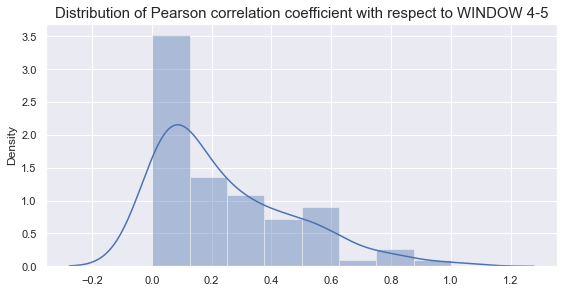

In [ ]:
#Define feature groups to investigate and compute pearson correlation
cols_to_investigate = np.unique(
    [x for x in df_new_3.columns if x.split('_')[-1] in ('end', 'begin')])

df_new_3_corr = df_new_3[np.append(cols_to_investigate, 'ICU')].corr()[
    'ICU']
df_new_3_corr = abs(df_new_3_corr)

plt.figure(figsize=(8, 4))
sns.distplot(df_new_3_corr.values)
plt.tight_layout()
plt.title('Distribution of Pearson correlation coefficient with respect to WINDOW 4-5', fontsize=15)


In [ ]:
#Rank feature correlations
df_new_3_corr = rank_correlation_score(df_new_3)
df_new_3_corr = df_new_3_corr[df_new_3_corr['Pearson_Correlation'] < 1]
df_new_3_corr


Feature_1                         Feature_2  \
4931             OXYGEN_SATURATION_DIFF_end    OXYGEN_SATURATION_DIFF_REL_end   
7070                 TEMPERATURE_DIFF_begin        TEMPERATURE_DIFF_REL_begin   
7163                   TEMPERATURE_DIFF_end          TEMPERATURE_DIFF_REL_end   
4838           OXYGEN_SATURATION_DIFF_begin  OXYGEN_SATURATION_DIFF_REL_begin   
5123         OXYGEN_SATURATION_DIFF_REL_end         OXYGEN_SATURATION_MIN_end   
...                                     ...                               ...   
1056        BLOODPRESSURE_DIASTOLIC_MIN_end           HEART_RATE_MEDIAN_begin   
1318  BLOODPRESSURE_SISTOLIC_DIFF_REL_begin          DISEASE GROUPING 4_begin   
3294                 DISEASE GROUPING 6_end        RESPIRATORY_RATE_MIN_begin   
795    BLOODPRESSURE_DIASTOLIC_MEDIAN_begin        OXYGEN_SATURATION_MEAN_end   
4593                  IMMUNOCOMPROMISED_end            TEMPERATURE_MEDIAN_end   

      Pearson_Correlation  
4931             0.999854  
7070             0.999763  
7163             0.999688  
4838             0.999666  
5123             0.998408  
...                   ...  
1056             0.000189  
1318             0.000127  
3294             0.000036  
795              0.000014  
4593             0.000012  

[4095 rows x 3 columns]

In [ ]:
df_new_3_corr[df_new_3_corr["Pearson_Correlation"] >= 0.9]


Feature_1  \
4931              OXYGEN_SATURATION_DIFF_end   
7070                  TEMPERATURE_DIFF_begin   
7163                    TEMPERATURE_DIFF_end   
4838            OXYGEN_SATURATION_DIFF_begin   
5123          OXYGEN_SATURATION_DIFF_REL_end   
4939              OXYGEN_SATURATION_DIFF_end   
1118       BLOODPRESSURE_SISTOLIC_DIFF_begin   
3908                   HEART_RATE_MEAN_begin   
3350                   HEART_RATE_DIFF_begin   
5954             RESPIRATORY_RATE_DIFF_begin   
2         BLOODPRESSURE_DIASTOLIC_DIFF_begin   
1676       BLOODPRESSURE_SISTOLIC_MEAN_begin   
6047               RESPIRATORY_RATE_DIFF_end   
6049               RESPIRATORY_RATE_DIFF_end   
4001                     HEART_RATE_MEAN_end   
7628                  TEMPERATURE_MEAN_begin   
5396            OXYGEN_SATURATION_MEAN_begin   
1211         BLOODPRESSURE_SISTOLIC_DIFF_end   
560       BLOODPRESSURE_DIASTOLIC_MEAN_begin   
1769         BLOODPRESSURE_SISTOLIC_MEAN_end   
6512             RESPIRATORY_RATE_MEAN_begin   
5030        OXYGEN_SATURATION_DIFF_REL_begin   
4846            OXYGEN_SATURATION_DIFF_begin   
95          BLOODPRESSURE_DIASTOLIC_DIFF_end   
653         BLOODPRESSURE_DIASTOLIC_MEAN_end   
6233           RESPIRATORY_RATE_DIFF_REL_end   
7721                    TEMPERATURE_MEAN_end   
3443                     HEART_RATE_DIFF_end   
6605               RESPIRATORY_RATE_MEAN_end   
4465                 IMMUNOCOMPROMISED_begin   
198   BLOODPRESSURE_DIASTOLIC_DIFF_REL_begin   
14        BLOODPRESSURE_DIASTOLIC_DIFF_begin   
196   BLOODPRESSURE_DIASTOLIC_DIFF_REL_begin   
12        BLOODPRESSURE_DIASTOLIC_DIFF_begin   

                                   Feature_2  Pearson_Correlation  
4931          OXYGEN_SATURATION_DIFF_REL_end             0.999854  
7070              TEMPERATURE_DIFF_REL_begin             0.999763  
7163                TEMPERATURE_DIFF_REL_end             0.999688  
4838        OXYGEN_SATURATION_DIFF_REL_begin             0.999666  
5123               OXYGEN_SATURATION_MIN_end             0.998408  
4939               OXYGEN_SATURATION_MIN_end             0.998348  
1118   BLOODPRESSURE_SISTOLIC_DIFF_REL_begin             0.993447  
3908                 HEART_RATE_MEDIAN_begin             0.992060  
3350               HEART_RATE_DIFF_REL_begin             0.990654  
5954         RESPIRATORY_RATE_DIFF_REL_begin             0.988757  
2     BLOODPRESSURE_DIASTOLIC_DIFF_REL_begin             0.988013  
1676     BLOODPRESSURE_SISTOLIC_MEDIAN_begin             0.987930  
6047           RESPIRATORY_RATE_DIFF_REL_end             0.985454  
6049                RESPIRATORY_RATE_MAX_end             0.981427  
4001                   HEART_RATE_MEDIAN_end             0.981328  
7628                TEMPERATURE_MEDIAN_begin             0.978362  
5396          OXYGEN_SATURATION_MEDIAN_begin             0.977681  
1211     BLOODPRESSURE_SISTOLIC_DIFF_REL_end             0.977447  
560     BLOODPRESSURE_DIASTOLIC_MEDIAN_begin             0.977289  
1769       BLOODPRESSURE_SISTOLIC_MEDIAN_end             0.973617  
6512           RESPIRATORY_RATE_MEDIAN_begin             0.972227  
5030             OXYGEN_SATURATION_MIN_begin             0.971585  
4846             OXYGEN_SATURATION_MIN_begin             0.970826  
95      BLOODPRESSURE_DIASTOLIC_DIFF_REL_end             0.968276  
653       BLOODPRESSURE_DIASTOLIC_MEDIAN_end             0.964408  
6233                RESPIRATORY_RATE_MAX_end             0.960986  
7721                  TEMPERATURE_MEDIAN_end             0.945335  
3443                 HEART_RATE_DIFF_REL_end             0.944526  
6605             RESPIRATORY_RATE_MEDIAN_end             0.935429  
4465                   IMMUNOCOMPROMISED_end             0.930425  
198    BLOODPRESSURE_SISTOLIC_DIFF_REL_begin             0.917134  
14     BLOODPRESSURE_SISTOLIC_DIFF_REL_begin             0.910368  
196        BLOODPRESSURE_SISTOLIC_DIFF_begin             0.910124  
12         BLOODPRESSURE_SISTOLIC_DIFF_beg

#### D.3.3 Feature Encoding

In [ ]:
# Encode remaining categorical feature
df_new_3 = encode_feature(df_new_3, "AGE_PERCENTIL_1")

#### D.3.4 Data Modelling

##### D.3.4.1 KNN Modelling

CV model accuracy:  %85.73 +/- %6.12
CV model roc_auc:  %92.12 +/- %5.15
Validation accuracy score: %84.91
Validation ROC_AUC score: %84.91
--------
No Skill: ROC AUC=%50.000
KNeighborsClassifier(): ROC AUC=%96.280


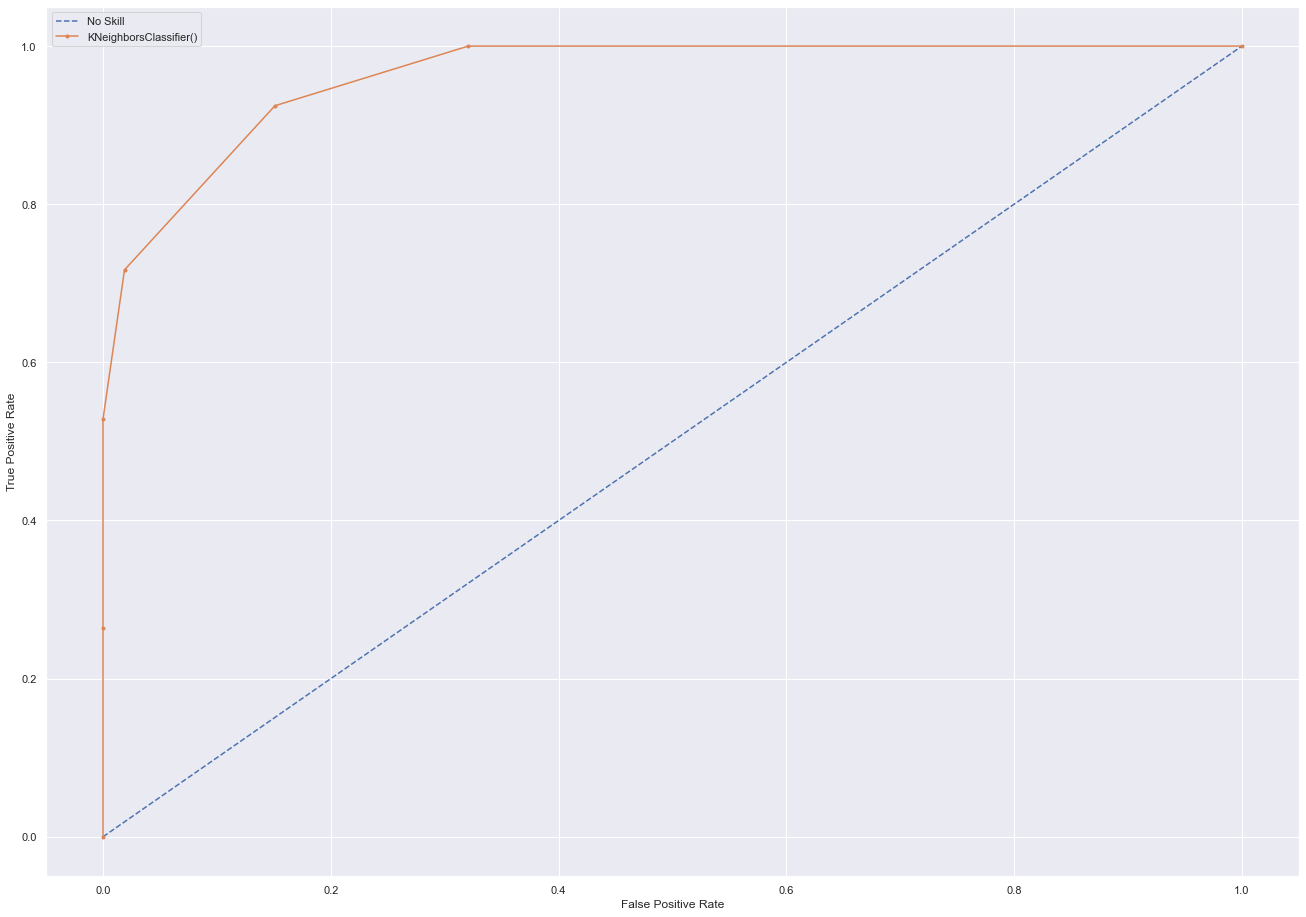

In [ ]:
# Split dataset into training and validation
np.random.seed(200)

feature_cols = df_new_3.drop(columns=["ICU", "WINDOW"]).columns.values

X = df_new_3[feature_cols]
y = df_new_3["ICU"]

X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.3, shuffle=True)

#Compute score for a KNN model
fitted_baseline_model_3_1, estimator_auc_3_1 = score_model(estimator=KNN(),
                                      train_data=(X_train, y_train),
                                      validation_data=(
                                          X_validation, y_validation),
                                      cv=10)


##### D.3.4.1 RandomForestClassifier Modelling

CV model accuracy:  %91.48 +/- %2.94
CV model roc_auc:  %97.77 +/- %1.71
Validation accuracy score: %95.28
Validation ROC_AUC score: %95.10
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%98.253


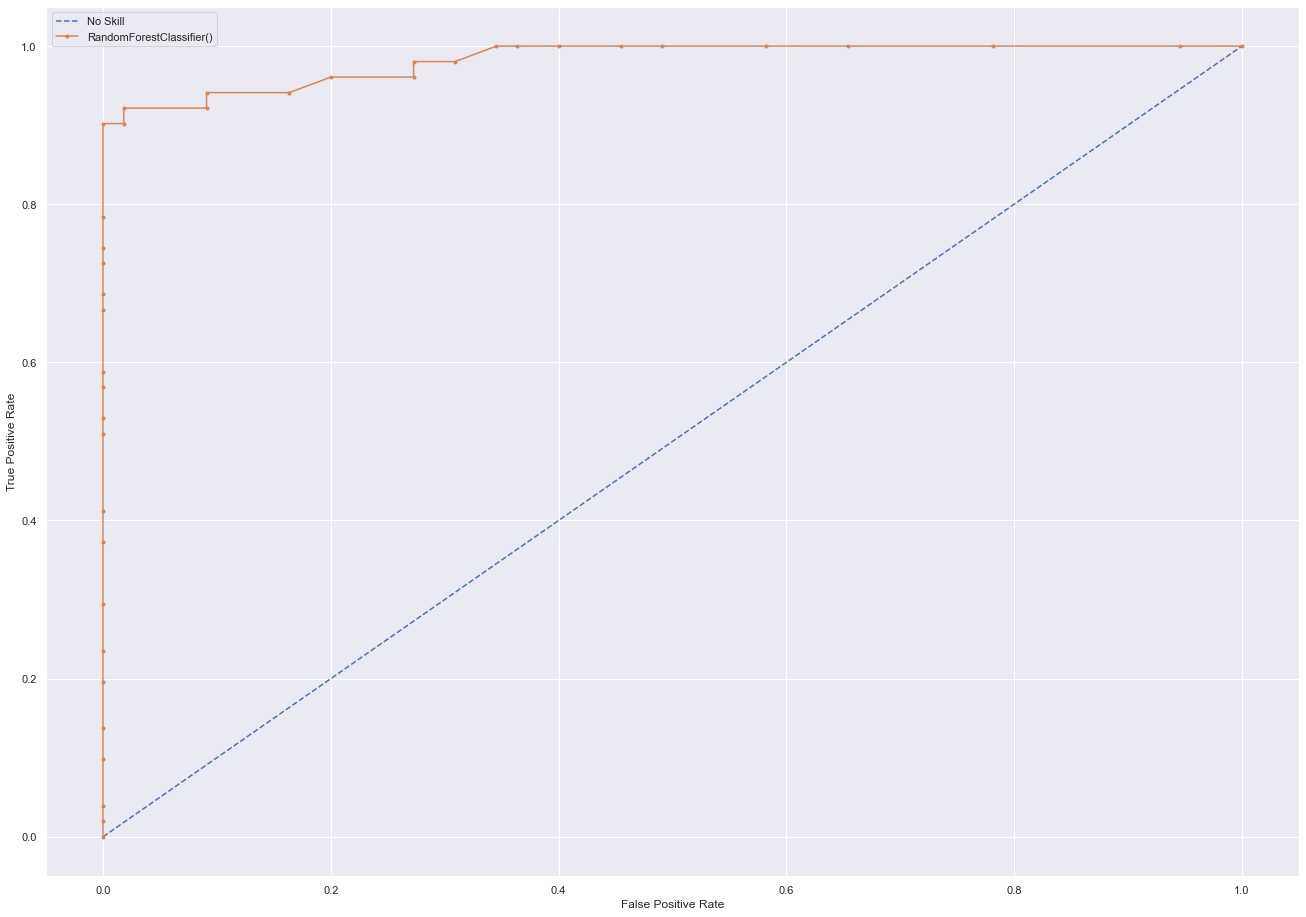

In [ ]:
# Split dataset into training and validation
np.random.seed(10)

feature_cols = df_new_3.drop(columns=["ICU", "WINDOW"]).columns.values

X = df_new_3[feature_cols]
y = df_new_3["ICU"]

X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.3, shuffle=True)

# Cross - validate baseline model
baseline_model = RandomForestClassifier()
fitted_baseline_model_3_2, estimator_auc_3_2 = score_model(estimator=baseline_model,
                                        train_data=(X_train, y_train),
                                        validation_data=(
                                            X_validation, y_validation),
                                        cv=5)


CV model accuracy:  %93.48 +/- %3.74
CV model roc_auc:  %97.35 +/- %2.95
Validation accuracy score: %92.45
Validation ROC_AUC score: %92.30
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%97.362


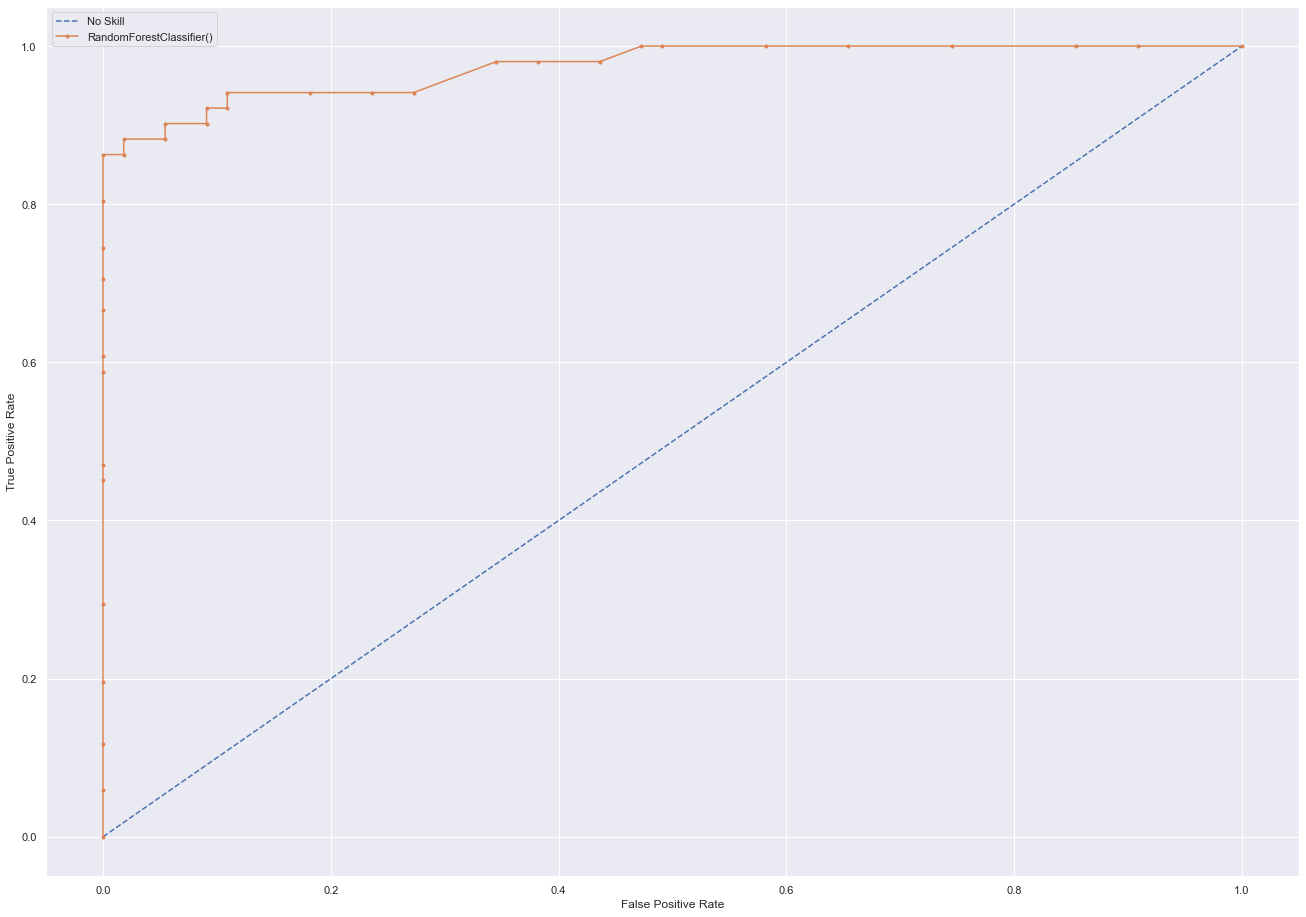

In [ ]:
#Compute baseline model score for a different random seed
np.random.seed(100)

X = df_new_3[feature_cols]
y = df_new_3["ICU"]

X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.3, shuffle=True)

fitted_baseline_model_3_3, estimator_auc_3_3 = score_model(estimator=RandomForestClassifier(),
                                        train_data=(X_train, y_train),
                                        validation_data=(
    X_validation, y_validation),
    cv=10)


#### D.3.5 Feature Selection

<AxesSubplot:>

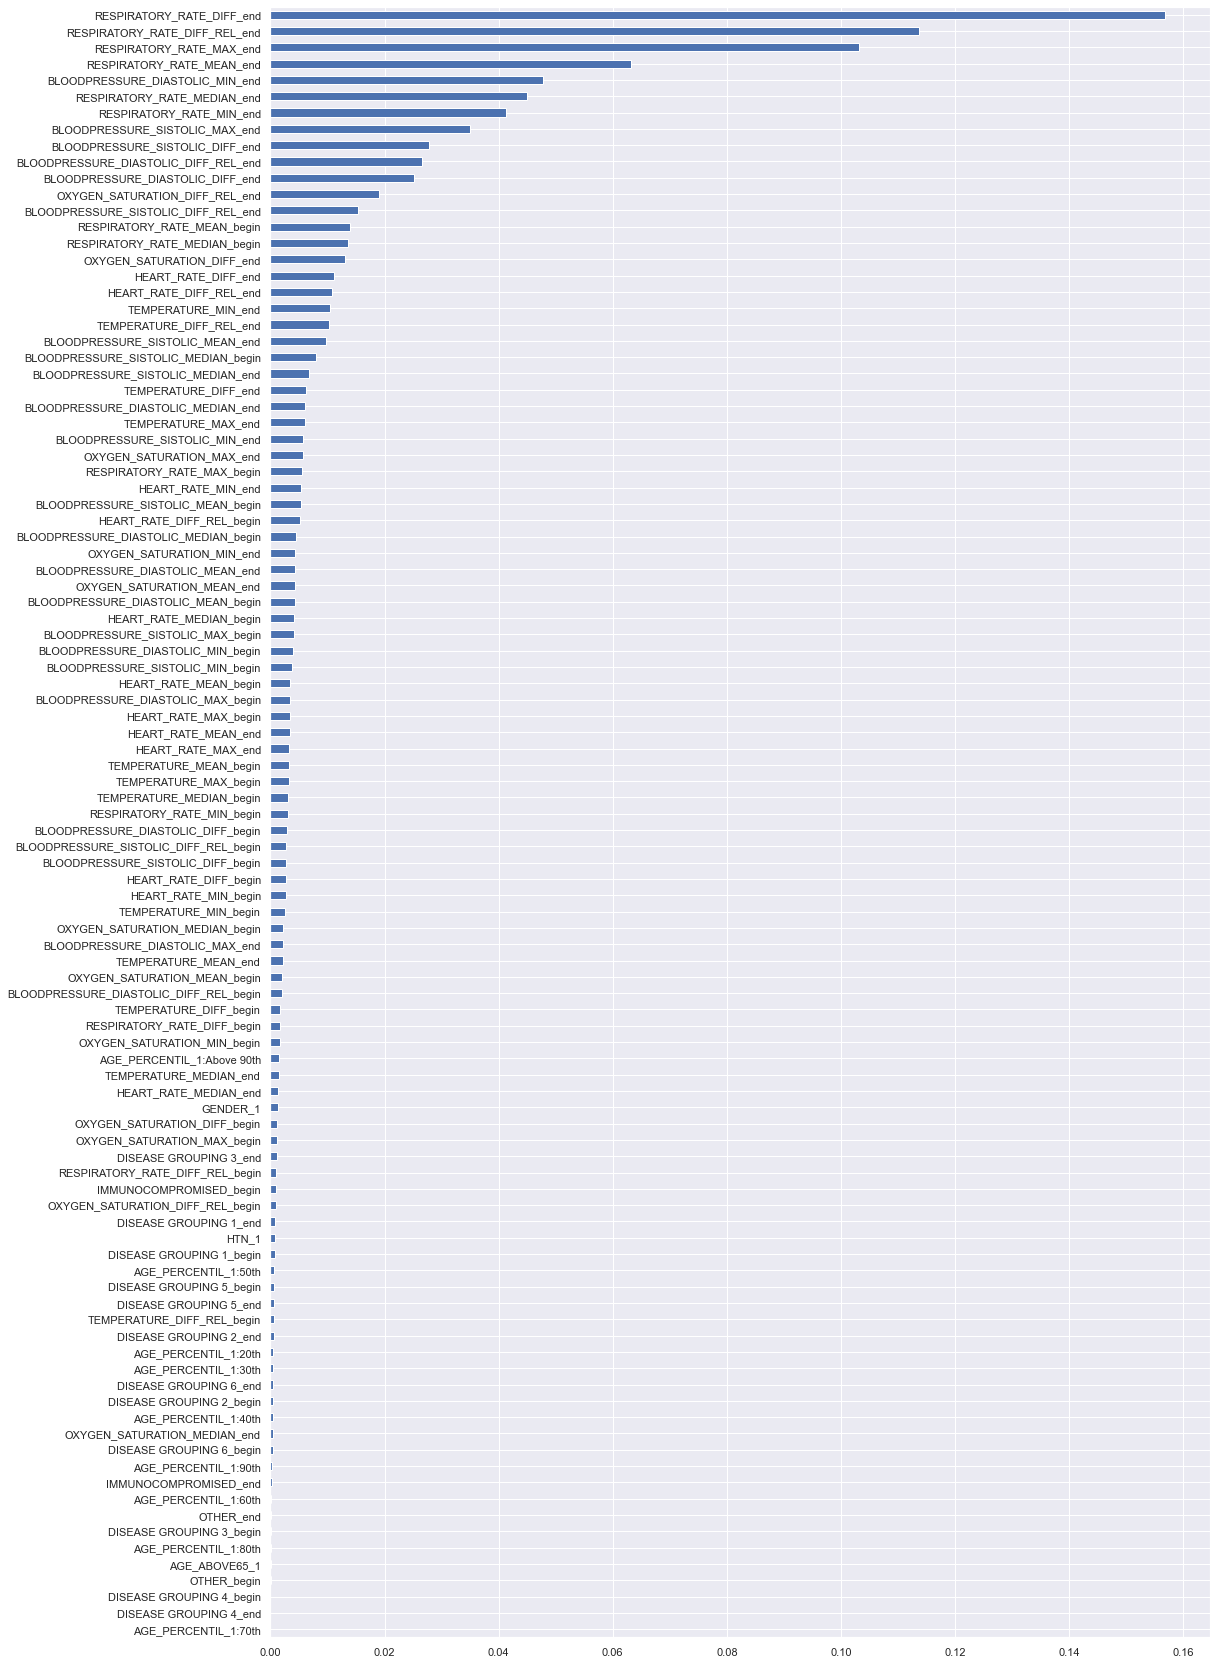

In [ ]:
# Plot feature importance for the Random Forest Model
feat_importances = pd.Series(data=fitted_baseline_model_3_3.feature_importances_,
                             index=feature_cols).sort_values()
feat_importances.plot(kind="barh", figsize=(15, 30))


In [ ]:
#Get RFE feature ranking and compare to RandomForestClassifier feature importance
rfe_model = RandomForestClassifier(n_estimators=10)
feature_selector = RFE(estimator=rfe_model, step=1)
feature_selector.fit(X_train, y_train)
feature_ranking = pd.Series(
    data=feature_selector.ranking_, index=feature_cols).sort_values()

importance_scale = pd.concat(
    [feature_ranking, feat_importances.rank(ascending=False)], axis=1)
importance_scale = importance_scale.rename(
    columns={0: 'RFE_ranking', 1: 'RFC_ranking'})
importance_scale.sort_values(by=['RFE_ranking', 'RFC_ranking'])


RFE_ranking  RFC_ranking
RESPIRATORY_RATE_DIFF_end                     1          1.0
RESPIRATORY_RATE_DIFF_REL_end                 1          2.0
RESPIRATORY_RATE_MAX_end                      1          3.0
RESPIRATORY_RATE_MEAN_end                     1          4.0
BLOODPRESSURE_DIASTOLIC_MIN_end               1          5.0
...                                         ...          ...
IMMUNOCOMPROMISED_begin                      47         73.0
IMMUNOCOMPROMISED_end                        48         91.0
AGE_PERCENTIL_1:Above 90th                   49         65.0
OTHER_begin                                  50         97.0
BLOODPRESSURE_DIASTOLIC_DIFF_begin           51         51.0

[100 rows x 2 columns]

CV model accuracy:  %94.72 +/- %4.47
CV model roc_auc:  %97.85 +/- %2.15
Validation accuracy score: %91.51
Validation ROC_AUC score: %91.39
--------
No Skill: ROC AUC=%50.000
RandomForestClassifier(): ROC AUC=%97.077


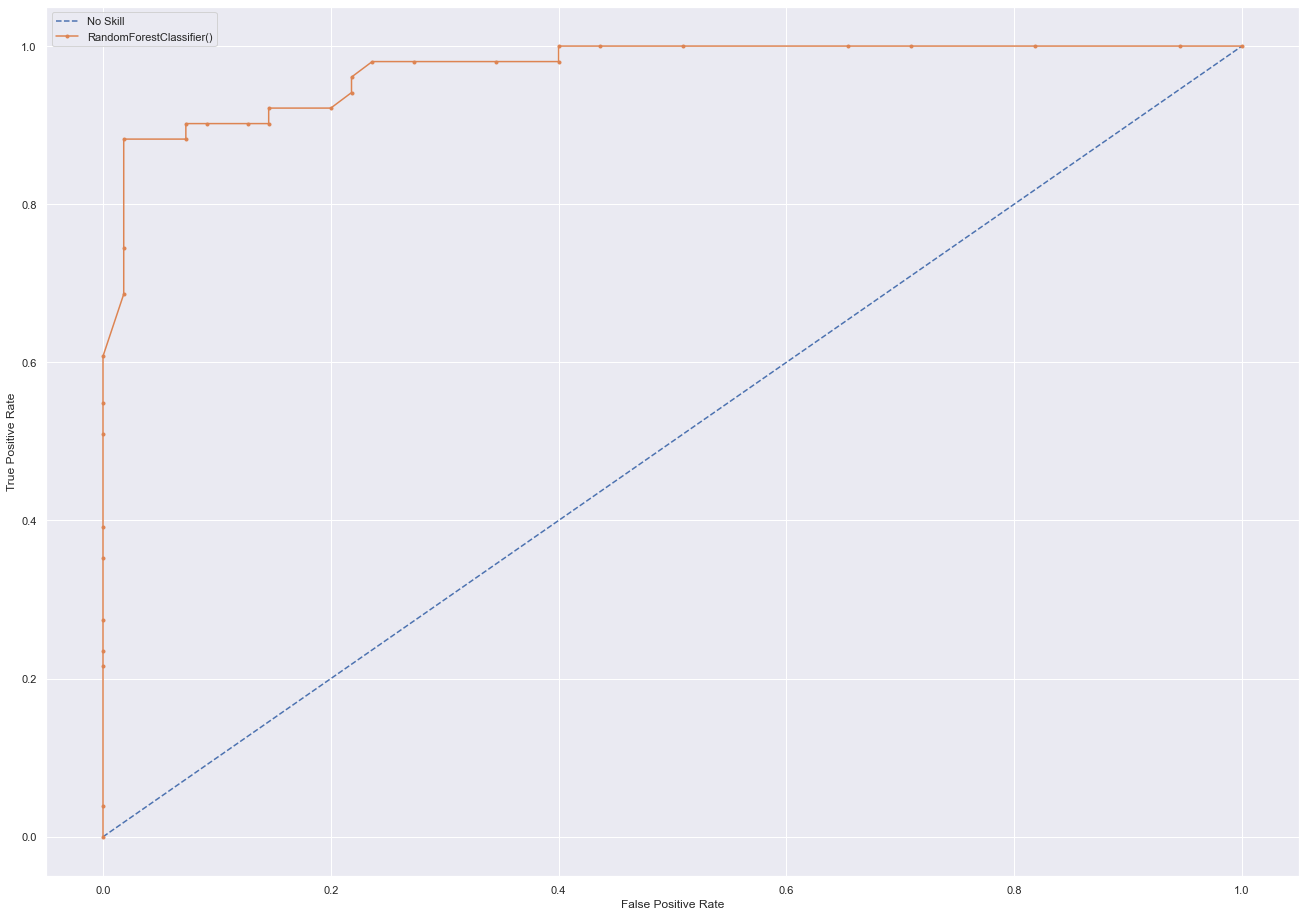

In [ ]:
#Test RandomForest model for RFE reduced dataset
cols_to_keep = importance_scale[importance_scale['RFE_ranking'] == 1].index
reduced_x_train = X_train[cols_to_keep]
reduced_x_validation = X_validation[cols_to_keep]

fitted_baseline_model_3_4, estimator_auc_3_4 = score_model(estimator=RandomForestClassifier(),
                                        train_data=(reduced_x_train, y_train),
                                        validation_data=(
    reduced_x_validation, y_validation),
    cv=10)


#### D.3.5 Hyperparameter Tuning

In [ ]:
# Define hyperparameter space
hyperparameter_grid = {
    'n_estimators': [10, 100, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'max_features': ['sqrt', 'log2', None]
}


In [ ]:
# Perform hyperparameter tuning by grid searching the defined space
grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=hyperparameter_grid,
                           scoring="roc_auc",
                           cv=10,
                           n_jobs=4,
                           verbose=1)

grid_search_results = grid_search.fit(X_train, y_train)


Fitting 10 folds for each of 72 candidates, totalling 720 fits


{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 100}
Validation accuracy: %92.45
Validation ROC_AUC: %92.30
-----
No Skill: ROC AUC=%50.000
RandomForestClassifier: ROC AUC=%97.629


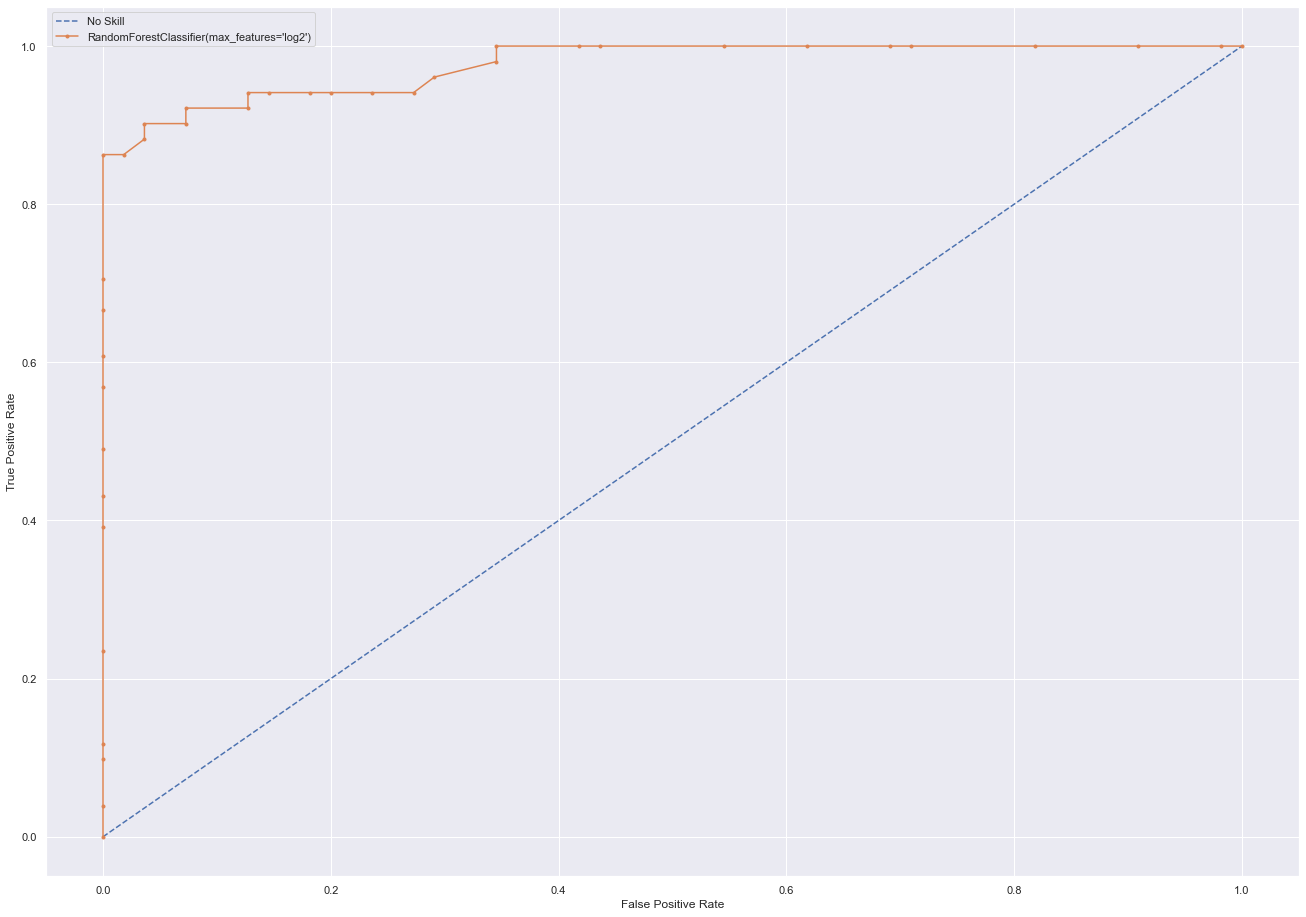

In [ ]:
# Look at the best performing set of hyperparameters and apply estimator on valdiation data
print(grid_search.best_params_)

best_gridsearch_model = grid_search.best_estimator_
best_gridsearch_model.fit(X_train, y_train)
y_pred = best_gridsearch_model.predict(X_validation)

print("Validation accuracy: %{:.2f}".format((accuracy_score(y_validation, y_pred))*100))
print("Validation ROC_AUC: %{:.2f}".format((roc_auc_score(y_validation, y_pred))*100))

# Generate a no skill prediction (majority class)
no_skill_probs = [0 for _ in range(len(y_validation))]

# predict probabilities
best_gridsearch_model_probs = best_gridsearch_model.predict_proba(X_validation)

# keep probabilities for the positive outcome only
best_gridsearch_model_probs = best_gridsearch_model_probs[:,1]

# calculate scores
no_skill_auc_3 = roc_auc_score(y_validation, no_skill_probs)
best_gridsearch_model_auc_3 = roc_auc_score(y_validation, best_gridsearch_model_probs)

print("-----")

# summarize scores
print('No Skill: ROC AUC=%{:.3f}'.format((no_skill_auc_3)*100))
print('RandomForestClassifier: ROC AUC=%{:.3f}'.format((best_gridsearch_model_auc_3)*100))

# calculate roc curves
no_skill_fpr, no_skill_tpr, _ = roc_curve(y_validation, no_skill_probs)
best_gridsearch_model_fpr, best_gridsearch_model_tpr, _ = roc_curve(y_validation, best_gridsearch_model_probs)

# plot the roc curve for the model
plt.plot(no_skill_fpr, no_skill_tpr, linestyle='--', label='No Skill')
plt.plot(best_gridsearch_model_fpr, best_gridsearch_model_tpr, marker='.', label=best_gridsearch_model)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()

# show the plot
plt.show()


## E. EVALUATION

### COMPARISON ACCURACY FOR EACH MODELLING

#### WINDOW 1 INTERVAL (0-2 Hours)

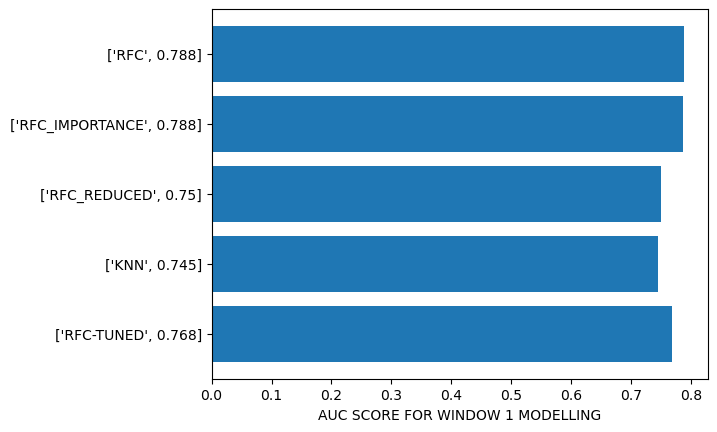

In [ ]:
plt.rcdefaults()
fig,ax = plt.subplots()

# Example data
models = (['RFC', round(estimator_auc_1_2, 3)], 
          ['RFC_IMPORTANCE', round(estimator_auc_1_3, 3)],
          ['RFC_REDUCED', round(estimator_auc_1_4, 3)], 
          ['KNN', round(estimator_auc_1_1, 3)],
          ['RFC-TUNED', round(best_gridsearch_model_auc_1, 3)])
y_pos = np.arange(5)

performance = np.array([estimator_auc_1_2, 
                        estimator_auc_1_3,
                        estimator_auc_1_4,
                        estimator_auc_1_1,
                        best_gridsearch_model_auc_1])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('AUC SCORE FOR WINDOW 1 MODELLING')

plt.show()


#### WINDOW 2-3 INTERVAL (2-6 Hours)

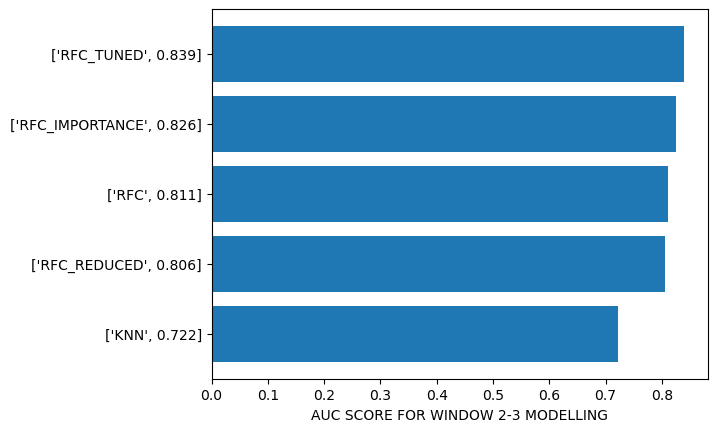

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
models = (['RFC_TUNED', round(best_gridsearch_model_auc_2, 3)],
          ['RFC_IMPORTANCE', round(estimator_auc_2_3, 3)],
          ['RFC', round(estimator_auc_2_2, 3)],
          ['RFC_REDUCED', round(estimator_auc_2_4, 3)],
          ['KNN', round(estimator_auc_2_1, 3)])
y_pos = np.arange(5)

performance = np.array([best_gridsearch_model_auc_2,
                        estimator_auc_2_3,
                        estimator_auc_2_2,
                        estimator_auc_2_4,
                        estimator_auc_2_1])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('AUC SCORE FOR WINDOW 2-3 MODELLING')

plt.show()


#### WINDOW 4-5 INTERVAL (Above 6 Hours)

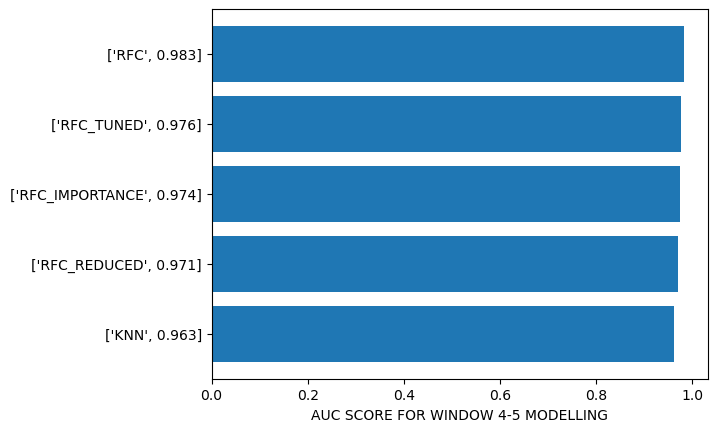

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
models = (['RFC', round(estimator_auc_3_2, 3)],
          ['RFC_TUNED', round(best_gridsearch_model_auc_3, 3)],
          ['RFC_IMPORTANCE', round(estimator_auc_3_3, 3)],
          ['RFC_REDUCED', round(estimator_auc_3_4, 3)],
          ['KNN', round(estimator_auc_3_1, 3)])
y_pos = np.arange(5)

performance = np.array([estimator_auc_3_2,
                        best_gridsearch_model_auc_3,
                        estimator_auc_3_3,
                        estimator_auc_3_4,
                        estimator_auc_3_1])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('AUC SCORE FOR WINDOW 4-5 MODELLING')

plt.show()


### COMPARISON AUC SCORE FOR ALL MODELS IN ALL DATA MODELLING


#### KNN

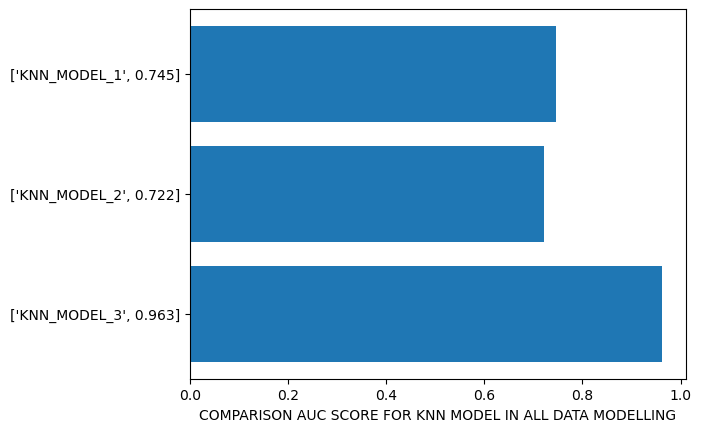

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
models = (['KNN_MODEL_1', round(estimator_auc_1_1, 3)],
          ['KNN_MODEL_2', round(estimator_auc_2_1, 3)],
          ['KNN_MODEL_3', round(estimator_auc_3_1, 3)])
y_pos = np.arange(3)

performance = np.array([estimator_auc_1_1,
                        estimator_auc_2_1,
                        estimator_auc_3_1])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('COMPARISON AUC SCORE FOR KNN MODEL IN ALL DATA MODELLING')

plt.show()


#### RFC

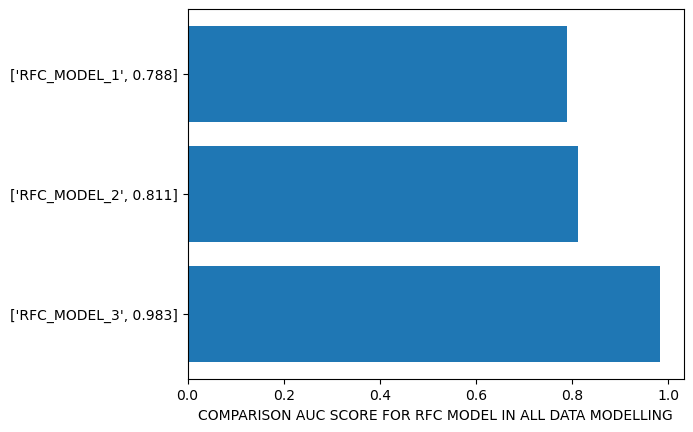

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
models = (['RFC_MODEL_1', round(estimator_auc_1_2, 3)],
          ['RFC_MODEL_2', round(estimator_auc_2_2, 3)],
          ['RFC_MODEL_3', round(estimator_auc_3_2, 3)])
y_pos = np.arange(3)

performance = np.array([estimator_auc_1_2,
                        estimator_auc_2_2,
                        estimator_auc_3_2])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('COMPARISON AUC SCORE FOR RFC MODEL IN ALL DATA MODELLING')

plt.show()


#### RFC_IMPORTANCE

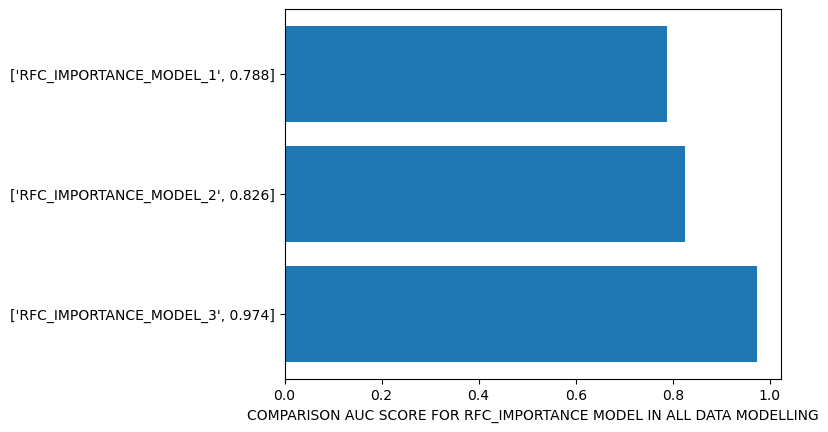

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
models = (['RFC_IMPORTANCE_MODEL_1', round(estimator_auc_1_3, 3)],
          ['RFC_IMPORTANCE_MODEL_2', round(estimator_auc_2_3, 3)],
          ['RFC_IMPORTANCE_MODEL_3', round(estimator_auc_3_3, 3)])
y_pos = np.arange(3)

performance = np.array([estimator_auc_1_3,
                        estimator_auc_2_3,
                        estimator_auc_3_3])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('COMPARISON AUC SCORE FOR RFC_IMPORTANCE MODEL IN ALL DATA MODELLING')

plt.show()


#### RFC_REDUCED

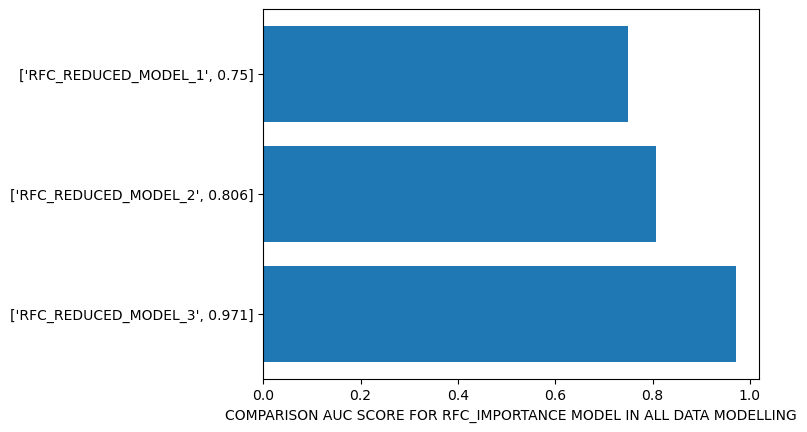

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
models = (['RFC_REDUCED_MODEL_1', round(estimator_auc_1_4, 3)],
          ['RFC_REDUCED_MODEL_2', round(estimator_auc_2_4, 3)],
          ['RFC_REDUCED_MODEL_3', round(estimator_auc_3_4, 3)])
y_pos = np.arange(3)

performance = np.array([estimator_auc_1_4,
                        estimator_auc_2_4,
                        estimator_auc_3_4])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel(
    'COMPARISON AUC SCORE FOR RFC_IMPORTANCE MODEL IN ALL DATA MODELLING')

plt.show()


#### RFC_TUNED

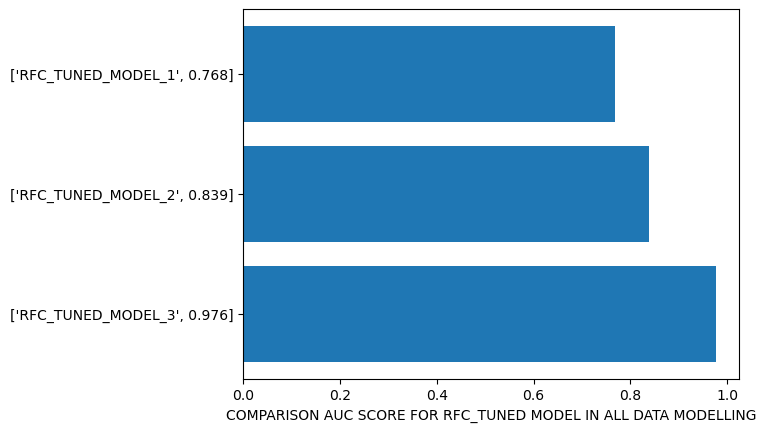

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
models = (['RFC_TUNED_MODEL_1', round(best_gridsearch_model_auc_1, 3)],
          ['RFC_TUNED_MODEL_2', round(best_gridsearch_model_auc_2, 3)],
          ['RFC_TUNED_MODEL_3', round(best_gridsearch_model_auc_3, 3)])
y_pos = np.arange(3)

performance = np.array([best_gridsearch_model_auc_1,
                        best_gridsearch_model_auc_2,
                        best_gridsearch_model_auc_3])

ax.barh(y_pos, performance, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(models)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel(
    'COMPARISON AUC SCORE FOR RFC_TUNED MODEL IN ALL DATA MODELLING')

plt.show()


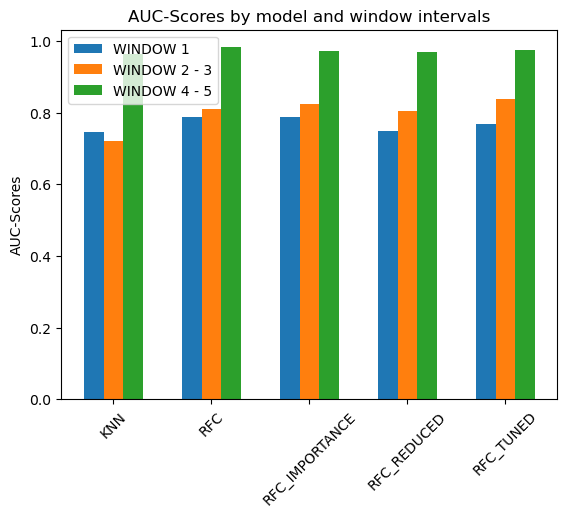

In [ ]:
labels = ['KNN', 'RFC', 'RFC_IMPORTANCE', 'RFC_REDUCED', 'RFC_TUNED']
model_1_means = [estimator_auc_1_1, estimator_auc_1_2, estimator_auc_1_3,
                 estimator_auc_1_4, best_gridsearch_model_auc_1]
model_2_means = [estimator_auc_2_1, estimator_auc_2_2, estimator_auc_2_3, 
                 estimator_auc_2_4, best_gridsearch_model_auc_2]
model_3_means = [estimator_auc_3_1, estimator_auc_3_2, estimator_auc_3_3,
                 estimator_auc_3_4, best_gridsearch_model_auc_3]

# Set position of bar on X axis
width = 0.2
r1 = np.arange(len(labels))
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]

# Make the plot
plt.bar(r1, model_1_means, width, label="WINDOW 1")
plt.bar(r2, model_2_means, width, label="WINDOW 2 - 3")
plt.bar(r3, model_3_means, width, label="WINDOW 4 - 5")

# Add some text for labels, title and custom x-axis tick labels, etc.
plt.ylabel('AUC-Scores')
plt.title('AUC-Scores by model and window intervals')
plt.xticks([r + width for r in range(len(labels))], labels=labels, rotation = 45)
 

plt.legend()
plt.show()


## F. RESOURCES

**Notebook Resources**
* Dataset: [COVID-19 - ICU Dataset](https://www.kaggle.com/Sírio-Libanes/covid19)
* [https://www.kaggle.com/andrewmvd/enriched-lightgbm-pr-86-auc-92-68](https://www.kaggle.com/andrewmvd/enriched-lightgbm-pr-86-auc-92-68)
* [https://www.kaggle.com/souhardyaganguly/covid-icu-admission-predict-xgboost-90](https://www.kaggle.com/souhardyaganguly/covid-icu-admission-predict-xgboost-90)
* [https://www.kaggle.com/felipeoliveiraml/stacking-gradient-boosting-pr-80](https://www.kaggle.com/felipeoliveiraml/stacking-gradient-boosting-pr-80)
* [https://www.kaggle.com/harriwashere/task-1-eda-3-model-ensemble](https://www.kaggle.com/harriwashere/task-1-eda-3-model-ensemble)
* [https://www.kaggle.com/felipeveiga/starter-covid-19-sirio-libanes-icu-admission](https://www.kaggle.com/felipeveiga/starter-covid-19-sirio-libanes-icu-admission)
* [https://www.kaggle.com/mpwolke/covid19-diagnosis-learning-curves](https://www.kaggle.com/mpwolke/covid19-diagnosis-learning-curves)
* [https://www.kaggle.com/epdrumond/icu-admission-data-classification-model#1.-Import-Libraries](https://www.kaggle.com/epdrumond/icu-admission-data-classification-model#1.-Import-Libraries)
* [https://www.kaggle.com/epdrumond/icu-admission-data-cleaning-and-exploration/notebook](https://www.kaggle.com/epdrumond/icu-admission-data-cleaning-and-exploration/notebook)

**Website Resources**

* ***Stackoverflow***
    * [https://stackoverflow.com/questions/55567706/plot-all-pandas-dataframe-columns-separately](https://stackoverflow.com/questions/55567706/plot-all-pandas-dataframe-columns-separately)
    * [https://stackoverflow.com/questions/50185926/valueerror-shape-of-passed-values-is-1-6-indices-imply-6-6](https://stackoverflow.com/questions/50185926/valueerror-shape-of-passed-values-is-1-6-indices-imply-6-6)
    * [https://stackoverflow.com/questions/62476253/how-to-show-seaborn-countplot-and-print-dataframe-side-by-side-in-python](https://stackoverflow.com/questions/62476253/how-to-show-seaborn-countplot-and-print-dataframe-side-by-side-in-python)
    * [https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns](https://stackoverflow.com/questions/22086116/how-do-you-filter-pandas-dataframes-by-multiple-columns)
    * [https://stackoverflow.com/questions/21720022/find-all-columns-of-dataframe-in-pandas-whose-type-is-float-or-a-particular-typ](https://stackoverflow.com/questions/21720022/find-all-columns-of-dataframe-in-pandas-whose-type-is-float-or-a-particular-typ)
    * [https://stackoverflow.com/questions/47815140/check-if-multiple-columns-exist-in-a-df](https://stackoverflow.com/questions/47815140/check-if-multiple-columns-exist-in-a-df)

* ***Pandas Seaborn Documentations***
    * [https://pandas.pydata.org/pandas-docs/stable/reference/](https://pandas.pydata.org/pandas-docs/stable/reference/)
    * [https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)
    * [https://seaborn.pydata.org/tutorial.html](https://seaborn.pydata.org/tutorial.html)
    * [https://seaborn.pydata.org/api.html](https://seaborn.pydata.org/api.html)

* ***GeeksforGeeks***
    * [https://www.geeksforgeeks.org/append-extend-python/](https://www.geeksforgeeks.org/append-extend-python/)
    * [https://www.geeksforgeeks.org/how-to-plot-multiple-data-columns-in-a-dataframe/](https://www.geeksforgeeks.org/how-to-plot-multiple-data-columns-in-a-dataframe/)
    * [https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/](https://www.geeksforgeeks.org/different-ways-to-create-pandas-dataframe/)

* ***Others***
    * [https://yigitsener.medium.com/veri-analizinde-değişkenlerin-gruba-bağlı-özelliklerini-ayrıntılı-veren-fonksiyonunun-pythonda-3e11b0fa1cc7](https://yigitsener.medium.com/veri-analizinde-değişkenlerin-gruba-bağlı-özelliklerini-ayrıntılı-veren-fonksiyonunun-pythonda-3e11b0fa1cc7)
    * [https://yigitsener.medium.com/veri-biliminde-eksik-kay%C4%B1p-verilere-yakla%C5%9F%C4%B1m-stratejileri-ve-python-pandas-uygulamas%C4%B1-501fbf643795](https://yigitsener.medium.com/veri-biliminde-eksik-kay%C4%B1p-verilere-yakla%C5%9F%C4%B1m-stratejileri-ve-python-pandas-uygulamas%C4%B1-501fbf643795)
    * [https://www.delftstack.com/howto/seaborn/size-of-seaborn-heatmap/](https://www.delftstack.com/howto/seaborn/size-of-seaborn-heatmap/)
    * [https://datacarpentry.org/sql-ecology-lesson/02-sql-aggregation/index.html](https://datacarpentry.org/sql-ecology-lesson/02-sql-aggregation/index.html)
    * [https://datatofish.com/select-rows-pandas-dataframe/](https://datatofish.com/select-rows-pandas-dataframe/)
    * [https://www.tutorialspoint.com/how-to-add-percentages-on-top-of-bars-in-seaborn-using-matplotlib](https://www.tutorialspoint.com/how-to-add-percentages-on-top-of-bars-in-seaborn-using-matplotlib)
    * [https://pbpython.com/groupby-agg.html](https://pbpython.com/groupby-agg.html)
    * [https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/](https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/)

* **Book Resouces**
    * Hands-on Machine Learning with Scikit-Learn, keras & Tensorflow
    * Introduction to Machine learning
    * Data Science from Scratch
    * Python for Data Science Handbook
    * Practical Statistics for Data Scientists
    * Python for Data Analysis
    * Fundamentals of Data Visualization
 